In [ ]:
import pandas as pd

# Lista de años disponibles
años = [2013, 2014, 2015, 2016]

# Creamos diccionarios para almacenar las listas de DataFrames por ventana
ventana1_list = []
ventana2_list = []
ventana3_list = []

# Iteramos por cada año
for year in años:
    # Generamos nombres de archivos dinámicamente
    archivo1 = f"huancayo_{year}_1ventana_CONSOLIDADO.csv"
    archivo2 = f"huancayo_{year}_2ventanas_CONSOLIDADO.csv"
    archivo3 = f"huancayo_{year}_3ventanas_CONSOLIDADO.csv"

    # Leemos los CSVs y agregamos a la lista correspondiente
    ventana1_list.append(pd.read_csv(archivo1))
    ventana2_list.append(pd.read_csv(archivo2))
    ventana3_list.append(pd.read_csv(archivo3))

# Concatenamos todos los años para cada ventana
df_ventana1 = pd.concat(ventana1_list, ignore_index=True)
df_ventana2 = pd.concat(ventana2_list, ignore_index=True)
df_ventana3 = pd.concat(ventana3_list, ignore_index=True)

# Comprobamos
print("Ventana 1:", df_ventana1.shape)
print("Ventana 2:", df_ventana2.shape)
print("Ventana 3:", df_ventana3.shape)


Ventana 1: (909, 45)
Ventana 2: (813, 55)
Ventana 3: (807, 68)


## Asegurando orden de fechas

In [ ]:
# Convertir FECHA a tipo datetime y ordenar cada ventana
for i, df in enumerate([df_ventana1, df_ventana2, df_ventana3], start=1):
    # Convertir a datetime si no lo está
    df['FECHA'] = pd.to_datetime(df['FECHA'])

    # Ordenar por fecha
    df.sort_values('FECHA', inplace=True)
    df.reset_index(drop=True, inplace=True)

    # Verificar primeros y últimos registros
    print(f"--- Ventana {i} ---")
    print(df[['FECHA']].head(5))
    print(df[['FECHA']].tail(5))


--- Ventana 1 ---
       FECHA
0 2013-04-06
1 2013-04-08
2 2013-04-09
3 2013-04-10
4 2013-04-11
         FECHA
904 2016-12-25
905 2016-12-26
906 2016-12-27
907 2016-12-28
908 2016-12-29
--- Ventana 2 ---
       FECHA
0 2013-04-06
1 2013-04-08
2 2013-04-09
3 2013-04-10
4 2013-04-11
         FECHA
808 2016-12-24
809 2016-12-26
810 2016-12-27
811 2016-12-28
812 2016-12-29
--- Ventana 3 ---
       FECHA
0 2013-04-06
1 2013-04-08
2 2013-04-09
3 2013-04-10
4 2013-04-11
         FECHA
802 2016-12-25
803 2016-12-26
804 2016-12-27
805 2016-12-28
806 2016-12-29


## Checkeando columnas

In [ ]:
for i, df in enumerate([df_ventana1, df_ventana2, df_ventana3], start=1):
    print(f"--- Ventana {i} ---")
    print(df.columns.tolist())
    print(f"Número de columnas: {len(df.columns)}\n")


--- Ventana 1 ---
['FECHA', 'Mh_PRECURSOR', 'Mv_PRECURSOR', 'Dh_TOTAL', 'F_DENSITY', 'Delta_foF2_1', 'slope_foF2_1', 'foF2_max_SW', 'foF2_min_SW', 'foF2_drop_SW', 'num_muestras_foF2', 'delta_inicio_min', 'delta_fin_min', 'extremos_validos', 'hora_inicio_real', 'hora_fin_real', 'tiempo_real_min', 'num_registros', 'Bz_mean_16_19', 'Bz_min_16_19', 'Bz_slope_16_19', 'E_mean_16_19', 'E_max_16_19', 'E_slope_16_19', 'SW_speed_mean_16_19', 'SW_speed_std_16_19', 'SW_speed_slope_16_19', 'Dst_mean_16_19', 'Dst_min_16_19', 'Pdyn_mean_16_19', 'Pdyn_max_16_19', 'BY_mean_16_19', 'Kp_last_6h_mean', 'Kp_last_6h_max', 'Kp_last_6h_sum', 'F10.7_Index', 'num_registros_16_19', 'num_registros_kp_13_18', 'TARGET', 'VECES_SUPERO_UMBRAL', 'S4_MAX', 'S4_MEAN', 'TOTAL_MEDICIONES', 'HORA_PICO', 'PRN_PICO']
Número de columnas: 45

--- Ventana 2 ---
['FECHA', 'Δh1', 'Mh1', 'Mv1', 'Delta_foF2_1', 'slope_foF2_1', 'foF2_max_SW1', 'foF2_min_SW1', 'foF2_drop_SW1', 'num_muestras_foF2_SW1', 'delta_inicio_SW1_min', 'delta_f

## Verificando Nulos

In [ ]:
for i, df in enumerate([df_ventana1, df_ventana2, df_ventana3], start=1):
    print(f"--- Ventana {i} ---")
    print(df.isna().sum()[df.isna().sum() > 0])


--- Ventana 1 ---
Series([], dtype: int64)
--- Ventana 2 ---
foF2_min_SW1     8
foF2_drop_SW1    8
dtype: int64
--- Ventana 3 ---
foF2_min_SW1     15
foF2_drop_SW1    15
foF2_min_SW2     38
foF2_drop_SW2    38
foF2_min_SW3      1
foF2_drop_SW3     1
dtype: int64


## Ubicando los NaN

In [ ]:
for i, df in enumerate([df_ventana1, df_ventana2, df_ventana3], start=1):
    print(f"--- Ventana {i} ---")
    nan_rows = df[df.isna().any(axis=1)]
    if not nan_rows.empty:
        print(nan_rows[['FECHA'] + list(nan_rows.columns[nan_rows.isna().any()])])
    else:
        print("No hay NaNs en esta ventana")


--- Ventana 1 ---
No hay NaNs en esta ventana
--- Ventana 2 ---
         FECHA  foF2_min_SW1  foF2_drop_SW1
83  2013-08-30           NaN            NaN
88  2013-09-12           NaN            NaN
327 2014-08-28           NaN            NaN
350 2014-10-07           NaN            NaN
351 2014-10-08           NaN            NaN
356 2014-11-12           NaN            NaN
361 2014-12-12           NaN            NaN
757 2016-09-06           NaN            NaN
--- Ventana 3 ---
         FECHA  foF2_min_SW1  foF2_drop_SW1  foF2_min_SW2  foF2_drop_SW2  \
24  2013-05-06        11.400          0.700           NaN            NaN   
41  2013-06-13           NaN            NaN           NaN            NaN   
42  2013-06-14         7.200          1.200           NaN            NaN   
44  2013-06-18         6.800          2.400           NaN            NaN   
46  2013-06-24           NaN            NaN           8.5           0.80   
49  2013-06-29         7.800          0.500           NaN         

## Eliminando si tiene los adyacentes en un rango de +/- 2 días

In [ ]:
import pandas as pd
import numpy as np

def filtrar_nans_con_vecinos(df, columnas_a_revisar, dias_tolerancia=2, verbose=True):
    """
    Elimina filas con NaN solo si NO tienen vecinos cercanos (dentro de dias_tolerancia)
    con valores no nulos en la misma columna.

    Args:
        df: DataFrame con columna 'FECHA'
        columnas_a_revisar: lista de columnas donde revisar NaNs (ej: ['foF2_min_SW1', 'foF2_drop_SW1'])
        dias_tolerancia: días de diferencia aceptables para considerar vecinos cercanos
        verbose: si True, imprime qué filas se eliminan

    Returns:
        DataFrame filtrado
    """
    df = df.copy()
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    df = df.sort_values('FECHA').reset_index(drop=True)

    filas_a_mantener = []
    filas_eliminadas = []

    for idx in range(len(df)):
        mantener_fila = False

        # Revisar cada columna
        for col in columnas_a_revisar:
            if pd.isna(df.loc[idx, col]):
                # Tiene NaN, verificar vecinos
                tiene_vecino_valido = False

                # Buscar hacia arriba
                for i in range(idx - 1, -1, -1):
                    dias_diff = (df.loc[idx, 'FECHA'] - df.loc[i, 'FECHA']).days
                    if dias_diff > dias_tolerancia:
                        break
                    if pd.notna(df.loc[i, col]):
                        # Encontró vecino arriba, ahora buscar abajo
                        for j in range(idx + 1, len(df)):
                            dias_diff_abajo = (df.loc[j, 'FECHA'] - df.loc[idx, 'FECHA']).days
                            if dias_diff_abajo > dias_tolerancia:
                                break
                            if pd.notna(df.loc[j, col]):
                                tiene_vecino_valido = True
                                break
                        break

                if tiene_vecino_valido:
                    mantener_fila = True
                    break
            else:
                # No tiene NaN en esta columna, mantener
                mantener_fila = True
                break

        # Si la fila tiene TODOS NaN en todas las columnas revisadas y no tiene vecinos, no mantener
        todos_nan = all(pd.isna(df.loc[idx, col]) for col in columnas_a_revisar)
        if not todos_nan or mantener_fila:
            filas_a_mantener.append(idx)
        else:
            filas_eliminadas.append({
                'indice_original': df.index[idx] if hasattr(df.index[idx], '__iter__') else idx,
                'FECHA': df.loc[idx, 'FECHA'],
                'razon': 'NaN sin vecinos cercanos'
            })

    if verbose and filas_eliminadas:
        print(f"\n🗑️  Se eliminaron {len(filas_eliminadas)} filas:")
        for fila in filas_eliminadas:
            print(f"  - Fecha: {fila['FECHA'].strftime('%Y-%m-%d')} | {fila['razon']}")

    if verbose:
        print(f"\n✅ Filas mantenidas: {len(filas_a_mantener)}/{len(df)}")

    return df.loc[filas_a_mantener].reset_index(drop=True)

In [ ]:
df_ventana2 = filtrar_nans_con_vecinos(df_ventana2, ['foF2_min_SW1', 'foF2_drop_SW1'])


🗑️  Se eliminaron 5 filas:
  - Fecha: 2013-08-30 | NaN sin vecinos cercanos
  - Fecha: 2014-10-07 | NaN sin vecinos cercanos
  - Fecha: 2014-10-08 | NaN sin vecinos cercanos
  - Fecha: 2014-11-12 | NaN sin vecinos cercanos
  - Fecha: 2014-12-12 | NaN sin vecinos cercanos

✅ Filas mantenidas: 808/813


In [ ]:
import pandas as pd
import numpy as np

def filtrar_nans_con_vecinos(df, columnas_a_revisar, dias_tolerancia=2, verbose=True):
    """
    Elimina filas con NaN solo si NO tienen vecinos cercanos (dentro de dias_tolerancia)
    con valores no nulos en la misma columna.

    LÓGICA ESTRICTA: Una fila se mantiene SOLO si TODAS las columnas con NaN
    tienen vecinos cercanos válidos (arriba Y abajo).

    Args:
        df: DataFrame con columna 'FECHA'
        columnas_a_revisar: lista de columnas donde revisar NaNs (ej: ['foF2_min_SW1', 'foF2_drop_SW1'])
        dias_tolerancia: días de diferencia aceptables para considerar vecinos cercanos
        verbose: si True, imprime qué filas se eliminan

    Returns:
        DataFrame filtrado
    """
    df = df.copy()
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    df = df.sort_values('FECHA').reset_index(drop=True)

    filas_a_mantener = []
    filas_eliminadas = []

    for idx in range(len(df)):
        mantener_fila = True
        columnas_problematicas = []

        # Revisar cada columna
        for col in columnas_a_revisar:
            if pd.isna(df.loc[idx, col]):
                # Tiene NaN, verificar si tiene vecinos válidos
                tiene_vecino_arriba = False
                tiene_vecino_abajo = False

                # Buscar hacia arriba
                for i in range(idx - 1, -1, -1):
                    dias_diff = (df.loc[idx, 'FECHA'] - df.loc[i, 'FECHA']).days
                    if dias_diff > dias_tolerancia:
                        break
                    if pd.notna(df.loc[i, col]):
                        tiene_vecino_arriba = True
                        break

                # Buscar hacia abajo
                for j in range(idx + 1, len(df)):
                    dias_diff_abajo = (df.loc[j, 'FECHA'] - df.loc[idx, 'FECHA']).days
                    if dias_diff_abajo > dias_tolerancia:
                        break
                    if pd.notna(df.loc[j, col]):
                        tiene_vecino_abajo = True
                        break

                # Si no tiene AMBOS vecinos (arriba Y abajo), marcar como problemática
                if not (tiene_vecino_arriba and tiene_vecino_abajo):
                    mantener_fila = False
                    columnas_problematicas.append(col)

        if mantener_fila:
            filas_a_mantener.append(idx)
        else:
            filas_eliminadas.append({
                'indice_original': df.index[idx] if hasattr(df.index[idx], '__iter__') else idx,
                'FECHA': df.loc[idx, 'FECHA'],
                'columnas': ', '.join(columnas_problematicas),
                'razon': 'NaN sin vecinos cercanos'
            })

    if verbose and filas_eliminadas:
        print(f"\n🗑️  Se eliminaron {len(filas_eliminadas)} filas:")
        for fila in filas_eliminadas:
            print(f"  - Fecha: {fila['FECHA'].strftime('%Y-%m-%d')} | Columnas: {fila['columnas']}")

    if verbose:
        print(f"\n✅ Filas mantenidas: {len(filas_a_mantener)}/{len(df)}")

    return df.loc[filas_a_mantener].reset_index(drop=True)


In [ ]:
df_ventana3 = filtrar_nans_con_vecinos(
    df_ventana3,
    ['foF2_min_SW1', 'foF2_drop_SW1', 'foF2_min_SW2', 'foF2_drop_SW2', 'foF2_min_SW3', 'foF2_drop_SW3']
)


🗑️  Se eliminaron 27 filas:
  - Fecha: 2013-06-13 | Columnas: foF2_min_SW2, foF2_drop_SW2
  - Fecha: 2013-06-14 | Columnas: foF2_min_SW2, foF2_drop_SW2
  - Fecha: 2013-06-18 | Columnas: foF2_min_SW2, foF2_drop_SW2
  - Fecha: 2013-06-24 | Columnas: foF2_min_SW1, foF2_drop_SW1
  - Fecha: 2013-06-29 | Columnas: foF2_min_SW2, foF2_drop_SW2
  - Fecha: 2013-07-20 | Columnas: foF2_min_SW2, foF2_drop_SW2
  - Fecha: 2013-08-26 | Columnas: foF2_min_SW2, foF2_drop_SW2
  - Fecha: 2013-08-28 | Columnas: foF2_min_SW2, foF2_drop_SW2
  - Fecha: 2013-08-29 | Columnas: foF2_min_SW2, foF2_drop_SW2
  - Fecha: 2013-10-09 | Columnas: foF2_min_SW1, foF2_drop_SW1
  - Fecha: 2014-03-10 | Columnas: foF2_min_SW2, foF2_drop_SW2
  - Fecha: 2014-08-27 | Columnas: foF2_min_SW1, foF2_drop_SW1, foF2_min_SW2, foF2_drop_SW2
  - Fecha: 2014-10-11 | Columnas: foF2_min_SW1, foF2_drop_SW1, foF2_min_SW2, foF2_drop_SW2
  - Fecha: 2014-10-17 | Columnas: foF2_min_SW1, foF2_drop_SW1
  - Fecha: 2014-11-13 | Columnas: foF2_min_SW

## Verificando Nulos con adyacencia

In [ ]:
for i, df in enumerate([df_ventana1, df_ventana2, df_ventana3], start=1):
    print(f"--- Ventana {i} ---")
    print(df.isna().sum()[df.isna().sum() > 0])

--- Ventana 1 ---
Series([], dtype: int64)
--- Ventana 2 ---
foF2_min_SW1     3
foF2_drop_SW1    3
dtype: int64
--- Ventana 3 ---
foF2_min_SW1      6
foF2_drop_SW1     6
foF2_min_SW2     15
foF2_drop_SW2    15
foF2_min_SW3      1
foF2_drop_SW3     1
dtype: int64


Se interpolara temporalmente los faltantes con un día posterior y anterior (los que no cumplen esto, seran dropeados)

In [ ]:
# DESPUÉS: Interpolar
# Ventana 2
df_ventana2['FECHA'] = pd.to_datetime(df_ventana2['FECHA'])
df_ventana2 = df_ventana2.set_index('FECHA').sort_index()
df_ventana2[['foF2_min_SW1', 'foF2_drop_SW1']] = \
    df_ventana2[['foF2_min_SW1', 'foF2_drop_SW1']].interpolate(method='time')

# Ventana 3
df_ventana3['FECHA'] = pd.to_datetime(df_ventana3['FECHA'])
df_ventana3 = df_ventana3.set_index('FECHA').sort_index()
df_ventana3[['foF2_min_SW1', 'foF2_drop_SW1', 'foF2_min_SW2', 'foF2_drop_SW2', 'foF2_min_SW3', 'foF2_drop_SW3']] = \
    df_ventana3[['foF2_min_SW1', 'foF2_drop_SW1', 'foF2_min_SW2', 'foF2_drop_SW2', 'foF2_min_SW3', 'foF2_drop_SW3']].interpolate(method='time')

## Verificando nulos

In [ ]:
for i, df in enumerate([df_ventana1, df_ventana2, df_ventana3], start=1):
    print(f"--- Ventana {i} ---")
    print(df.isna().sum()[df.isna().sum() > 0])

--- Ventana 1 ---
Series([], dtype: int64)
--- Ventana 2 ---
Series([], dtype: int64)
--- Ventana 3 ---
Series([], dtype: int64)


# Comenzando con 1 ventana temporal

In [ ]:
print(df_ventana1.columns.tolist())

['FECHA', 'Mh_PRECURSOR', 'Mv_PRECURSOR', 'Dh_TOTAL', 'F_DENSITY', 'Delta_foF2_1', 'slope_foF2_1', 'foF2_max_SW', 'foF2_min_SW', 'foF2_drop_SW', 'num_muestras_foF2', 'delta_inicio_min', 'delta_fin_min', 'extremos_validos', 'hora_inicio_real', 'hora_fin_real', 'tiempo_real_min', 'num_registros', 'Bz_mean_16_19', 'Bz_min_16_19', 'Bz_slope_16_19', 'E_mean_16_19', 'E_max_16_19', 'E_slope_16_19', 'SW_speed_mean_16_19', 'SW_speed_std_16_19', 'SW_speed_slope_16_19', 'Dst_mean_16_19', 'Dst_min_16_19', 'Pdyn_mean_16_19', 'Pdyn_max_16_19', 'BY_mean_16_19', 'Kp_last_6h_mean', 'Kp_last_6h_max', 'Kp_last_6h_sum', 'F10.7_Index', 'num_registros_16_19', 'num_registros_kp_13_18', 'TARGET', 'VECES_SUPERO_UMBRAL', 'S4_MAX', 'S4_MEAN', 'TOTAL_MEDICIONES', 'HORA_PICO', 'PRN_PICO']


In [ ]:
print(df_ventana1.head(5))

       FECHA  Mh_PRECURSOR  Mv_PRECURSOR  Dh_TOTAL  F_DENSITY  Delta_foF2_1  \
0 2013-04-06         478.4      0.804167      96.5  10.366667          -3.4   
1 2013-04-08         517.5      1.106667     132.8  11.444444          -3.6   
2 2013-04-09         495.2      1.069167     128.3  10.811111          -2.1   
3 2013-04-10         441.9      0.618333      74.2  10.811111          -2.0   
4 2013-04-11         493.0      1.046667     125.6  11.044444          -2.2   

   slope_foF2_1  foF2_max_SW  foF2_min_SW  foF2_drop_SW  ...  F10.7_Index  \
0     -0.028333         11.6          8.2           3.4  ...        137.3   
1     -0.030000         13.1          9.3           3.8  ...        139.6   
2     -0.017500         11.6          9.4           2.2  ...        147.0   
3     -0.016667         11.6          9.4           2.2  ...        148.6   
4     -0.018333         11.7          9.4           2.3  ...        137.8   

   num_registros_16_19  num_registros_kp_13_18  TARGET VECES_S

In [ ]:
df_ventana1.shape

(909, 45)

Informativo (puse S4>0.4):C lo puedo corregir jeje




In [ ]:
# Actualizar TARGET según S4_MAX > 0.5
df_ventana1['TARGET'] = (df_ventana1['S4_MAX'] > 0.5).astype(int)

# Ver cuántos casos hay de cada clase
print("Distribución de TARGET actualizado:")
print(df_ventana1['TARGET'].value_counts())
print(f"\nPorcentaje de TARGET=1: {(df_ventana1['TARGET'].sum() / len(df_ventana1) * 100):.2f}%")

Distribución de TARGET actualizado:
TARGET
0    562
1    347
Name: count, dtype: int64

Porcentaje de TARGET=1: 38.17%


TARGET                    1.000000
S4_MAX                    0.818205
S4_MEAN                   0.692956
VECES_SUPERO_UMBRAL       0.565817
Mh_PRECURSOR              0.477435
foF2_max_SW               0.389147
F_DENSITY                 0.338000
foF2_drop_SW              0.251473
Dh_TOTAL                  0.237922
Mv_PRECURSOR              0.237574
foF2_min_SW               0.194880
F10.7_Index               0.158720
num_registros             0.134833
num_muestras_foF2         0.134833
TOTAL_MEDICIONES          0.129987
E_slope_16_19             0.093661
Pdyn_mean_16_19           0.079221
Pdyn_max_16_19            0.075848
delta_fin_min             0.063799
SW_speed_slope_16_19      0.028655
tiempo_real_min           0.024874
Bz_mean_16_19             0.017679
delta_inicio_min          0.014709
Bz_min_16_19              0.003405
Dst_min_16_19             0.000655
Dst_mean_16_19           -0.004120
E_max_16_19              -0.012351
E_mean_16_19             -0.014329
BY_mean_16_19       

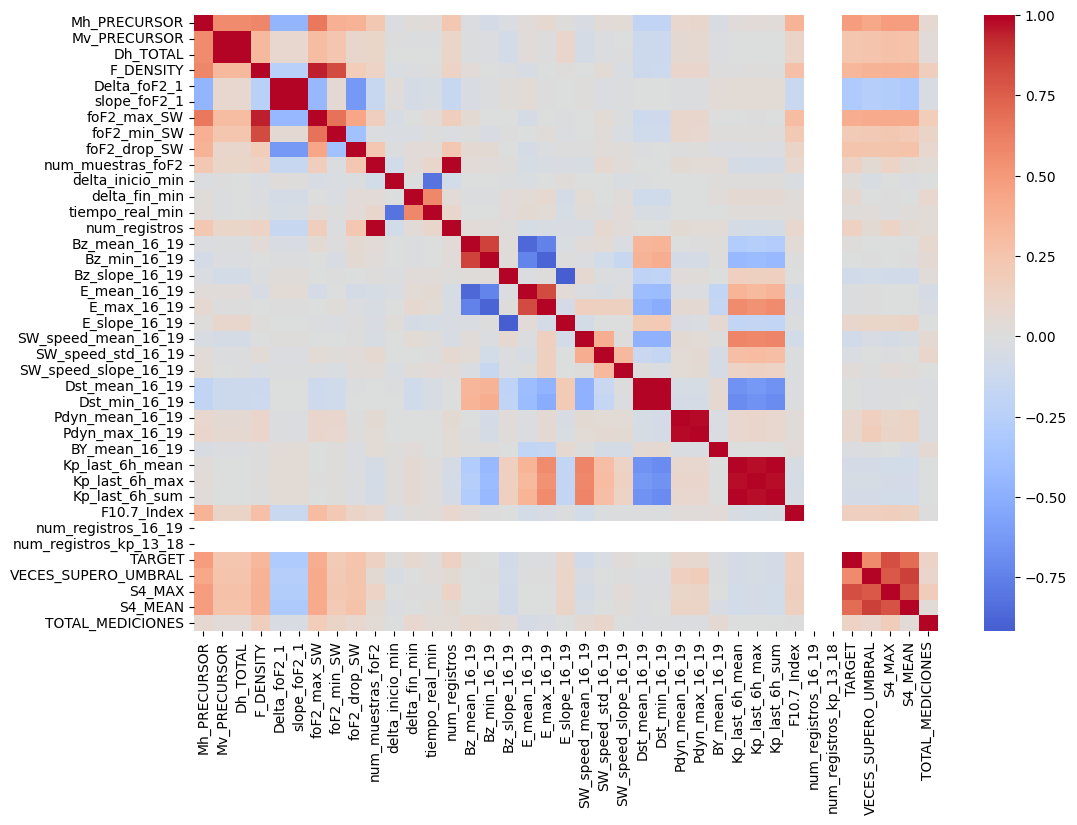

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df_ventana1.select_dtypes(include='number')

# Matriz de correlación
corr = numeric_cols.corr()

# Filtrar solo correlaciones con el target
target_corr = corr['TARGET'].sort_values(ascending=False)
print(target_corr)

# Visualización rápida con heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.show()


In [ ]:
print(df_ventana1.nunique())  # Si solo hay 1 valor, no aporta

FECHA                     909
Mh_PRECURSOR              721
Mv_PRECURSOR              747
Dh_TOTAL                  745
F_DENSITY                 780
Delta_foF2_1              261
slope_foF2_1              179
foF2_max_SW               157
foF2_min_SW               111
foF2_drop_SW              233
num_muestras_foF2          17
delta_inicio_min            3
delta_fin_min               3
extremos_validos            1
hora_inicio_real          909
hora_fin_real             909
tiempo_real_min             3
num_registros              17
Bz_mean_16_19             428
Bz_min_16_19              138
Bz_slope_16_19            481
E_mean_16_19              716
E_max_16_19               371
E_slope_16_19             738
SW_speed_mean_16_19       638
SW_speed_std_16_19        459
SW_speed_slope_16_19      261
Dst_mean_16_19            262
Dst_min_16_19              93
Pdyn_mean_16_19           693
Pdyn_max_16_19            392
BY_mean_16_19             535
Kp_last_6h_mean            57
Kp_last_6h

## Se eliminaran variables de control o de seguimiento

In [ ]:
# Columnas a eliminar
cols_eliminar = [
    'FECHA', 'hora_inicio_real', 'hora_fin_real', 'HORA_PICO', 'PRN_PICO',
    'delta_fin_min', 'tiempo_real_min', 'num_muestras_foF2', 'num_registros',
    'delta_inicio_min', 'extremos_validos', 'num_registros_16_19', 'num_registros_kp_13_18'
]

# Eliminación
df_ventana1 = df_ventana1.drop(columns=cols_eliminar)
# df_ventana2 = df_ventana2.drop(columns=[c for c in cols_eliminar if c in df_ventana2.columns])
# df_ventana3 = df_ventana3.drop(columns=[c for c in cols_eliminar if c in df_ventana3.columns])

# Revisar columnas restantes
print(df_ventana1.columns)


Index(['Mh_PRECURSOR', 'Mv_PRECURSOR', 'Dh_TOTAL', 'F_DENSITY', 'Delta_foF2_1',
       'slope_foF2_1', 'foF2_max_SW', 'foF2_min_SW', 'foF2_drop_SW',
       'Bz_mean_16_19', 'Bz_min_16_19', 'Bz_slope_16_19', 'E_mean_16_19',
       'E_max_16_19', 'E_slope_16_19', 'SW_speed_mean_16_19',
       'SW_speed_std_16_19', 'SW_speed_slope_16_19', 'Dst_mean_16_19',
       'Dst_min_16_19', 'Pdyn_mean_16_19', 'Pdyn_max_16_19', 'BY_mean_16_19',
       'Kp_last_6h_mean', 'Kp_last_6h_max', 'Kp_last_6h_sum', 'F10.7_Index',
       'TARGET', 'VECES_SUPERO_UMBRAL', 'S4_MAX', 'S4_MEAN',
       'TOTAL_MEDICIONES'],
      dtype='object')


In [ ]:
# Columnas a eliminar
cols_eliminar = [
    'S4_MAX', 'S4_MEAN', 'VECES_SUPERO_UMBRAL', 'TOTAL_MEDICIONES'
]

# Eliminación
df_ventana1 = df_ventana1.drop(columns=cols_eliminar)
# df_ventana2 = df_ventana2.drop(columns=[c for c in cols_eliminar if c in df_ventana2.columns])
# df_ventana3 = df_ventana3.drop(columns=[c for c in cols_eliminar if c in df_ventana3.columns])

# Revisar columnas restantes
print(df_ventana1.columns)


Index(['Mh_PRECURSOR', 'Mv_PRECURSOR', 'Dh_TOTAL', 'F_DENSITY', 'Delta_foF2_1',
       'slope_foF2_1', 'foF2_max_SW', 'foF2_min_SW', 'foF2_drop_SW',
       'Bz_mean_16_19', 'Bz_min_16_19', 'Bz_slope_16_19', 'E_mean_16_19',
       'E_max_16_19', 'E_slope_16_19', 'SW_speed_mean_16_19',
       'SW_speed_std_16_19', 'SW_speed_slope_16_19', 'Dst_mean_16_19',
       'Dst_min_16_19', 'Pdyn_mean_16_19', 'Pdyn_max_16_19', 'BY_mean_16_19',
       'Kp_last_6h_mean', 'Kp_last_6h_max', 'Kp_last_6h_sum', 'F10.7_Index',
       'TARGET'],
      dtype='object')


## Correlación

TARGET                  1.000000
Mh_PRECURSOR            0.477435
foF2_max_SW             0.389147
F_DENSITY               0.338000
foF2_drop_SW            0.251473
Dh_TOTAL                0.237922
Mv_PRECURSOR            0.237574
foF2_min_SW             0.194880
F10.7_Index             0.158720
E_slope_16_19           0.093661
Pdyn_mean_16_19         0.079221
Pdyn_max_16_19          0.075848
SW_speed_slope_16_19    0.028655
Bz_mean_16_19           0.017679
Bz_min_16_19            0.003405
Dst_min_16_19           0.000655
Dst_mean_16_19         -0.004120
E_max_16_19            -0.012351
E_mean_16_19           -0.014329
BY_mean_16_19          -0.019968
SW_speed_std_16_19     -0.026327
Kp_last_6h_max         -0.051892
Kp_last_6h_mean        -0.067635
Kp_last_6h_sum         -0.067635
SW_speed_mean_16_19    -0.088843
Bz_slope_16_19         -0.089449
slope_foF2_1           -0.297011
Delta_foF2_1           -0.297130
Name: TARGET, dtype: float64


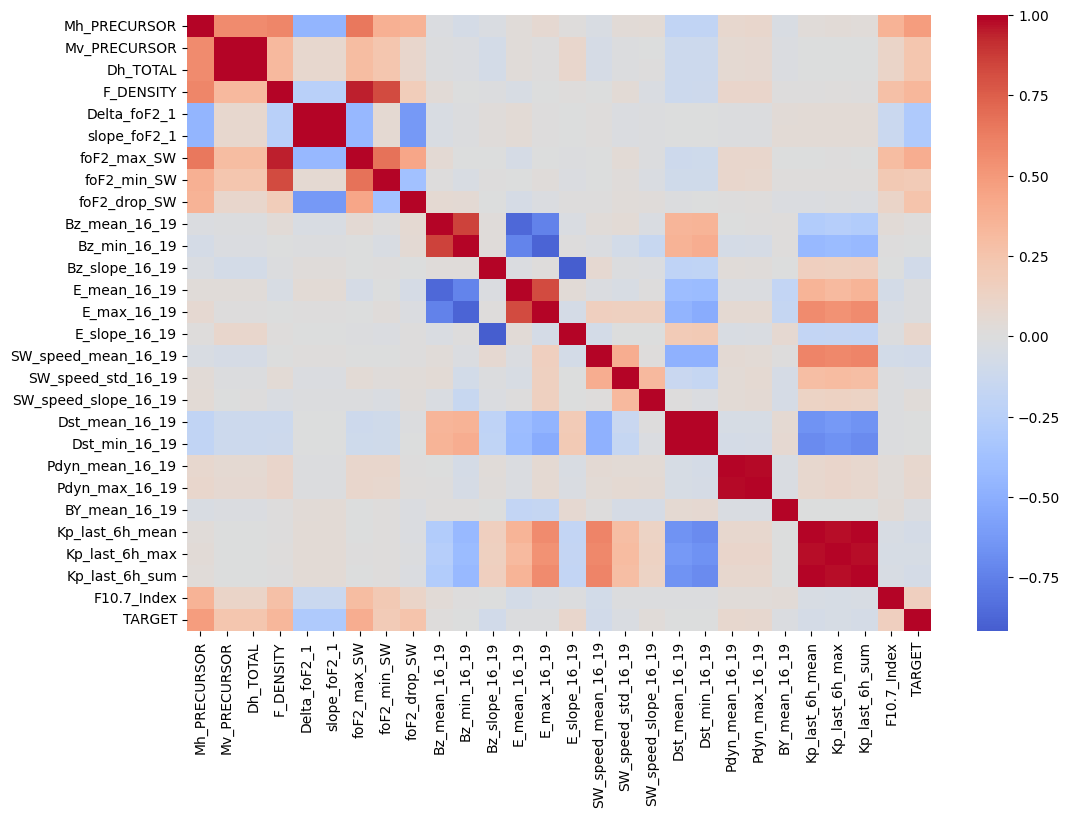

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df_ventana1.select_dtypes(include='number')

# Matriz de correlación
corr = numeric_cols.corr()

# Filtrar solo correlaciones con el target
target_corr = corr['TARGET'].sort_values(ascending=False)
print(target_corr)

# Visualización rápida con heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.show()

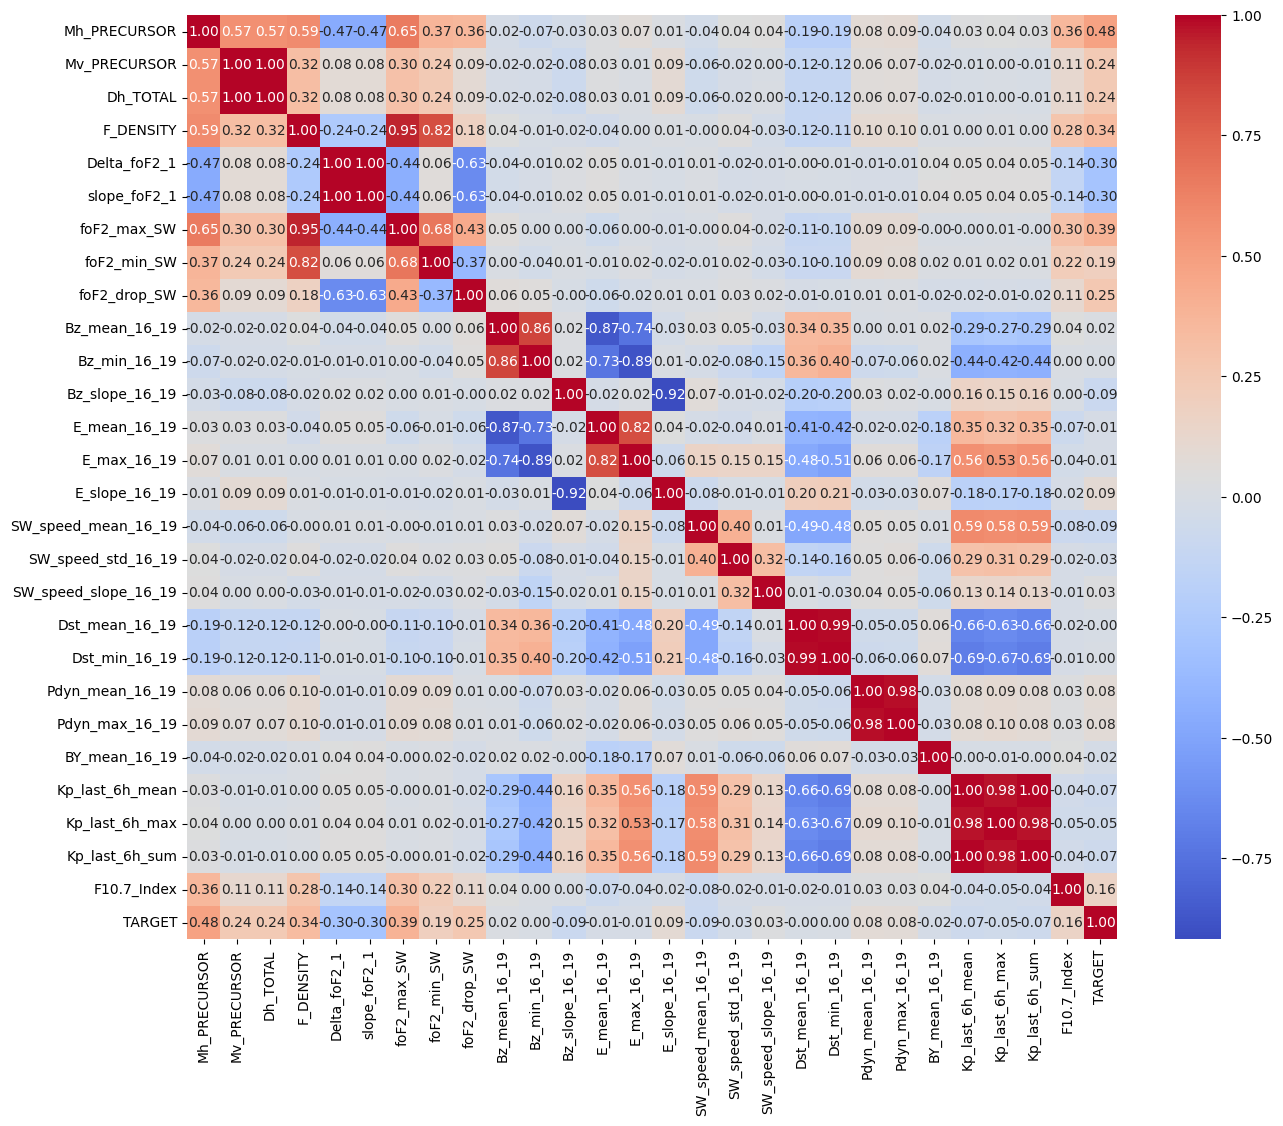

In [ ]:
# Matriz de correlación completa
corr_matrix = df_ventana1.corr()

# Mostrar la matriz completa
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [ ]:
# Matriz de correlación completa
corr_matrix = df_ventana1.corr()

# Imprimir toda la matriz en texto
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', '{:.3f}'.format):
    print(corr_matrix)


                      Mh_PRECURSOR  Mv_PRECURSOR  Dh_TOTAL  F_DENSITY  \
Mh_PRECURSOR                 1.000         0.565     0.565      0.586   
Mv_PRECURSOR                 0.565         1.000     1.000      0.321   
Dh_TOTAL                     0.565         1.000     1.000      0.321   
F_DENSITY                    0.586         0.321     0.321      1.000   
Delta_foF2_1                -0.466         0.081     0.081     -0.244   
slope_foF2_1                -0.466         0.081     0.081     -0.244   
foF2_max_SW                  0.649         0.303     0.303      0.945   
foF2_min_SW                  0.375         0.236     0.236      0.825   
foF2_drop_SW                 0.358         0.092     0.092      0.180   
Bz_mean_16_19               -0.024        -0.017    -0.017      0.039   
Bz_min_16_19                -0.066        -0.019    -0.019     -0.007   
Bz_slope_16_19              -0.031        -0.076    -0.076     -0.018   
E_mean_16_19                 0.027         0.032   

1. ΔfoF2_1 vs slope_foF2_1

Definición:

* ΔfoF2_1 = foF2_fin - foF2_inicio → cambio absoluto en el periodo.

* slope_foF2_1 = ΔfoF2_1 / Δt → velocidad de cambio por minuto.

Información que aportan:

* Si todas las ventanas tienen la misma duración (Δt constante), entonces slope_foF2_1 es solo ΔfoF2_1 escalada.

* Eso explica la correlación perfecta de 1.0 en tu matriz.

* Por lo tanto, ninguna aporta información adicional sobre la variación relativa, solo cambia la escala.

Recomendación:

* Mantener solo ΔfoF2_1. Es más intuitivo y fácil de interpretar.

In [ ]:
# Eliminación
df_ventana1 = df_ventana1.drop(columns='slope_foF2_1')
# df_ventana2 = df_ventana2.drop(columns=[c for c in cols_eliminar if c in df_ventana2.columns])
# df_ventana3 = df_ventana3.drop(columns=[c for c in cols_eliminar if c in df_ventana3.columns])

# Revisar columnas restantes
print(df_ventana1.columns)

Index(['Mh_PRECURSOR', 'Mv_PRECURSOR', 'Dh_TOTAL', 'F_DENSITY', 'Delta_foF2_1',
       'foF2_max_SW', 'foF2_min_SW', 'foF2_drop_SW', 'Bz_mean_16_19',
       'Bz_min_16_19', 'Bz_slope_16_19', 'E_mean_16_19', 'E_max_16_19',
       'E_slope_16_19', 'SW_speed_mean_16_19', 'SW_speed_std_16_19',
       'SW_speed_slope_16_19', 'Dst_mean_16_19', 'Dst_min_16_19',
       'Pdyn_mean_16_19', 'Pdyn_max_16_19', 'BY_mean_16_19', 'Kp_last_6h_mean',
       'Kp_last_6h_max', 'Kp_last_6h_sum', 'F10.7_Index', 'TARGET'],
      dtype='object')


2. Variables tipo mean, min, max

Ejemplos: E_mean_16_19, E_max_16_19, Bz_mean_16_19, Bz_min_16_19

* Qué aporta cada una:

  * Media (mean) → indica el nivel general durante la ventana. Es un buen predictor si la variable tiene influencia acumulativa sobre la cintilación.

  * Mínimo (min) → indica valores extremos bajos. Puede ser útil si la cintilación depende de caídas críticas en la variable (por ejemplo, Dst negativo extremo).

  * Máximo (max) → indica valores extremos altos. Útil si picos altos desencadenan el fenómeno.

* Correlación con tu matriz:

* Para tu caso, la media suele ser más informativa que min o max, porque:

  * Muchas variables tienen un efecto acumulativo o promedio sobre la ionósfera (p.ej., E, Bz).

  * Los extremos (min, max) pueden ser ruidosos o aislados.

* Solo retén min o max si hay una justificación física de que un pico crítico desencadena la cintilación.

Tu caso específico:

* E_mean_16_19 correlación con TARGET = -0.01

* E_max_16_19 = -0.01

* Bz_mean_16_19 = 0.02

* Bz_min_16_19 = 0.000

→ La diferencia es pequeña, pero la media es más estable y menos redundante con otras variables (y evita ruidos de picos aislados).

** VERIFICAR: Mayor sea el B, mas chiquito el E desencadenan crecimiento de inestabilidad de rayleigh.**

In [ ]:
# Columnas a eliminar
cols_eliminar = [
    'Kp_last_6h_sum', 'Kp_last_6h_max', 'Bz_min_16_19', 'E_max_16_19'
]

# Eliminación
df_ventana1 = df_ventana1.drop(columns=cols_eliminar)
# df_ventana2 = df_ventana2.drop(columns=[c for c in cols_eliminar if c in df_ventana2.columns])
# df_ventana3 = df_ventana3.drop(columns=[c for c in cols_eliminar if c in df_ventana3.columns])

# Revisar columnas restantes
print(df_ventana1.columns)

Index(['Mh_PRECURSOR', 'Mv_PRECURSOR', 'Dh_TOTAL', 'F_DENSITY', 'Delta_foF2_1',
       'foF2_max_SW', 'foF2_min_SW', 'foF2_drop_SW', 'Bz_mean_16_19',
       'Bz_slope_16_19', 'E_mean_16_19', 'E_slope_16_19',
       'SW_speed_mean_16_19', 'SW_speed_std_16_19', 'SW_speed_slope_16_19',
       'Dst_mean_16_19', 'Dst_min_16_19', 'Pdyn_mean_16_19', 'Pdyn_max_16_19',
       'BY_mean_16_19', 'Kp_last_6h_mean', 'F10.7_Index', 'TARGET'],
      dtype='object')


In [ ]:
# Eliminación, tiene sentido Dh cuanto sube y Mv te dice la velocidad con q lo hace
df_ventana1 = df_ventana1.drop(columns='Dh_TOTAL')
# df_ventana2 = df_ventana2.drop(columns=[c for c in cols_eliminar if c in df_ventana2.columns])
# df_ventana3 = df_ventana3.drop(columns=[c for c in cols_eliminar if c in df_ventana3.columns])

# Revisar columnas restantes
print(df_ventana1.columns)

Index(['Mh_PRECURSOR', 'Mv_PRECURSOR', 'F_DENSITY', 'Delta_foF2_1',
       'foF2_max_SW', 'foF2_min_SW', 'foF2_drop_SW', 'Bz_mean_16_19',
       'Bz_slope_16_19', 'E_mean_16_19', 'E_slope_16_19',
       'SW_speed_mean_16_19', 'SW_speed_std_16_19', 'SW_speed_slope_16_19',
       'Dst_mean_16_19', 'Dst_min_16_19', 'Pdyn_mean_16_19', 'Pdyn_max_16_19',
       'BY_mean_16_19', 'Kp_last_6h_mean', 'F10.7_Index', 'TARGET'],
      dtype='object')


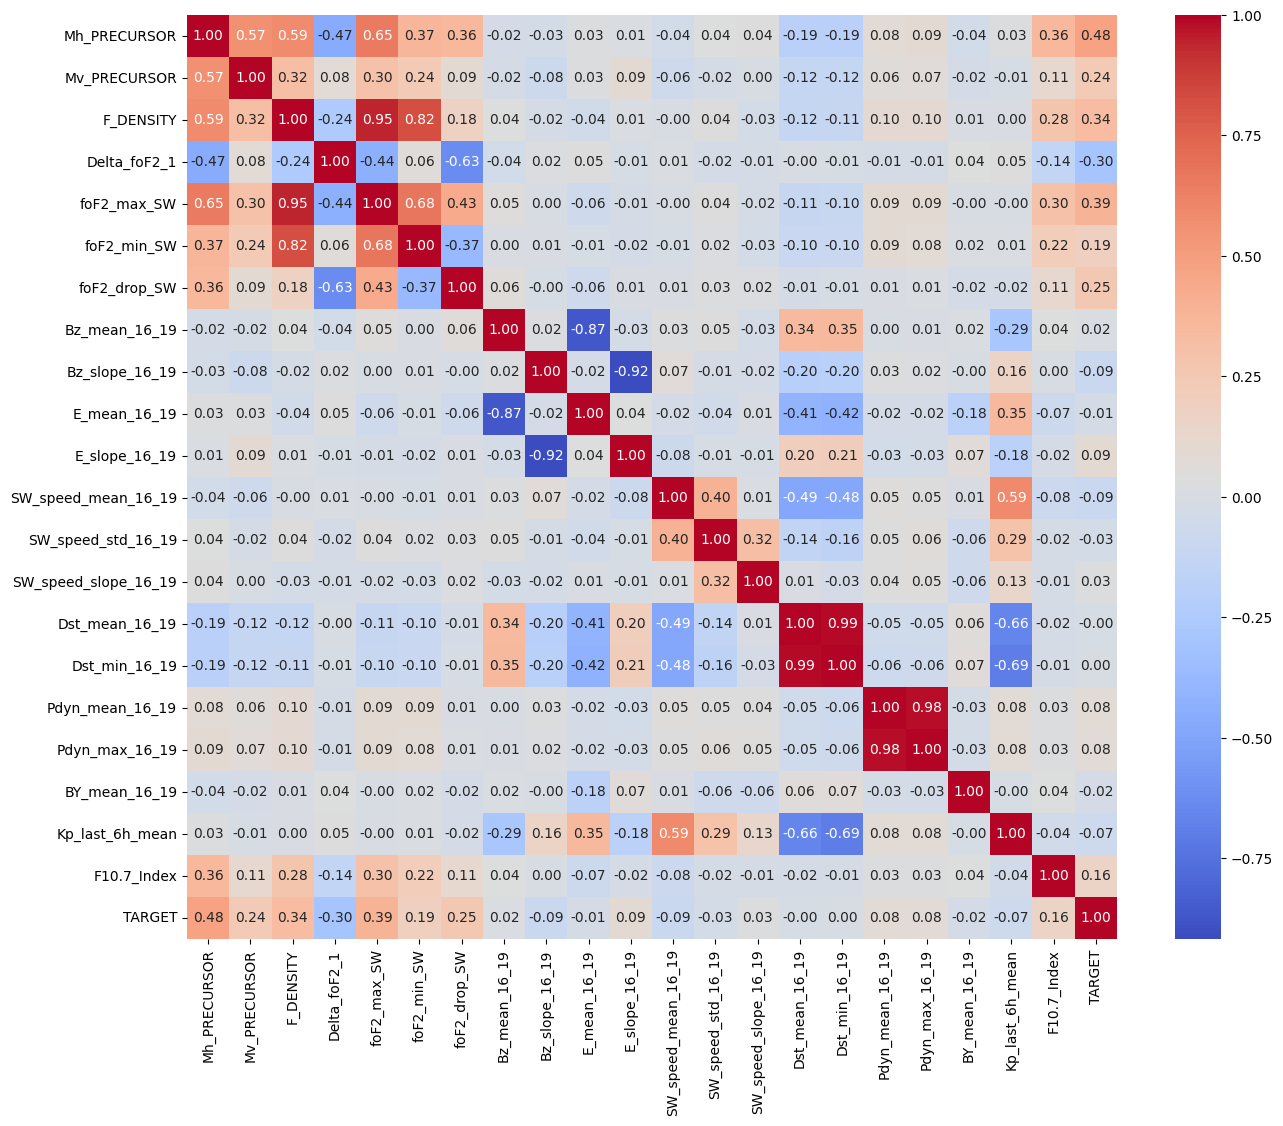

In [ ]:
# Matriz de correlación completa
corr_matrix = df_ventana1.corr()

# Mostrar la matriz completa
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Pdyn: Presión Dinámica
* Correlación con el target: la media tiene un poco más de correlación que el máximo.

* Redundancia: la diferencia entre media y máximo es pequeña, y la media suele ser más estable frente a picos aislados o ruidos.

Miremos la correlación con el target:

* Dst_mean_16_19 vs TARGET = 0.230

* Dst_min_16_19 vs TARGET = 0.247

Correlación con el target: Dst_min_16_19 tiene ligeramente mayor correlación.

Redundancia: la media y el mínimo están altamente correlacionados entre sí (≈0.985 según tu matriz), por lo que mantener ambas aporta poca información extra.

Definición de Dst: Dst es el Disturbance Storm Time index, un índice geomagnético que mide la intensidad de la perturbación del campo magnético terrestre en el plano ecuatorial.
* Qué mide: cambios en la corriente anular (ring current) alrededor de la Tierra, que se intensifica durante tormentas geomagnéticas.
* Interpretación:
  * Valores cercanos a 0 → campo magnético normal, sin tormenta.
  * Valores negativos grandes (ej. -100 nT o menos) → tormenta geomagnética intensa.
  * Valores positivos → suelen asociarse a condiciones quietas o reforzamiento temporal del campo.

Dst Min mejor porque el valor mínimo refleja las caídas más pronunciadas del índice Dst durante la ventana, que suelen estar asociadas a tormentas geomagnéticas intensas y, por ende, a mayor impacto en la ionosfera y en la generación de cintilación.

E_mean_16_19 vs Bz_mean_16_19:

* Correlación ≈ -0.856 → muy alta (negativa).

* Esto significa que contienen información muy similar: si conoces una, ya casi sabes la otra.

* Recomendación: mantén solo una. Dado que tu target tiene correlación ligeramente mejor con E_mean_16_19 (-0.142) que con Bz_mean_16_19 (0.108), conserva E_mean_16_19 y elimina Bz_mean_16_19.

E_slope_16_19 vs Bz_slope_16_19

* Correlación ≈ -0.95 → extremadamente alta (negativa).
* Recomendación similar: mantén solo una. El target tiene correlación -0.215 con Bz_slope_16_19 y 0.262 con E_slope_16_19.
* Conserva E_slope_16_19 y elimina Bz_slope_16_19.

Dsp de tener mas data ha cambiado las cosas D:

¿Por qué dudar con foF2_max_SW y foF2_min_SW?

* foF2_max_SW tiene la 2da correlación más alta con TARGET (0.389) después de Mh_PRECURSOR (0.477)
* Aunque foF2_max_SW tiene 0.945 con F_DENSITY, podría aportar info predictiva

In [ ]:
# Columnas a eliminar
cols_eliminar = [
    'Pdyn_max_16_19', 'foF2_min_SW', 'Dst_mean_16_19', 'E_mean_16_19', 'E_slope_16_19'
]

# Eliminación
df_ventana1 = df_ventana1.drop(columns=cols_eliminar)
# df_ventana2 = df_ventana2.drop(columns=[c for c in cols_eliminar if c in df_ventana2.columns])
# df_ventana3 = df_ventana3.drop(columns=[c for c in cols_eliminar if c in df_ventana3.columns])

# Revisar columnas restantes
print(df_ventana1.columns)

Index(['Mh_PRECURSOR', 'Mv_PRECURSOR', 'F_DENSITY', 'Delta_foF2_1',
       'foF2_max_SW', 'foF2_drop_SW', 'Bz_mean_16_19', 'Bz_slope_16_19',
       'SW_speed_mean_16_19', 'SW_speed_std_16_19', 'SW_speed_slope_16_19',
       'Dst_min_16_19', 'Pdyn_mean_16_19', 'BY_mean_16_19', 'Kp_last_6h_mean',
       'F10.7_Index', 'TARGET'],
      dtype='object')


## Correlación Final

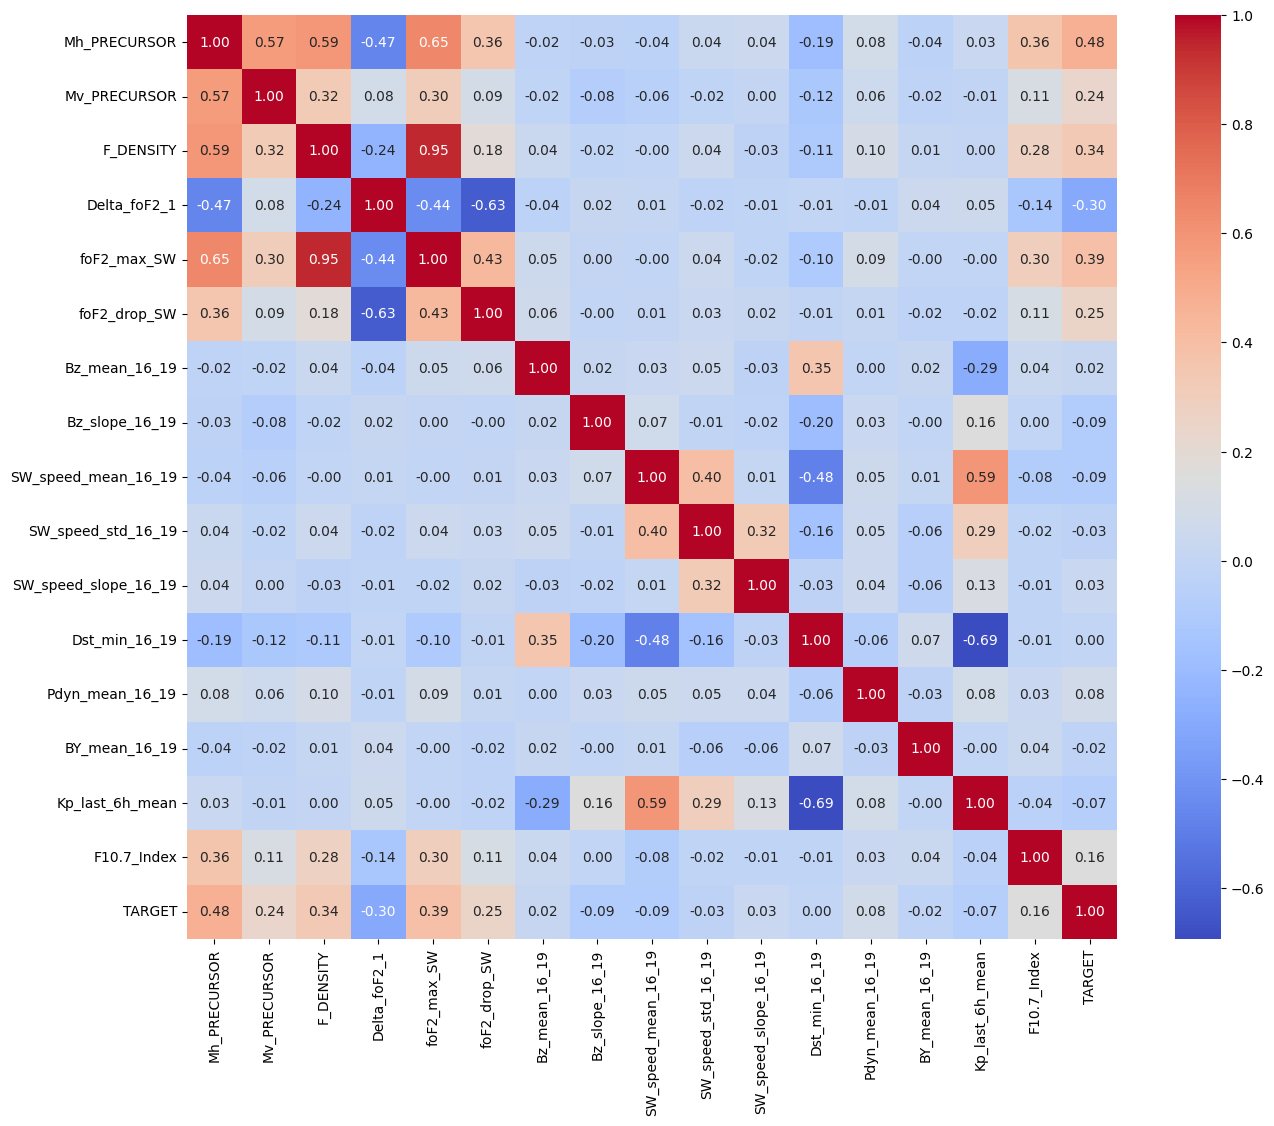

In [ ]:
# Matriz de correlación completa
corr_matrix = df_ventana1.corr()

# Mostrar la matriz completa
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [ ]:
# Columnas a eliminar
cols_eliminar = ['foF2_max_SW'] # mejor me quedo con F_Density xd

# Eliminación
df_ventana1 = df_ventana1.drop(columns=cols_eliminar)
# df_ventana2 = df_ventana2.drop(columns=[c for c in cols_eliminar if c in df_ventana2.columns])
# df_ventana3 = df_ventana3.drop(columns=[c for c in cols_eliminar if c in df_ventana3.columns])

# Revisar columnas restantes
print(df_ventana1.columns)

Index(['Mh_PRECURSOR', 'Mv_PRECURSOR', 'F_DENSITY', 'Delta_foF2_1',
       'foF2_drop_SW', 'Bz_mean_16_19', 'Bz_slope_16_19',
       'SW_speed_mean_16_19', 'SW_speed_std_16_19', 'SW_speed_slope_16_19',
       'Dst_min_16_19', 'Pdyn_mean_16_19', 'BY_mean_16_19', 'Kp_last_6h_mean',
       'F10.7_Index', 'TARGET'],
      dtype='object')


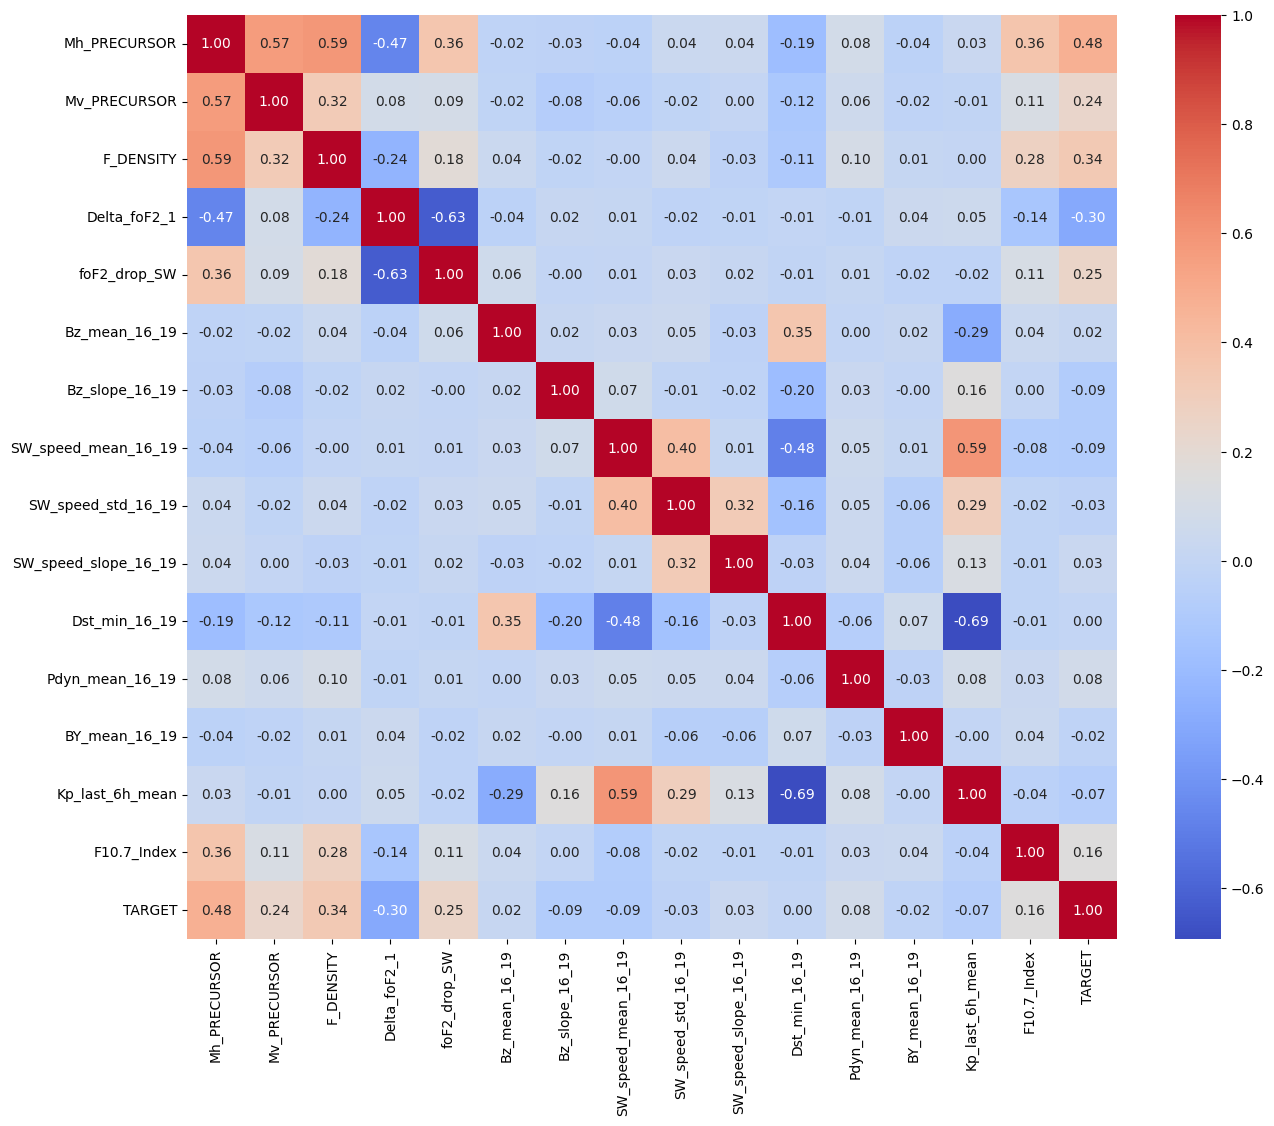

In [ ]:
# Matriz de correlación completa
corr_matrix = df_ventana1.corr()

# Mostrar la matriz completa
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [ ]:
cols_eliminar = ['SW_speed_mean_16_19', 'Bz_slope_16_19', 'BY_mean_16_19','SW_speed_std_16_19',
	'SW_speed_slope_16_19', 'Dst_min_16_19', 'Pdyn_mean_16_19','Kp_last_6h_mean']

# Eliminación
df_ventana1 = df_ventana1.drop(columns=cols_eliminar)
# df_ventana2 = df_ventana2.drop(columns=[c for c in cols_eliminar if c in df_ventana2.columns])
# df_ventana3 = df_ventana3.drop(columns=[c for c in cols_eliminar if c in df_ventana3.columns])

# Revisar columnas restantes
print(df_ventana1.columns)

Index(['Mh_PRECURSOR', 'Mv_PRECURSOR', 'F_DENSITY', 'Delta_foF2_1',
       'foF2_drop_SW', 'Bz_mean_16_19', 'F10.7_Index', 'TARGET'],
      dtype='object')


## Detalle Extra

1. SW_speed_slope_16_19

* Representa la pendiente de la velocidad del viento solar durante la ventana.

* Es una medida de cómo cambia la velocidad a lo largo del tiempo: si hay aumentos o caídas rápidas.

* Información útil: puede capturar transiciones rápidas en el viento solar, que suelen asociarse con fenómenos que afectan la ionosfera y pueden inducir cintilación.

2. SW_speed_mean_16_19

* Es la velocidad promedio del viento solar en la ventana.
* Mide el nivel general de viento solar, proporcionando una referencia estable sobre las condiciones predominantes.
* Información útil: permite distinguir ventanas con viento solar alto de las de viento bajo, factor clave para la formación de cintilaciones.

3. SW_std_slope_16_19

* Pendiente de la desviación estándar del viento solar.

* Captura cómo varía la volatilidad de la velocidad, no la velocidad en sí.

* Información: alto valor → variabilidad creciente durante la ventana → posible indicador de inestabilidad solar, que también puede influir en la ionosfera y en la generación de cintilaciones.

Resumen de valor informativo:

SW_speed_slope_16_19 → cambios rápidos, directa relación con eventos abruptos.

SW_mean_slope_16_19 → tendencia general de la velocidad, más estable.

SW_std_slope_16_19 → volatilidad, complementaria a las otras dos, puede capturar condiciones “inestables” que no se reflejan en la media ni en la pendiente directa.

**Conclusión**: Aunque no estén correlacionadas, cada una aporta un tipo distinto de información sobre el viento solar. No hay redundancia, y mantener las tres puede enriquecer tu modelo.

In [ ]:
df_ventana1.head(5)

Mh_PRECURSOR  Mv_PRECURSOR  F_DENSITY  Delta_foF2_1  foF2_drop_SW  \
0         478.4      0.804167  10.366667          -3.4           3.4   
1         517.5      1.106667  11.444444          -3.6           3.8   
2         495.2      1.069167  10.811111          -2.1           2.2   
3         441.9      0.618333  10.811111          -2.0           2.2   
4         493.0      1.046667  11.044444          -2.2           2.3   

   Bz_mean_16_19  F10.7_Index  TARGET  
0         -1.200        137.3       1  
1         -0.925        139.6       1  
2          0.725        147.0       0  
3          1.750        148.6       1  
4          0.150        137.8       0

Features Finales:

* Mh_PRECURSOR, Mv_PRECURSOR → buenos predictores de cintilación, no muy correlacionados entre sí, aportan información del campo magnético previo.

* F_DENSITY → densidad de plasma solar, aporta información adicional aunque poco correlacionada con el target.

* Delta_foF2_1 → cambio de foF2, importante para capturar variaciones en la ionosfera.

* foF2_drop_SW → caída rápida del foF2, también relacionada con perturbaciones ionosféricas.

* E_mean_16_19, E_slope_16_19 → campo eléctrico, media y pendiente, capturan el comportamiento general y cambios bruscos.

* SW_speed_mean_16_19, SW_speed_std_16_19, SW_speed_slope_16_19 → media, volatilidad y pendiente del viento solar, cada una aporta información distinta.

* Dst_min_16_19 → caída máxima del Dst, mejor que la media según correlación con el target.

* Pdyn_mean_16_19 → presión dinámica, útil para tormentas geomagnéticas.

* BY_mean_16_19 → componente B del campo interplanetario, complementa a Bz.

* Kp_last_6h_mean → índice geomagnético, refleja actividad reciente.

* F10.7_Index → actividad solar, aporta información sobre la radiación solar que impacta la ionosfera.

* TARGET → variable objetivo.

Comentario:

Todas estas variables aportan información diferente y ninguna es altamente redundante según tu matriz de correlación (excepto pequeñas correlaciones entre E_mean/E_slope y SW_speed variables, pero aún así son complementarias).

Es un buen set compacto y enfocado para entrenamiento de tu modelo.

In [ ]:
conteo = df_ventana1['TARGET'].value_counts()
print(conteo)

TARGET
0    562
1    347
Name: count, dtype: int64


In [ ]:
# Columnas a eliminar
cols_eliminar = ['foF2_max_SW'] # mejor me quedo con F_Density xd

# Eliminación
df_ventana1 = df_ventana1.drop(columns=cols_eliminar)
# df_ventana2 = df_ventana2.drop(columns=[c for c in cols_eliminar if c in df_ventana2.columns])
# df_ventana3 = df_ventana3.drop(columns=[c for c in cols_eliminar if c in df_ventana3.columns])

# Revisar columnas restantes
print(df_ventana1.columns)

KeyError: "['foF2_max_SW'] not found in axis"

# No linealidad

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import numpy as np

X = df_ventana1.drop(columns=['TARGET'])  # solo atributos predictivos
y = df_ventana1['TARGET']

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
clusters = kmeans.labels_

# Pureza por cluster
def cluster_purity(y_true, clusters):
    total = len(y_true)
    purity = 0
    for c in np.unique(clusters):
        indices = np.where(clusters == c)
        labels, counts = np.unique(y_true.iloc[indices], return_counts=True)
        purity += max(counts)
    return purity / total

print("Pureza:", cluster_purity(y, clusters))


Pureza: 0.7095709570957096


Si la pureza ≈ proporción de clases (ej. 85% NS), eso confirma que los clusters no separan bien las clases, indicando no linealidad.

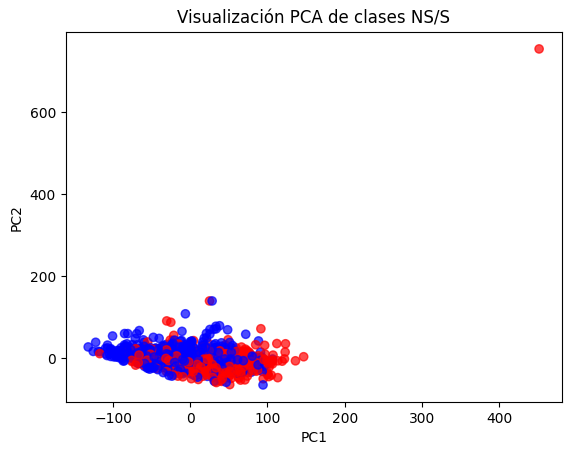

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualización PCA de clases NS/S')
plt.show()


Demostración que las clases se mezclan, no hay separación lineal.

## Tratamiento de Outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def analizar_outliers(df, excluir_cols=['FECHA', 'TARGET']):
    """
    Analiza outliers de todas las columnas numéricas usando boxplots

    Args:
        df: DataFrame a analizar
        excluir_cols: columnas que no queremos analizar
    """
    # Obtener solo columnas numéricas (excluir FECHA y TARGET)
    cols_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
    cols_numericas = [col for col in cols_numericas if col not in excluir_cols]

    n_cols = len(cols_numericas)
    print(f"📊 Analizando {n_cols} variables numéricas\n")

    # Calcular cuántas filas necesitamos (4 columnas por fila)
    n_rows = (n_cols + 3) // 4

    # Crear figura grande
    fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]

    # Estadísticas de outliers
    outlier_stats = []

    for idx, col in enumerate(cols_numericas):
        ax = axes[idx]

        # Crear boxplot
        bp = ax.boxplot(df[col].dropna(), vert=True, patch_artist=True)

        # Colorear
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][0].set_alpha(0.7)

        # Calcular outliers usando IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        n_outliers = len(outliers)
        pct_outliers = (n_outliers / len(df)) * 100

        # Título con info
        ax.set_title(f'{col}\n{n_outliers} outliers ({pct_outliers:.1f}%)',
                     fontsize=10, fontweight='bold')
        ax.set_ylabel('Valor')
        ax.grid(True, alpha=0.3)

        # Guardar estadísticas
        outlier_stats.append({
            'Variable': col,
            'N_outliers': n_outliers,
            'Pct_outliers': round(pct_outliers, 2),
            'Q1': round(Q1, 3),
            'Q3': round(Q3, 3),
            'IQR': round(IQR, 3),
            'Lower_bound': round(lower_bound, 3),
            'Upper_bound': round(upper_bound, 3),
            'Min': round(df[col].min(), 3),
            'Max': round(df[col].max(), 3)
        })

    # Ocultar subplots vacíos
    for idx in range(n_cols, len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Mostrar tabla de estadísticas
    df_stats = pd.DataFrame(outlier_stats)
    df_stats = df_stats.sort_values('N_outliers', ascending=False)

    print("\n" + "="*80)
    print("📈 RESUMEN DE OUTLIERS (ordenado por cantidad)")
    print("="*80)
    print(df_stats.to_string(index=False))

    print("\n" + "="*80)
    print("🔥 TOP 5 VARIABLES CON MÁS OUTLIERS:")
    print("="*80)
    for i, row in df_stats.head(5).iterrows():
        print(f"{row['Variable']:30s} → {row['N_outliers']:4d} outliers ({row['Pct_outliers']:5.2f}%)")

    return df_stats


def detectar_outliers_por_metodo(df, col, metodo='IQR'):
    """
    Detecta outliers usando diferentes métodos

    Args:
        df: DataFrame
        col: nombre de la columna
        metodo: 'IQR', 'zscore', o 'percentil'

    Returns:
        Series booleana indicando outliers
    """
    if metodo == 'IQR':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        return (df[col] < lower) | (df[col] > upper)

    elif metodo == 'zscore':
        from scipy import stats
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        return z_scores > 3

    elif metodo == 'percentil':
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)
        return (df[col] < lower) | (df[col] > upper)


# Ejemplo de uso:
# df_stats = analizar_outliers(df_ventana1)

# Para analizar una variable específica en detalle:
def analizar_variable_detalle(df, col):
    """Análisis detallado de una variable específica"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Boxplot
    axes[0].boxplot(df[col].dropna())
    axes[0].set_title(f'Boxplot: {col}')
    axes[0].set_ylabel('Valor')
    axes[0].grid(True, alpha=0.3)

    # Histograma
    axes[1].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[1].set_title(f'Histograma: {col}')
    axes[1].set_xlabel('Valor')
    axes[1].set_ylabel('Frecuencia')
    axes[1].grid(True, alpha=0.3)

    # Q-Q plot
    from scipy import stats
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[2])
    axes[2].set_title(f'Q-Q Plot: {col}')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Estadísticas
    print(f"\n📊 Estadísticas de {col}:")
    print(f"  Media: {df[col].mean():.3f}")
    print(f"  Mediana: {df[col].median():.3f}")
    print(f"  Desv. Est.: {df[col].std():.3f}")
    print(f"  Min: {df[col].min():.3f}")
    print(f"  Max: {df[col].max():.3f}")

# Ejemplo de uso:
# analizar_variable_detalle(df_ventana1, 'Mh_PRECURSOR')

In [ ]:
# Ver qué filas son outliers en una variable específica
outliers_mask = detectar_outliers_por_metodo(df_ventana1, 'Mh_PRECURSOR', metodo='IQR')
df_outliers = df_ventana1[outliers_mask]
print(df_outliers)

Empty DataFrame
Columns: [Mh_PRECURSOR, Mv_PRECURSOR, F_DENSITY, Delta_foF2_1, foF2_drop_SW, Bz_mean_16_19, F10.7_Index, TARGET]
Index: []


📊 Analizando 7 variables numéricas



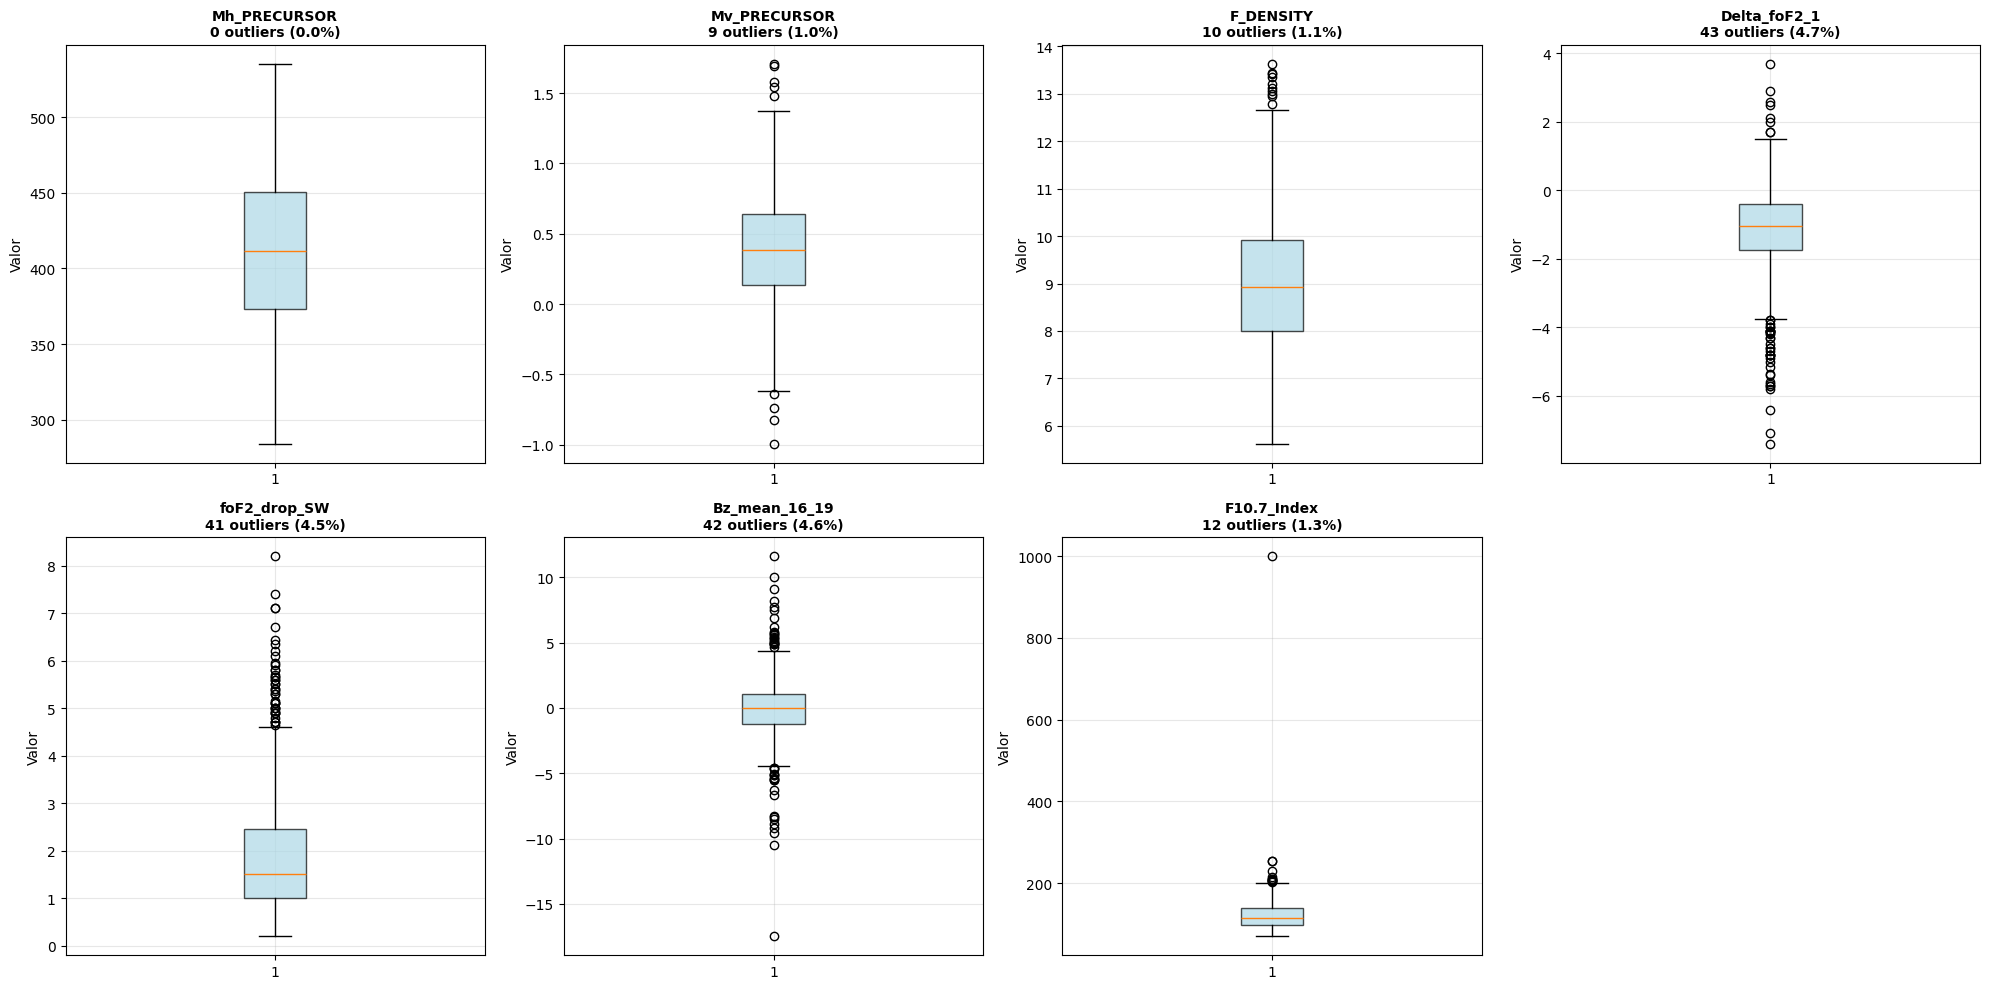


📈 RESUMEN DE OUTLIERS (ordenado por cantidad)
     Variable  N_outliers  Pct_outliers      Q1      Q3    IQR  Lower_bound  Upper_bound     Min     Max
 Delta_foF2_1          43          4.73  -1.750  -0.400  1.350       -3.775        1.625  -7.401   3.700
Bz_mean_16_19          42          4.62  -1.200   1.050  2.250       -4.575        4.425 -17.475  11.625
 foF2_drop_SW          41          4.51   1.000   2.450  1.450       -1.175        4.625   0.200   8.200
  F10.7_Index          12          1.32  96.600 138.500 41.900       33.750      201.350  69.800 999.900
    F_DENSITY          10          1.10   8.003   9.917  1.914        5.132       12.787   5.622  13.636
 Mv_PRECURSOR           9          0.99   0.132   0.642  0.509       -0.631        1.405  -0.993   1.710
 Mh_PRECURSOR           0          0.00 373.400 450.500 77.100      257.750      566.150 284.000 535.600

🔥 TOP 5 VARIABLES CON MÁS OUTLIERS:
Delta_foF2_1                   →   43 outliers ( 4.73%)
Bz_mean_16_19       

In [ ]:
# Análisis general con todos los boxplots
df_stats = analizar_outliers(df_ventana1)

* F10.7_Index: Valor ~1000 es DEFINITIVAMENTE UN ERROR 🚨
* SW_speed_std_16_19: Outlier ~70: Posible, pero verificar
* Pdyn_mean_16_19: Outliers ~80-100: Posibles pero MUY raros, verificar

In [ ]:
# 1. ELIMINAR errores claros
df_ventana1 = df_ventana1[
    (df_ventana1['F10.7_Index'] <= 400)   # Límite físico

]

📊 Analizando 7 variables numéricas



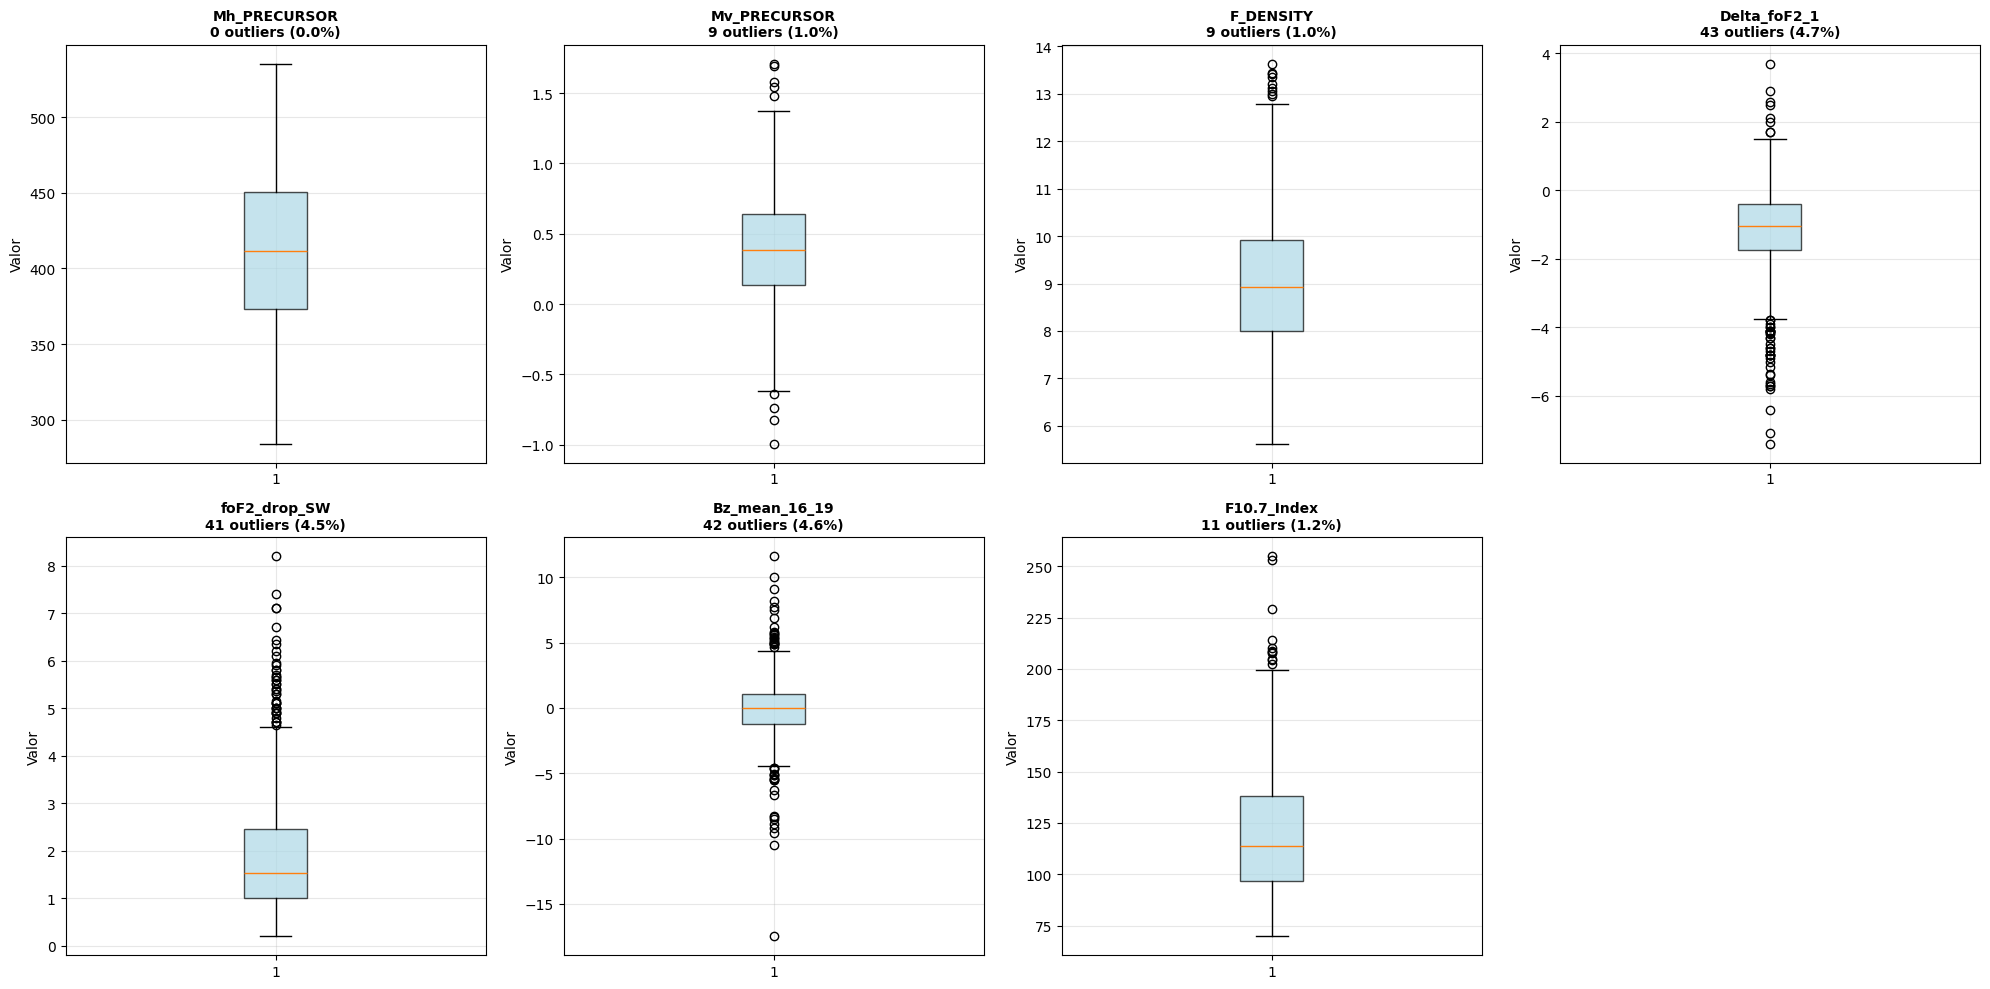


📈 RESUMEN DE OUTLIERS (ordenado por cantidad)
     Variable  N_outliers  Pct_outliers      Q1      Q3    IQR  Lower_bound  Upper_bound     Min     Max
 Delta_foF2_1          43          4.74  -1.750  -0.400  1.350       -3.775        1.625  -7.401   3.700
Bz_mean_16_19          42          4.63  -1.200   1.050  2.250       -4.575        4.425 -17.475  11.625
 foF2_drop_SW          41          4.52   1.000   2.450  1.450       -1.175        4.625   0.200   8.200
  F10.7_Index          11          1.21  96.600 138.275 41.675       34.088      200.787  69.800 255.000
 Mv_PRECURSOR           9          0.99   0.132   0.642  0.510       -0.632        1.407  -0.993   1.710
    F_DENSITY           9          0.99   8.002   9.924  1.922        5.120       12.806   5.622  13.636
 Mh_PRECURSOR           0          0.00 373.350 450.525 77.175      257.587      566.288 284.000 535.600

🔥 TOP 5 VARIABLES CON MÁS OUTLIERS:
Delta_foF2_1                   →   43 outliers ( 4.74%)
Bz_mean_16_19       

In [ ]:
# Análisis general con todos los boxplots
df_stats = analizar_outliers(df_ventana1)

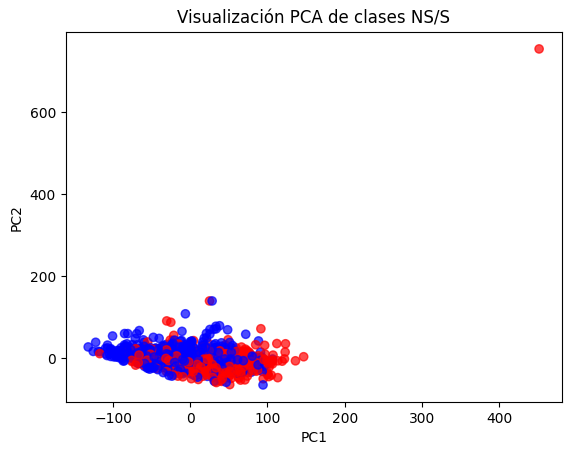

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualización PCA de clases NS/S')
plt.show()

## Data desbalanceada

In [ ]:
conteo = df_ventana1['TARGET'].value_counts()
print(conteo)

TARGET
0    562
1    346
Name: count, dtype: int64


Número de tuplas:

* NS: mucho más que S → clase desbalanceada.

* Objetivo: resamplear S para igualar el número de NS en entrenamiento.

Resampling de S

Por cada tupla original de S:

* Para cada atributo, intercambiamos el valor por el promedio de la parte menos poblada del subband.

* Generamos nuevas tuplas hasta igualar NS.

Comentarios paso a paso

1. Separación de clases: identificamos la minoritaria (S).

2. Discretización: los valores se dividen en 16 subbands para crear rangos.

3. Mapeo a subbands: nos permite localizar qué partes del rango están menos pobladas.

4. Resampling: intercambiamos valores de cada tupla S por el promedio de la subband menos poblada → más uniformidad.

5. Repetición: hasta igualar número de NS → dataset balanceado.

6. Resultado: listo para entrenar tu red neuronal sin sesgo de clase.

# Claudegod ptmr: Resampling + preprocesing

In [ ]:
import numpy as np
import pandas as pd
from typing import List, Tuple, Dict
from collections import defaultdict

class ScintillationResampler:
    """
    Implementación del procedimiento de resampling descrito en:
    Lima et al. (2015) - Prediction of ionospheric scintillation using neural networks

    Adaptado para trabajar con df_ventana1 y TARGET (0=NS, 1=S)
    """

    def __init__(self, n_subbands: int = 16):
        """
        Args:
            n_subbands: Número de subbandas para discretización (default: 16)
        """
        self.n_subbands = n_subbands
        self.subbands = {}  # Almacena las subbandas para cada atributo

    def classify_tuples(self, data: pd.DataFrame, target_column: str = 'TARGET') -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Clasifica tuplas en NS (TARGET=0) y S (TARGET=1).

        Args:
            data: DataFrame con los datos
            target_column: Nombre de la columna TARGET

        Returns:
            Tupla con (data_NS, data_S)
        """
        data_ns = data[data[target_column] == 0].copy()
        data_s = data[data[target_column] == 1].copy()

        print(f"Clasificación inicial:")
        print(f"  - Tuplas NS (TARGET = 0): {len(data_ns)}")
        print(f"  - Tuplas S (TARGET = 1): {len(data_s)}")
        print(f"  - Ratio NS/S: {len(data_ns)/len(data_s):.2f}:1")

        return data_ns, data_s

    def create_subbands(self, values: np.ndarray, attribute_name: str) -> List[Tuple[float, float]]:
        """
        Paso 1: Crea 16 subbandas usando un esquema de promediado iterativo.

        IMPLEMENTACIÓN EXACTA según Lima and Stephany (2013b):
        Los límites se definen recursivamente mediante promedios,
        NO por división lineal equiespaciada.

        Args:
            values: Array con valores del atributo
            attribute_name: Nombre del atributo

        Returns:
            Lista de tuplas (lower_bound, upper_bound) para cada subbanda
        """
        # Ordenar valores para el esquema iterativo
        sorted_values = np.sort(values)
        n_values = len(sorted_values)

        # Esquema de promediado iterativo (Lima and Stephany, 2013b)
        # Los límites se calculan dividiendo recursivamente por promedios
        bounds = [sorted_values[0]]  # Comienza con el mínimo

        # Calcular límites mediante promediado iterativo
        for i in range(1, self.n_subbands):
            # Índice aproximado para esta división
            idx = int((i / self.n_subbands) * n_values)
            idx = min(idx, n_values - 1)

            # En lugar de tomar el valor directamente, usar el promedio
            # de valores alrededor de este punto (esquema iterativo)
            window_size = max(1, n_values // (self.n_subbands * 2))
            start_idx = max(0, idx - window_size)
            end_idx = min(n_values, idx + window_size + 1)

            # Límite definido por el promedio de valores en la ventana
            bound_value = np.mean(sorted_values[start_idx:end_idx])
            bounds.append(bound_value)

        bounds.append(sorted_values[-1])  # Termina con el máximo

        # Crear subbandas a partir de los límites calculados
        subbands = []
        for i in range(self.n_subbands):
            lower = bounds[i]
            upper = bounds[i + 1]
            subbands.append((lower, upper))

        self.subbands[attribute_name] = subbands
        return subbands

    def map_to_subband(self, value: float, attribute_name: str) -> int:
        """
        Paso 2: Mapea un valor a su subbanda correspondiente.

        Args:
            value: Valor a mapear
            attribute_name: Nombre del atributo

        Returns:
            Índice de la subbanda (0 a n_subbands-1)
        """
        subbands = self.subbands[attribute_name]

        for idx, (lower, upper) in enumerate(subbands):
            if idx == len(subbands) - 1:  # Última subbanda incluye el extremo superior
                if lower <= value <= upper:
                    return idx
            else:
                if lower <= value < upper:
                    return idx

        # Si no se encontró (por errores de redondeo), devolver la última
        return len(subbands) - 1

    def get_subband_statistics(self, data_s: pd.DataFrame, attribute_name: str) -> Dict:
        """
        Calcula estadísticas de cada subbanda para un atributo.

        Args:
            data_s: DataFrame con tuplas de clase S
            attribute_name: Nombre del atributo

        Returns:
            Diccionario con estadísticas por subbanda
        """
        values = data_s[attribute_name].values
        subband_data = defaultdict(list)

        for val in values:
            subband_idx = self.map_to_subband(val, attribute_name)
            subband_data[subband_idx].append(val)

        stats = {}
        for subband_idx in range(self.n_subbands):
            if subband_idx in subband_data:
                vals = subband_data[subband_idx]
                stats[subband_idx] = {
                    'values': vals,
                    'count': len(vals),
                    'mean': np.mean(vals),
                    'lower_bound': self.subbands[attribute_name][subband_idx][0],
                    'upper_bound': self.subbands[attribute_name][subband_idx][1]
                }
            else:
                stats[subband_idx] = {
                    'values': [],
                    'count': 0,
                    'mean': None,
                    'lower_bound': self.subbands[attribute_name][subband_idx][0],
                    'upper_bound': self.subbands[attribute_name][subband_idx][1]
                }

        return stats

    def resample_tuple(self, original_tuple: pd.Series, data_s: pd.DataFrame,
                      predictive_attributes: List[str]) -> pd.Series:
        """
        Paso 3: Genera una nueva tupla resampleada a partir de una tupla original.

        El valor de cada atributo se reemplaza por el promedio de los valores
        en la parte menos poblada de la subbanda.

        Args:
            original_tuple: Tupla original de clase S
            data_s: DataFrame con todas las tuplas de clase S (originales + resampleadas)
            predictive_attributes: Lista de nombres de atributos predictivos

        Returns:
            Nueva tupla resampleada
        """
        new_tuple = original_tuple.copy()

        for attr in predictive_attributes:
            original_value = original_tuple[attr]
            subband_idx = self.map_to_subband(original_value, attr)

            # Obtener estadísticas de la subbanda
            stats = self.get_subband_statistics(data_s, attr)
            subband_info = stats[subband_idx]

            if subband_info['count'] == 0:
                # Si la subbanda está vacía, mantener el valor original
                continue

            # Determinar la parte menos poblada de la subbanda
            lower_bound = subband_info['lower_bound']
            upper_bound = subband_info['upper_bound']
            mid_point = (lower_bound + upper_bound) / 2

            # Dividir valores en parte inferior y superior de la subbanda
            values = np.array(subband_info['values'])
            lower_half = values[values < mid_point]
            upper_half = values[values >= mid_point]

            # Elegir la parte menos poblada
            if len(lower_half) <= len(upper_half):
                less_populated_values = lower_half if len(lower_half) > 0 else values
            else:
                less_populated_values = upper_half if len(upper_half) > 0 else values

            # Calcular el promedio de la parte menos poblada
            new_value = np.mean(less_populated_values)
            new_tuple[attr] = new_value

        return new_tuple

    def resample_class_s(self, data_ns: pd.DataFrame, data_s: pd.DataFrame,
                        predictive_attributes: List[str], target_column: str = 'TARGET') -> pd.DataFrame:
        """
        Procedimiento completo de resampling para balancear las clases.

        Args:
            data_ns: DataFrame con tuplas de clase NS
            data_s: DataFrame con tuplas originales de clase S
            predictive_attributes: Lista de atributos predictivos
            target_column: Nombre de la columna TARGET

        Returns:
            DataFrame con tuplas de clase S balanceadas (originales + resampleadas)
        """
        target_count = len(data_ns)
        original_count = len(data_s)

        print(f"\n{'='*70}")
        print(f"INICIANDO RESAMPLING")
        print(f"{'='*70}")
        print(f"  - Tuplas objetivo: {target_count}")
        print(f"  - Tuplas originales de clase S: {original_count}")
        print(f"  - Tuplas a generar: {target_count - original_count}")

        # Paso 1: Crear subbandas para cada atributo predictivo
        print(f"\nPaso 1: Creando {self.n_subbands} subbandas para cada atributo...")
        for attr in predictive_attributes:
            all_values = data_s[attr].values
            self.create_subbands(all_values, attr)
        print(f"  ✓ Subbandas creadas para {len(predictive_attributes)} atributos")

        # Inicializar con las tuplas originales
        resampled_data = data_s.copy()
        original_indices = data_s.index.tolist()

        # Paso 2 y 3: Generar tuplas resampleadas iterativamente
        print(f"\nPasos 2-3: Generando tuplas resampleadas...")
        iteration = 0
        progress_step = max((target_count - original_count) // 10, 1)

        while len(resampled_data) < target_count:
            iteration += 1

            # Seleccionar una tupla original aleatoriamente
            source_idx = np.random.choice(original_indices)
            source_tuple = data_s.loc[source_idx]

            # Generar nueva tupla resampleada
            new_tuple = self.resample_tuple(source_tuple, resampled_data, predictive_attributes)

            # Agregar la nueva tupla (con nuevo índice único)
            new_idx = f"resampled_{iteration}"
            resampled_data.loc[new_idx] = new_tuple

            if iteration % progress_step == 0 or len(resampled_data) == target_count:
                progress = (len(resampled_data) / target_count) * 100
                print(f"  Progreso: {len(resampled_data)}/{target_count} tuplas ({progress:.1f}%)")

        print(f"\n{'='*70}")
        print(f"✓ RESAMPLING COMPLETADO")
        print(f"{'='*70}")
        print(f"  - Total tuplas clase S: {len(resampled_data)}")
        print(f"  - Tuplas originales: {original_count}")
        print(f"  - Tuplas resampleadas: {len(resampled_data) - original_count}")
        print(f"  - Balance alcanzado: {'SÍ' if len(resampled_data) == target_count else 'NO'}")

        return resampled_data


class PreprocessingTransformer:
    """
    Implementación del preprocesamiento descrito en la Sección 3.2 del paper.

    Genera dos nuevos valores para cada atributo predictivo usando las PDFs
    de las clases NS y S para mejorar la separabilidad.
    """

    def __init__(self, normalization_range: Tuple[float, float] = (0.05, 0.95)):
        """
        Args:
            normalization_range: Rango de normalización (default: [0.05, 0.95])
        """
        self.norm_min, self.norm_max = normalization_range
        self.pdf_params_ns = {}  # Parámetros (mean, std) de PDFs de clase NS
        self.pdf_params_s = {}   # Parámetros (mean, std) de PDFs de clase S
        self.original_ranges = {}  # Rangos originales para normalización

    def normalize_to_range(self, values: np.ndarray, attr_name: str) -> np.ndarray:
        """
        Normaliza valores al rango [0.05, 0.95] para evitar saturación.

        Args:
            values: Array con valores a normalizar
            attr_name: Nombre del atributo

        Returns:
            Valores normalizados
        """
        min_val = values.min()
        max_val = values.max()

        # Guardar rangos originales
        self.original_ranges[attr_name] = (min_val, max_val)

        # Normalizar a [0.05, 0.95]
        if max_val - min_val == 0:
            return np.full_like(values, self.norm_min)

        normalized = self.norm_min + (values - min_val) * (self.norm_max - self.norm_min) / (max_val - min_val)
        return normalized

    def fit_normal_pdfs(self, df_ns: pd.DataFrame, df_s: pd.DataFrame,
                       predictive_attributes: List[str]):
        """
        Calcula los parámetros (media, std) de las PDFs normales para cada clase.

        Este es el paso clave: aproximar las distribuciones de cada atributo
        mediante PDFs normales para cada clase.

        CORRECCIÓN: Normaliza cada clase por separado para evitar problemas
        con índices desordenados.

        Args:
            df_ns: DataFrame con tuplas de clase NS
            df_s: DataFrame con tuplas de clase S
            predictive_attributes: Lista de atributos predictivos
        """
        print(f"\n{'='*70}")
        print("FITTING NORMAL PDFs (Figura 3 del paper)")
        print(f"{'='*70}")

        for attr in predictive_attributes:
            # CORRECCIÓN: Normalizar cada clase por separado
            # Primero, determinar el rango global (min y max de ambas clases)
            all_values = pd.concat([df_ns[attr], df_s[attr]]).values
            min_val = all_values.min()
            max_val = all_values.max()

            # Guardar rango original
            self.original_ranges[attr] = (min_val, max_val)

            # Normalizar cada clase por separado usando el mismo rango global
            ns_values = df_ns[attr].values
            s_values = df_s[attr].values

            if max_val - min_val == 0:
                ns_normalized = np.full_like(ns_values, self.norm_min, dtype=float)
                s_normalized = np.full_like(s_values, self.norm_min, dtype=float)
            else:
                ns_normalized = self.norm_min + (ns_values - min_val) * (self.norm_max - self.norm_min) / (max_val - min_val)
                s_normalized = self.norm_min + (s_values - min_val) * (self.norm_max - self.norm_min) / (max_val - min_val)

            # Calcular parámetros de las PDFs normales para cada clase
            mean_ns = ns_normalized.mean()
            std_ns = ns_normalized.std()

            mean_s = s_normalized.mean()
            std_s = s_normalized.std()

            self.pdf_params_ns[attr] = {'mean': mean_ns, 'std': std_ns}
            self.pdf_params_s[attr] = {'mean': mean_s, 'std': std_s}

            # Calcular coeficiente de variación
            cv_ns = std_ns / mean_ns if mean_ns != 0 else 0
            cv_s = std_s / mean_s if mean_s != 0 else 0

            print(f"\n{attr}:")
            print(f"  NS - Mean: {mean_ns:.4f}, Std: {std_ns:.4f}, CV: {cv_ns:.4f}")
            print(f"  S  - Mean: {mean_s:.4f}, Std: {std_s:.4f}, CV: {cv_s:.4f}")

    def apply_linear_mapping(self, mean: float, std: float,
                            reduction_factor: float = 0.5) -> Tuple[float, float]:
        """
        Aplica mapeo lineal usando la propiedad reproductiva de la distribución normal.

        Mantiene la media pero reduce el coeficiente de variación para mejorar
        la separabilidad (como se muestra en Figura 4 del paper).

        Args:
            mean: Media de la PDF original
            std: Desviación estándar de la PDF original
            reduction_factor: Factor de reducción del coeficiente de variación

        Returns:
            Tupla con (nueva_media, nueva_std)
        """
        # Mantener la media, reducir la desviación estándar
        new_mean = mean
        new_std = std * reduction_factor

        return new_mean, new_std

    def transform(self, df: pd.DataFrame, predictive_attributes: List[str],
                 reduction_factor: float = 0.5) -> pd.DataFrame:
        """
        Transforma el DataFrame generando dos nuevos valores por atributo.

        Como se describe en el paper (Figura 5), cada tupla genera dos nuevos
        valores: uno basado en la PDF de NS y otro en la PDF de S.

        Args:
            df: DataFrame a transformar
            predictive_attributes: Lista de atributos predictivos
            reduction_factor: Factor de reducción del CV (default: 0.5)

        Returns:
            DataFrame transformado con nuevas columnas
        """
        print(f"\n{'='*70}")
        print("APPLYING LINEAR MAPPING (Figura 4 del paper)")
        print(f"{'='*70}")

        df_transformed = df.copy()

        # Aplicar mapeo lineal a los parámetros de las PDFs
        mapped_params_ns = {}
        mapped_params_s = {}

        for attr in predictive_attributes:
            # Obtener parámetros originales
            mean_ns = self.pdf_params_ns[attr]['mean']
            std_ns = self.pdf_params_ns[attr]['std']
            mean_s = self.pdf_params_s[attr]['mean']
            std_s = self.pdf_params_s[attr]['std']

            # Aplicar mapeo lineal (reducir variación, mantener media)
            new_mean_ns, new_std_ns = self.apply_linear_mapping(mean_ns, std_ns, reduction_factor)
            new_mean_s, new_std_s = self.apply_linear_mapping(mean_s, std_s, reduction_factor)

            mapped_params_ns[attr] = {'mean': new_mean_ns, 'std': new_std_ns}
            mapped_params_s[attr] = {'mean': new_mean_s, 'std': new_std_s}

        print(f"Reducción del coeficiente de variación: {reduction_factor}")
        print("Esto mejora la separabilidad entre clases (ver Figura 4)")

        # Generar dos nuevos valores para cada atributo (Figura 5)
        print(f"\n{'='*70}")
        print("GENERATING DUAL VALUES (Figura 5 del paper)")
        print(f"{'='*70}")

        for attr in predictive_attributes:
            # Normalizar valores originales
            values = df[attr].values
            min_val, max_val = self.original_ranges[attr]

            if max_val - min_val == 0:
                normalized = np.full_like(values, self.norm_min, dtype=float)
            else:
                normalized = self.norm_min + (values - min_val) * (self.norm_max - self.norm_min) / (max_val - min_val)

            # Calcular probabilidad usando PDF de clase NS
            mean_ns = mapped_params_ns[attr]['mean']
            std_ns = mapped_params_ns[attr]['std']
            prob_ns = self._calculate_probability(normalized, mean_ns, std_ns)

            # Calcular probabilidad usando PDF de clase S
            mean_s = mapped_params_s[attr]['mean']
            std_s = mapped_params_s[attr]['std']
            prob_s = self._calculate_probability(normalized, mean_s, std_s)

            # Crear nuevas columnas con sufijo _NS y _S
            df_transformed[f'{attr}_NS'] = prob_ns
            df_transformed[f'{attr}_S'] = prob_s

        print(f"\n✓ Transformación completada")
        print(f"  Cada atributo ahora tiene 2 versiones:")
        print(f"    - {attr}_NS: probabilidad según PDF de clase NS")
        print(f"    - {attr}_S: probabilidad según PDF de clase S")

        return df_transformed

    def _calculate_probability(self, values: np.ndarray, mean: float, std: float) -> np.ndarray:
        """
        Calcula la probabilidad usando la PDF normal.

        Args:
            values: Valores normalizados
            mean: Media de la PDF
            std: Desviación estándar de la PDF

        Returns:
            Array con probabilidades
        """
        if std == 0:
            # Si std es 0, devolver 1 si el valor es igual a la media, 0 si no
            return np.where(np.abs(values - mean) < 1e-10, 1.0, 0.0)

        # Fórmula de la PDF normal
        coefficient = 1.0 / (std * np.sqrt(2 * np.pi))
        exponent = -0.5 * ((values - mean) / std) ** 2
        probabilities = coefficient * np.exp(exponent)

        # Normalizar las probabilidades para que estén en [0, 1]
        if probabilities.max() > 0:
            probabilities = probabilities / probabilities.max()

        return probabilities


def apply_resampling_to_data(df_ventana1: pd.DataFrame, n_subbands: int = 16,
                             random_seed: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Aplica el procedimiento de resampling completo a df_ventana1.

    Args:
        df_ventana1: DataFrame con tus datos
        n_subbands: Número de subbandas (default: 16)
        random_seed: Semilla aleatoria para reproducibilidad

    Returns:
        Tupla con (df_NS, df_S_original, df_S_resampled)
    """
    np.random.seed(random_seed)

    # Definir atributos predictivos (todos excepto TARGET)
    predictive_attributes = [
        'Mh_PRECURSOR', 'Mv_PRECURSOR', 'F_DENSITY', 'Delta_foF2_1',
        'foF2_drop_SW', 'Bz_mean_16_19', 'Bz_slope_16_19', 'SW_speed_mean_16_19',
        'SW_speed_std_16_19', 'SW_speed_slope_16_19', 'Dst_min_16_19',
        'Pdyn_mean_16_19', 'BY_mean_16_19', 'Kp_last_6h_mean', 'F10.7_Index'
    ]

    print("="*70)
    print("RESAMPLING PROCEDURE - Ionospheric Scintillation Prediction")
    print("Adaptado de Lima et al. (2015)")
    print("="*70)
    print(f"\nDataFrame original: {len(df_ventana1)} tuplas")
    print(f"Atributos predictivos: {len(predictive_attributes)}")

    # Crear el resampler
    resampler = ScintillationResampler(n_subbands=n_subbands)

    # Clasificar tuplas
    df_NS, df_S = resampler.classify_tuples(df_ventana1, target_column='TARGET')

    # Realizar resampling
    df_S_resampled = resampler.resample_class_s(df_NS, df_S, predictive_attributes,
                                                 target_column='TARGET')

    # Estadísticas comparativas
    print(f"\n{'='*70}")
    print("ESTADÍSTICAS COMPARATIVAS")
    print(f"{'='*70}")

    for attr in predictive_attributes[:5]:  # Mostrar solo los primeros 5 para no saturar
        print(f"\n{attr}:")
        print(f"  NS     - Media: {df_NS[attr].mean():8.4f}, Std: {df_NS[attr].std():8.4f}")
        print(f"  S (orig) - Media: {df_S[attr].mean():8.4f}, Std: {df_S[attr].std():8.4f}")
        print(f"  S (resamp) - Media: {df_S_resampled[attr].mean():8.4f}, Std: {df_S_resampled[attr].std():8.4f}")

    print(f"\n... (mostrando solo los primeros 5 atributos)")

    return df_NS, df_S, df_S_resampled


def apply_full_preprocessing(df_ventana1: pd.DataFrame, n_subbands: int = 16,
                            reduction_factor: float = 0.5,
                            random_seed: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame, Dict]:
    """
    Pipeline completo: Resampling (3.1) + Preprocessing (3.2).

    Args:
        df_ventana1: DataFrame original
        n_subbands: Número de subbandas para resampling
        reduction_factor: Factor de reducción del CV en preprocessing
        random_seed: Semilla aleatoria

    Returns:
        Tupla con (df_train_transformed, df_test_transformed, preprocessing_info)
    """

    predictive_attributes = [
        'Mh_PRECURSOR', 'Mv_PRECURSOR', 'F_DENSITY', 'Delta_foF2_1',
        'foF2_drop_SW', 'Bz_mean_16_19', 'Bz_slope_16_19', 'SW_speed_mean_16_19',
        'SW_speed_std_16_19', 'SW_speed_slope_16_19', 'Dst_min_16_19',
        'Pdyn_mean_16_19', 'BY_mean_16_19', 'Kp_last_6h_mean', 'F10.7_Index'
    ]

    print("="*70)
    print("PIPELINE COMPLETO: RESAMPLING + PREPROCESSING")
    print("Secciones 3.1 y 3.2 del paper Lima et al. (2015)")
    print("="*70)

    # PASO 1: Resampling (Sección 3.1)
    df_NS, df_S_original, df_S_resampled = apply_resampling_to_data(
        df_ventana1, n_subbands, random_seed
    )

    # Crear conjunto balanceado
    df_balanced = pd.concat([df_NS, df_S_resampled], ignore_index=True)
    df_balanced = df_balanced.sample(frac=1, random_state=random_seed).reset_index(drop=True)

    print(f"\n✓ Conjunto balanceado creado: {len(df_balanced)} tuplas")

    # PASO 2: Preprocessing (Sección 3.2)
    preprocessor = PreprocessingTransformer(normalization_range=(0.05, 0.95))

    # Fit: Calcular PDFs usando solo las tuplas originales (no resampleadas)
    preprocessor.fit_normal_pdfs(df_NS, df_S_original, predictive_attributes)

    # Transform: Aplicar transformación al conjunto balanceado
    df_transformed = preprocessor.transform(df_balanced, predictive_attributes, reduction_factor)

    # Información para usar después
    preprocessing_info = {
        'preprocessor': preprocessor,
        'predictive_attributes': predictive_attributes,
        'dual_attributes_ns': [f'{attr}_NS' for attr in predictive_attributes],
        'dual_attributes_s': [f'{attr}_S' for attr in predictive_attributes],
        'n_original_ns': len(df_NS),
        'n_original_s': len(df_S_original),
        'n_resampled_s': len(df_S_resampled) - len(df_S_original)
    }

    print(f"\n{'='*70}")
    print("RESUMEN FINAL")
    print(f"{'='*70}")
    print(f"Tuplas en conjunto transformado: {len(df_transformed)}")
    print(f"Atributos originales: {len(predictive_attributes)}")
    print(f"Atributos duales generados: {len(predictive_attributes) * 2}")
    print(f"Total de features para la red neuronal: {len(predictive_attributes) * 2}")

    return df_transformed, preprocessing_info


In [ ]:
# 1. Aplicar pipeline completo
df_transformed, info = apply_full_preprocessing(df_ventana1)

# 2. Separar features y target
X_dual = df_transformed[info['dual_attributes_ns'] + info['dual_attributes_s']]
y = df_transformed['TARGET']

# 3. Entrenar red neuronal dual (como en Figura 6 del paper)
# La arquitectura dual usa:
#   - Subred 1: atributos con sufijo _NS (13 inputs)
#   - Subred 2: atributos con sufijo _S (13 inputs)
#   - Output: combinación de ambas subredes

X_ns = df_transformed[info['dual_attributes_ns']].values  # Para subred 1
X_s = df_transformed[info['dual_attributes_s']].values    # Para subred 2


PIPELINE COMPLETO: RESAMPLING + PREPROCESSING
Secciones 3.1 y 3.2 del paper Lima et al. (2015)
RESAMPLING PROCEDURE - Ionospheric Scintillation Prediction
Adaptado de Lima et al. (2015)

DataFrame original: 901 tuplas
Atributos predictivos: 15
Clasificación inicial:
  - Tuplas NS (TARGET = 0): 560
  - Tuplas S (TARGET = 1): 341
  - Ratio NS/S: 1.64:1

INICIANDO RESAMPLING
  - Tuplas objetivo: 560
  - Tuplas originales de clase S: 341
  - Tuplas a generar: 219

Paso 1: Creando 16 subbandas para cada atributo...
  ✓ Subbandas creadas para 15 atributos

Pasos 2-3: Generando tuplas resampleadas...
  Progreso: 362/560 tuplas (64.6%)
  Progreso: 383/560 tuplas (68.4%)
  Progreso: 404/560 tuplas (72.1%)
  Progreso: 425/560 tuplas (75.9%)
  Progreso: 446/560 tuplas (79.6%)
  Progreso: 467/560 tuplas (83.4%)
  Progreso: 488/560 tuplas (87.1%)
  Progreso: 509/560 tuplas (90.9%)
  Progreso: 530/560 tuplas (94.6%)
  Progreso: 551/560 tuplas (98.4%)
  Progreso: 560/560 tuplas (100.0%)

✓ RESAMPLING

In [ ]:
# OPCIÓN 2: Solo Resampling (sin preprocessing)

# 1. Aplicar solo resampling
df_NS, df_S_original, df_S_resampled = apply_resampling_to_data(df_ventana1)

# 2. Crear conjunto balanceado
df_balanced = pd.concat([df_NS, df_S_resampled], ignore_index=True)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# 3. Usar atributos originales
predictive_attrs = ['Mh_PRECURSOR', 'Mv_PRECURSOR', ..., 'F10.7_Index']
X = df_balanced[predictive_attrs]
y = df_balanced['TARGET']

## Visualizar grafica de PDFs

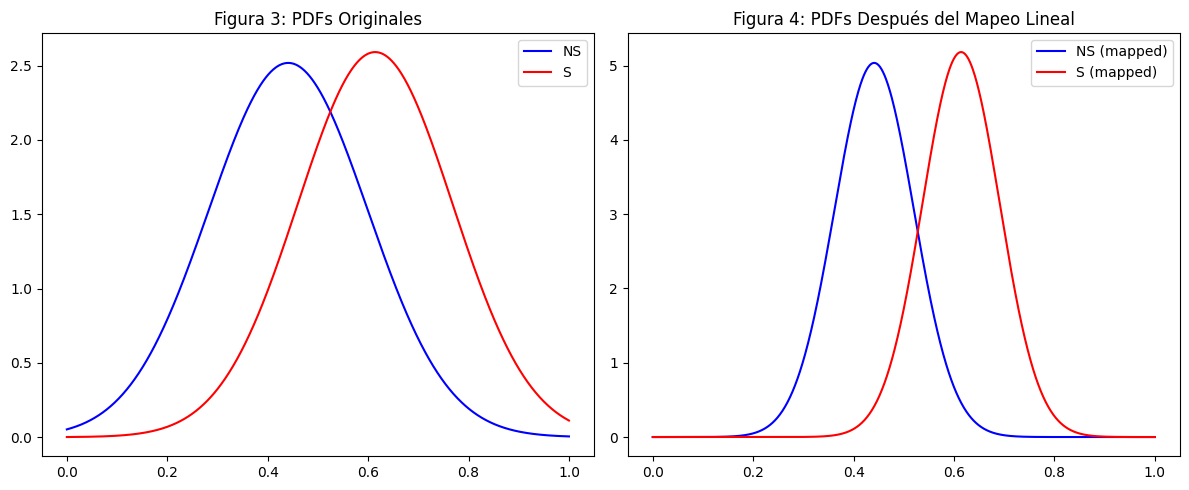

In [ ]:
# OPCIÓN 3: Visualizar PDFs (como Figuras 3 y 4)

import matplotlib.pyplot as plt
from scipy.stats import norm

# Después de aplicar el pipeline
preprocessor = info['preprocessor']

# Graficar un atributo
attr = 'Mh_PRECURSOR'
x = np.linspace(0, 1, 1000)

# PDF original (Figura 3)
mean_ns = preprocessor.pdf_params_ns[attr]['mean']
std_ns = preprocessor.pdf_params_ns[attr]['std']
mean_s = preprocessor.pdf_params_s[attr]['mean']
std_s = preprocessor.pdf_params_s[attr]['std']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, norm.pdf(x, mean_ns, std_ns), 'b-', label='NS')
plt.plot(x, norm.pdf(x, mean_s, std_s), 'r-', label='S')
plt.title('Figura 3: PDFs Originales')
plt.legend()

# PDF después del mapeo (Figura 4)
plt.subplot(1, 2, 2)
new_std_ns = std_ns * 0.5  # reducción del CV
new_std_s = std_s * 0.5
plt.plot(x, norm.pdf(x, mean_ns, new_std_ns), 'b-', label='NS (mapped)')
plt.plot(x, norm.pdf(x, mean_s, new_std_s), 'r-', label='S (mapped)')
plt.title('Figura 4: PDFs Después del Mapeo Lineal')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import os

# Ruta donde guardar las figuras
os.makedirs("pdf_plots", exist_ok=True)

# Lista de atributos a graficar (los predictivos)
attributes = preprocessor.pdf_params_ns.keys()

# Rango para evaluar PDFs
x = np.linspace(0, 1, 1000)

for attr in attributes:
    # Parámetros originales
    mean_ns = preprocessor.pdf_params_ns[attr]['mean']
    std_ns = preprocessor.pdf_params_ns[attr]['std']

    mean_s = preprocessor.pdf_params_s[attr]['mean']
    std_s = preprocessor.pdf_params_s[attr]['std']

    # PDFs originales
    pdf_ns = norm.pdf(x, mean_ns, std_ns)
    pdf_s  = norm.pdf(x, mean_s,  std_s)

    # PDFs mapeados (paper ⇒ reducción de CV)
    new_std_ns = std_ns * 0.5
    new_std_s  = std_s  * 0.5

    pdf_ns_map = norm.pdf(x, mean_ns, new_std_ns)
    pdf_s_map  = norm.pdf(x, mean_s,  new_std_s)

    # ===== NORMALIZACIÓN COMO EN EL PAPER =====
    pdf_ns_normalizado = pdf_ns / pdf_ns.max()
    pdf_s_normalizado  = pdf_s  / pdf_s.max()

    # ===== NORMALIZACIÓN COMO EN EL PAPER =====
    pdf_ns_map_normalizado = pdf_ns_map / pdf_ns_map.max()
    pdf_s_map_normalizado  = pdf_s_map  / pdf_s_map.max()

    # Crear figura
    plt.figure(figsize=(12, 5))

    # --------- PANEL IZQUIERDO: PDFs Originales -------------
    plt.subplot(1, 2, 1)
    plt.plot(x, pdf_ns_normalizado, 'b-', label='NS')
    plt.plot(x, pdf_s_normalizado,  'r-', label='S')
    plt.title(f'{attr} - PDFs Originales')
    plt.xlabel(attr)
    plt.legend()

    # --------- PANEL DERECHO: PDFs Mapeados -----------------
    plt.subplot(1, 2, 2)
    plt.plot(x, pdf_ns_map_normalizado, 'b-', label='NS (mapped)')
    plt.plot(x, pdf_s_map_normalizado,  'r-', label='S (mapped)')
    plt.title(f'{attr} - PDFs Mapeados')
    plt.xlabel(attr)
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"pdf_plots/{attr}_pdfs.png", dpi=120)
    plt.close()

print("Listo ✔ Todas las figuras están en la carpeta: pdf_plots/")

Listo ✔ Todas las figuras están en la carpeta: pdf_plots/


## Separación de medias y reducción de variación:

Como mencionaba el paper, puedes rescalar la desviación estándar para mejorar la separación:

Esto “aprieta” las pdfs, reduciendo el solapamiento entre clases.

Beneficio:

* Cada fila ahora tiene información de qué tan probable es cada atributo según NS y S.

* Esto ayuda a la red a separar mejor las clases, incluso si hay solapamiento en los valores originales.

Opcional: puedes log-transformar o normalizar las probabilidades para evitar valores extremadamente pequeños.

## Preprocesamiento Extra

Objetivo del preprocessing

* Tenemos un dataset balanceado (df_train_balanced) con clases NS (0) y S (1).

* Queremos mejorar la separación entre clases para que la red neuronal aprenda mejor.

* La idea central:

  1. Normalizar cada atributo al rango [0.05, 0.95] para evitar saturar la activación de la red.

  2. Aproximar los valores de cada atributo por pdf normales separadas por clase.

  3. Mapear cada valor al pdf de cada clase, obteniendo dos probabilidades por atributo: una según NS y otra según S.

  4. Estas probabilidades son los nuevos inputs para la red.

Aproximar pdfs normales por clase:
* Para cada atributo y clase, calculamos la media y desviación estándar:

Mapear cada valor a su pdf → obtener dos probabilidades
* La idea: cada atributo x se transforma en dos valores:
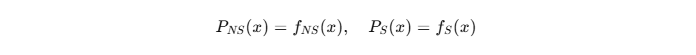

donde f es la densidad de probabilidad normal.

Resultado:

* Cada atributo original → dos columnas: attr_prob_NS y attr_prob_S.

* Estas columnas son las que realmente usarás para entrenar tu red.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_histograma_con_pdfs(attr, df_NS, df_S, original_ranges, preprocessor,
                             norm_min=0.05, norm_max=0.95):
    """
    Plotea:
      - Histograma normalizado NS/S
      - PDFs originales (paper Fig. 3)
      - PDFs mapeadas (paper Fig. 4)
    """

    # ========== 1. NORMALIZACIÓN ==========
    def normalize(values, min_val, max_val):
        if max_val - min_val == 0:
            return np.full_like(values, norm_min, dtype=float)
        return norm_min + (values - min_val) * (norm_max - norm_min) / (max_val - min_val)

    min_val, max_val = original_ranges[attr]

    norm_NS = normalize(df_NS[attr].values, min_val, max_val)
    norm_S  = normalize(df_S[attr].values,  min_val, max_val)

    # ========== 2. PDFs del preprocesador ==========
    mean_ns = preprocessor.pdf_params_ns[attr]['mean']
    std_ns  = preprocessor.pdf_params_ns[attr]['std']

    mean_s = preprocessor.pdf_params_s[attr]['mean']
    std_s  = preprocessor.pdf_params_s[attr]['std']

    # PDFs mapeadas (paper → reducción del CV ≈ reducir std a la mitad)
    new_std_ns = std_ns * 0.5
    new_std_s  = std_s * 0.5

    # Eje X para PDFs
    x = np.linspace(norm_min, norm_max, 1000)

    # ========== 3. GRÁFICAS ==========
    plt.figure(figsize=(14, 6))

    # PANEL 1 — Histograma + PDFs originales
    plt.subplot(1, 2, 1)
    plt.hist(norm_NS, bins=40, density=True, alpha=0.45, label="NS (hist)")
    plt.hist(norm_S,  bins=40, density=True, alpha=0.45, label="S (hist)")

    plt.plot(x, norm.pdf(x, mean_ns, std_ns), 'b-', linewidth=2, label="PDF NS (orig)")
    plt.plot(x, norm.pdf(x, mean_s, std_s),   'r-', linewidth=2, label="PDF S (orig)")

    plt.title(f"{attr} — Histograma + PDFs Originales")
    plt.xlabel("Valor normalizado (0.05–0.95)")
    plt.ylabel("Densidad")
    plt.grid(alpha=0.3)
    plt.legend()

    # PANEL 2 — PDFs mapeadas
    plt.subplot(1, 2, 2)
    plt.plot(x, norm.pdf(x, mean_ns, new_std_ns), 'b-', linewidth=2, label="PDF NS (mapped)")
    plt.plot(x, norm.pdf(x, mean_s, new_std_s),   'r-', linewidth=2, label="PDF S (mapped)")

    plt.title(f"{attr} — PDFs Mapeadas (Reducción del CV)")
    plt.xlabel("Valor normalizado (0.05–0.95)")
    plt.grid(alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()


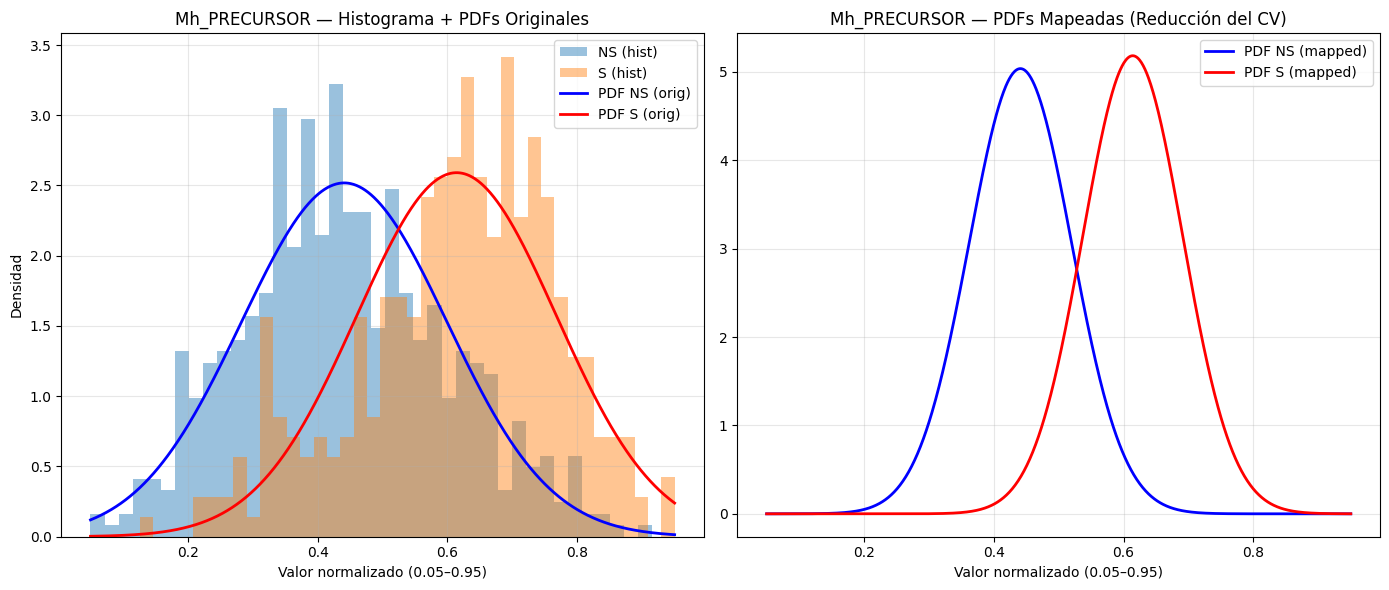

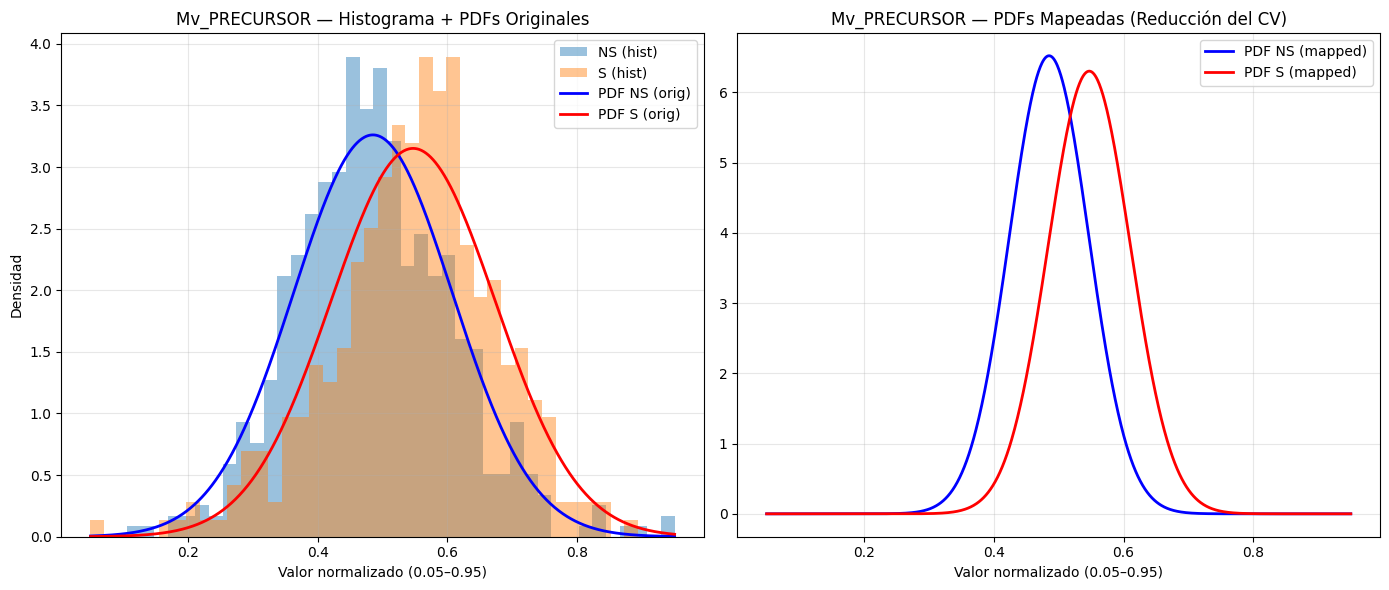

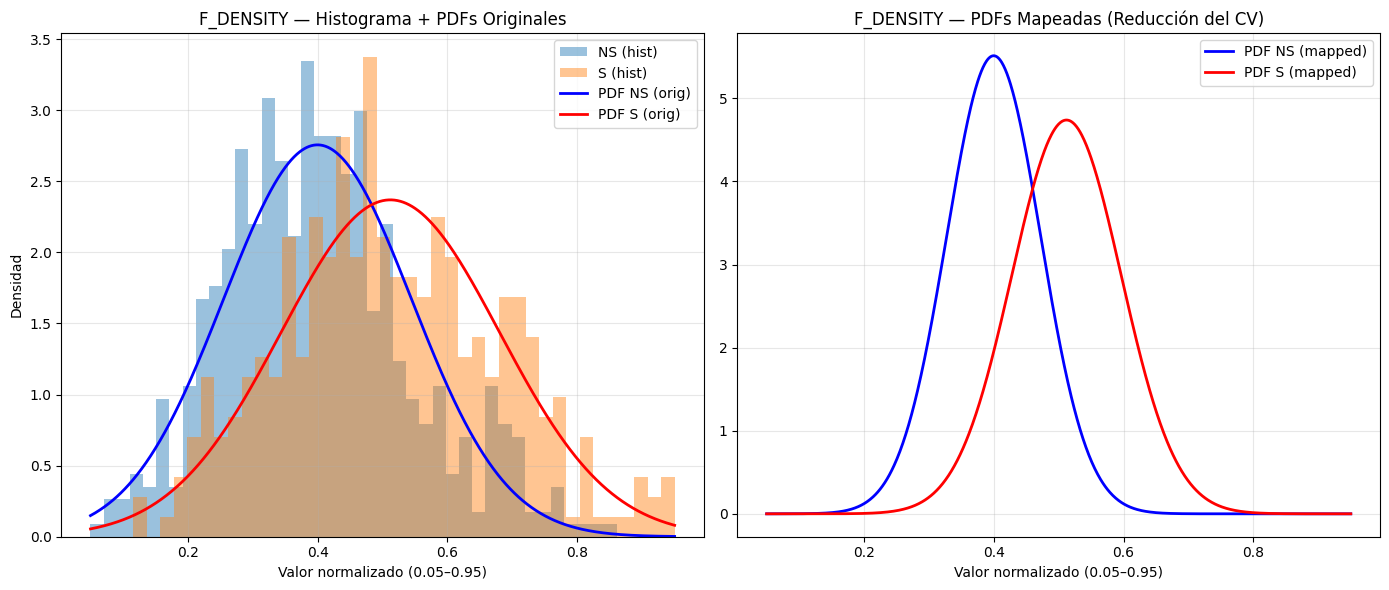

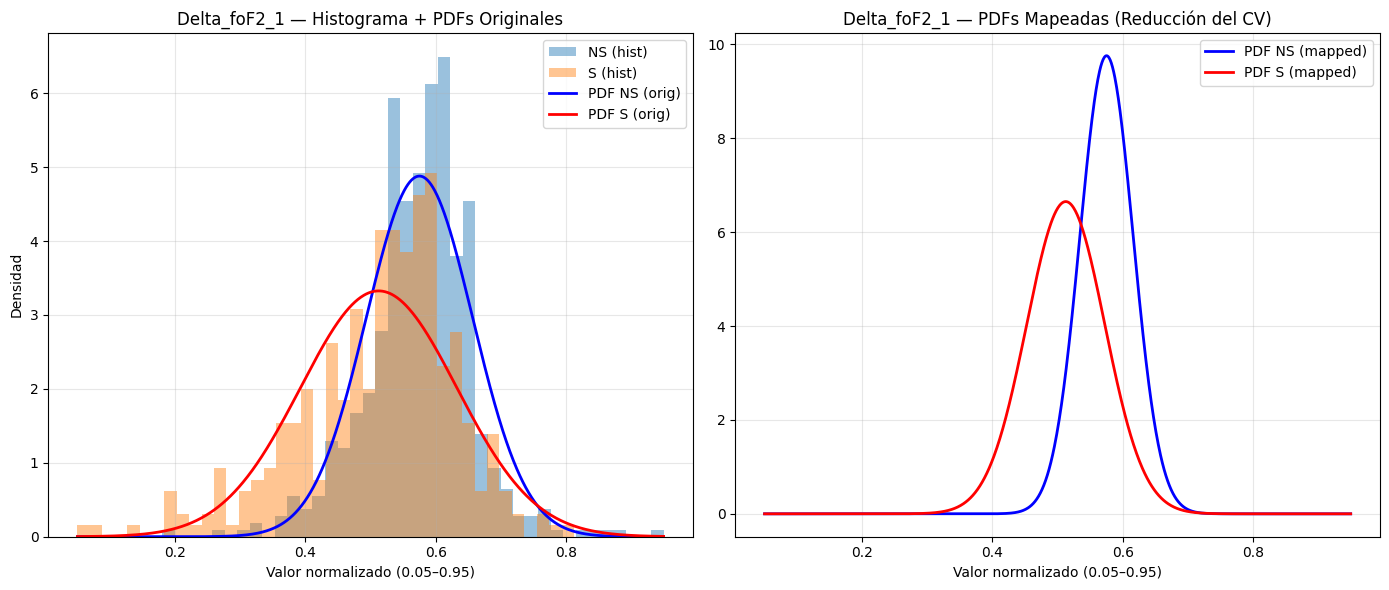

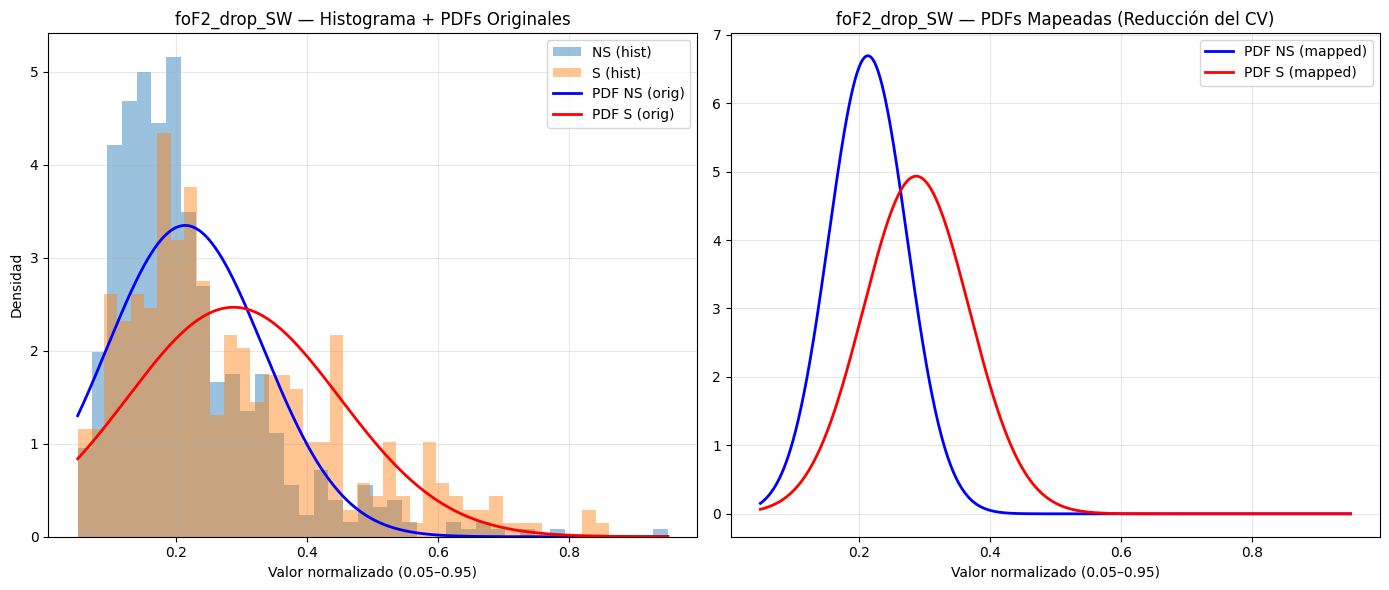

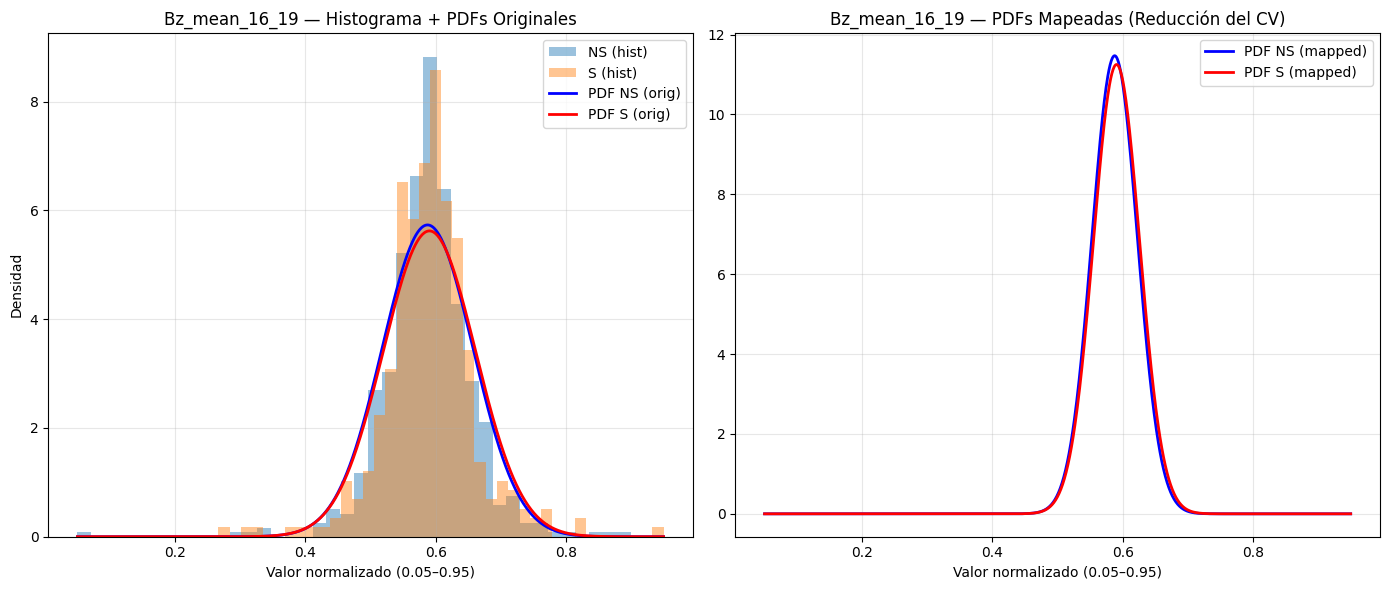

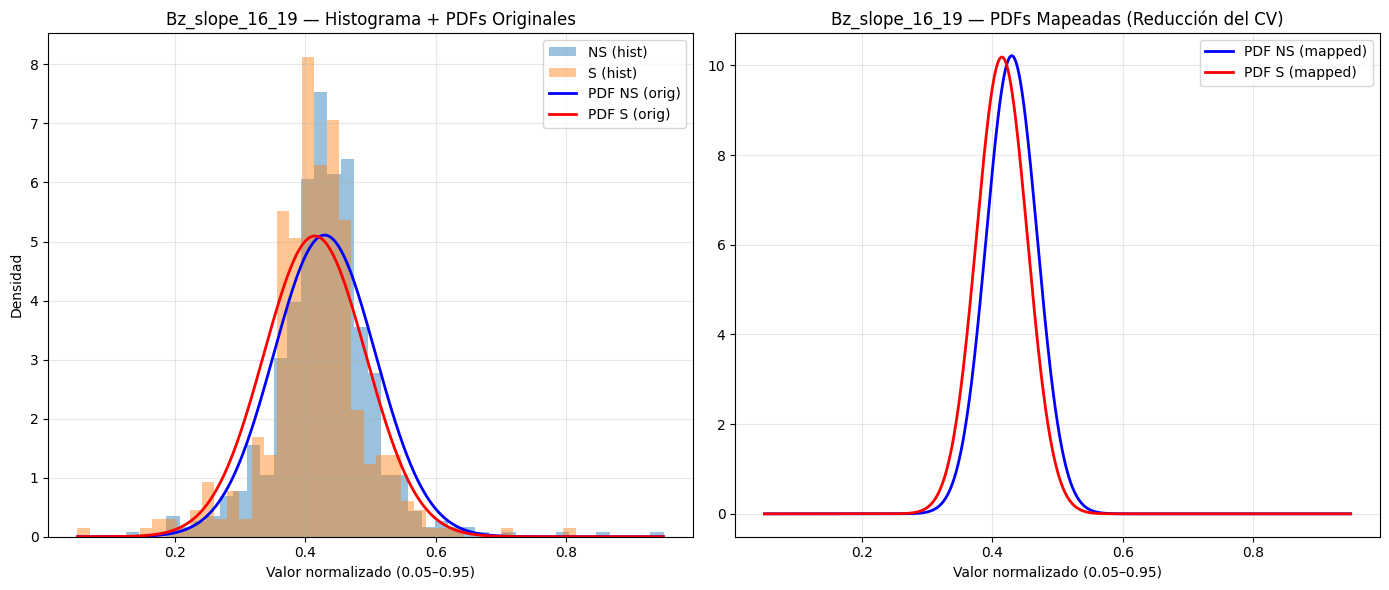

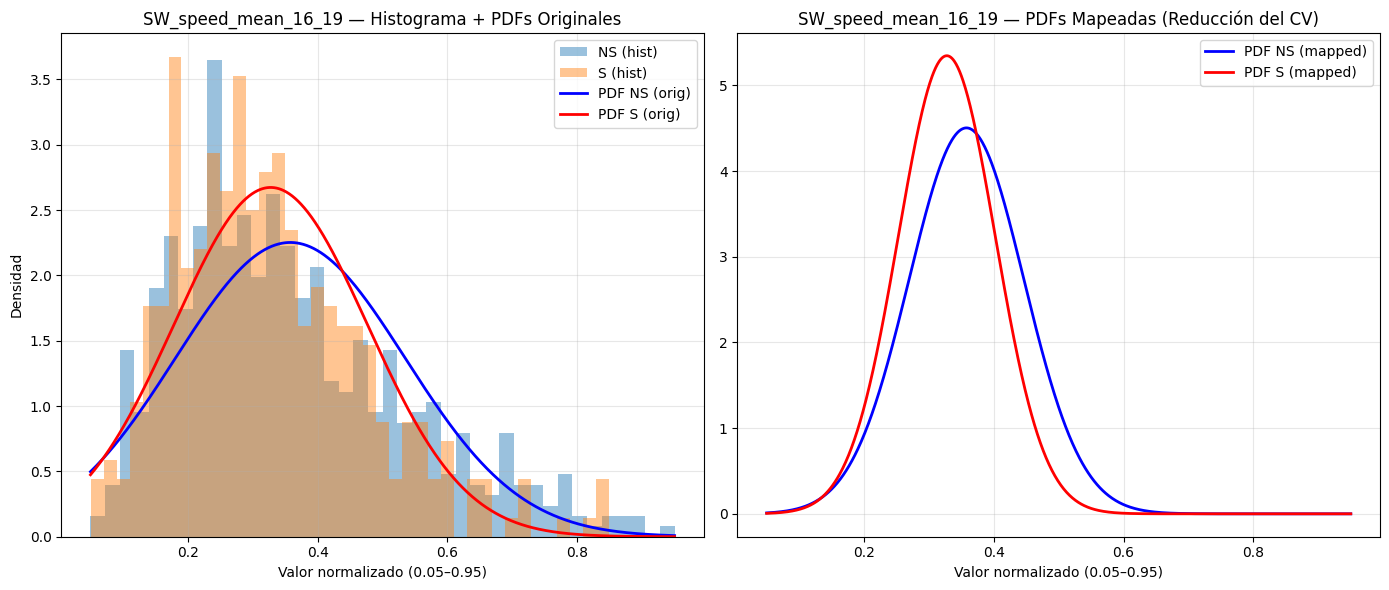

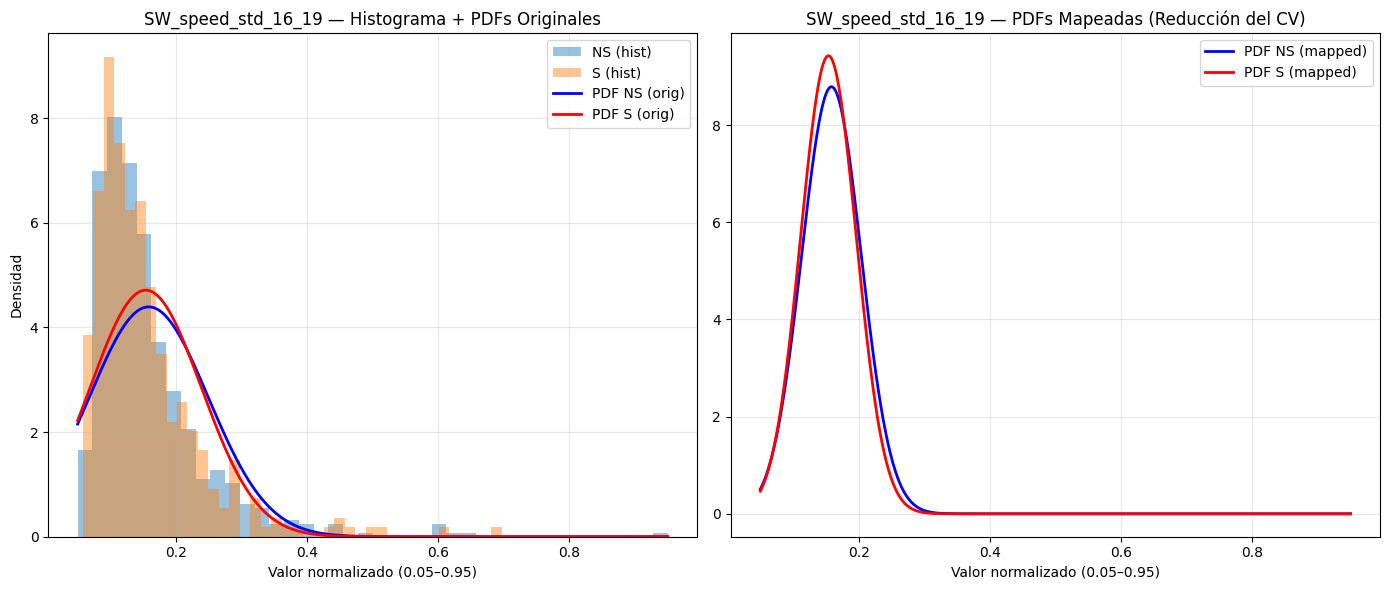

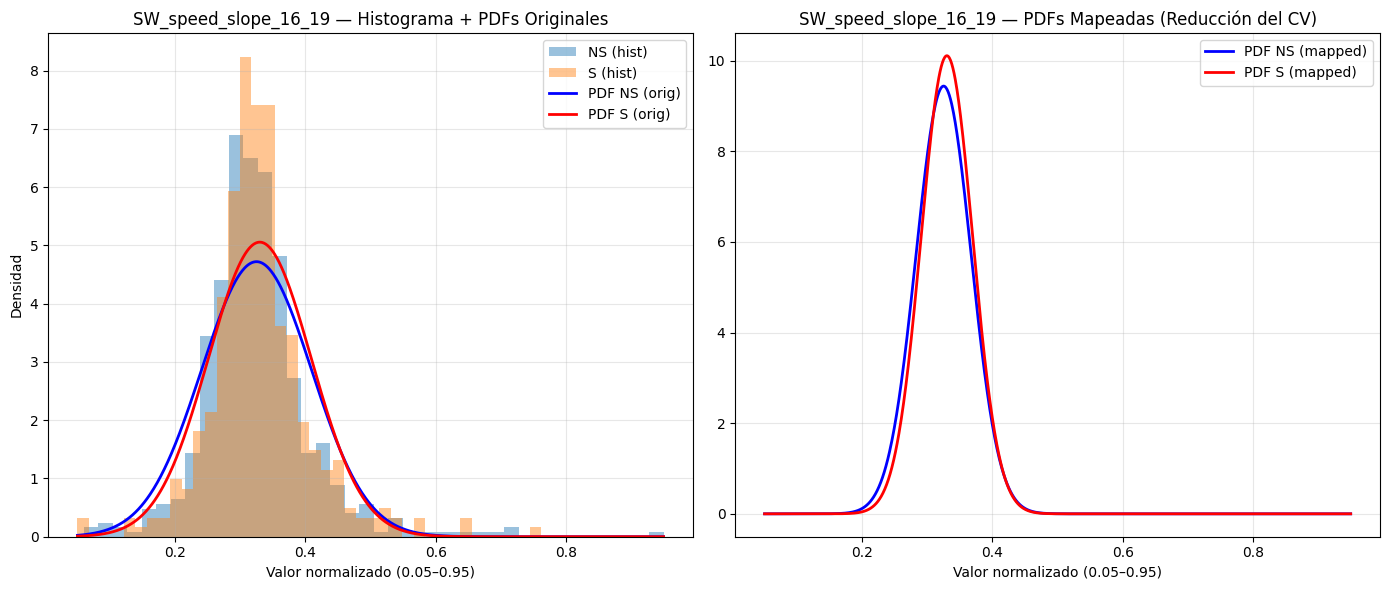

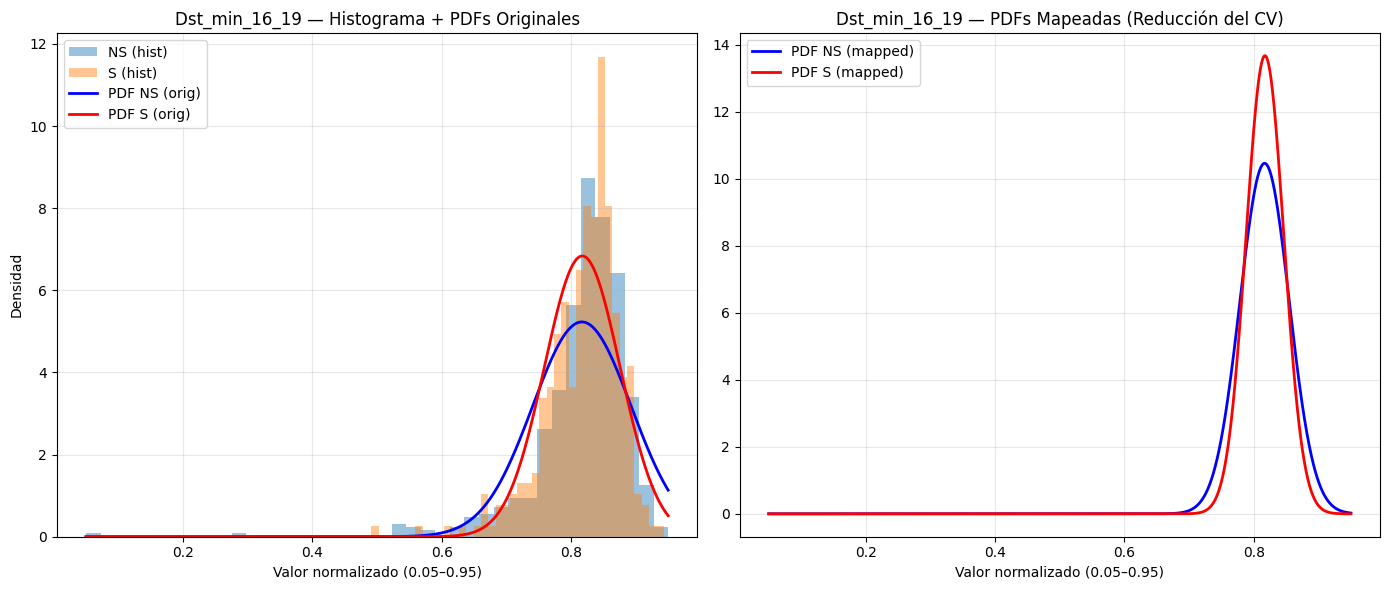

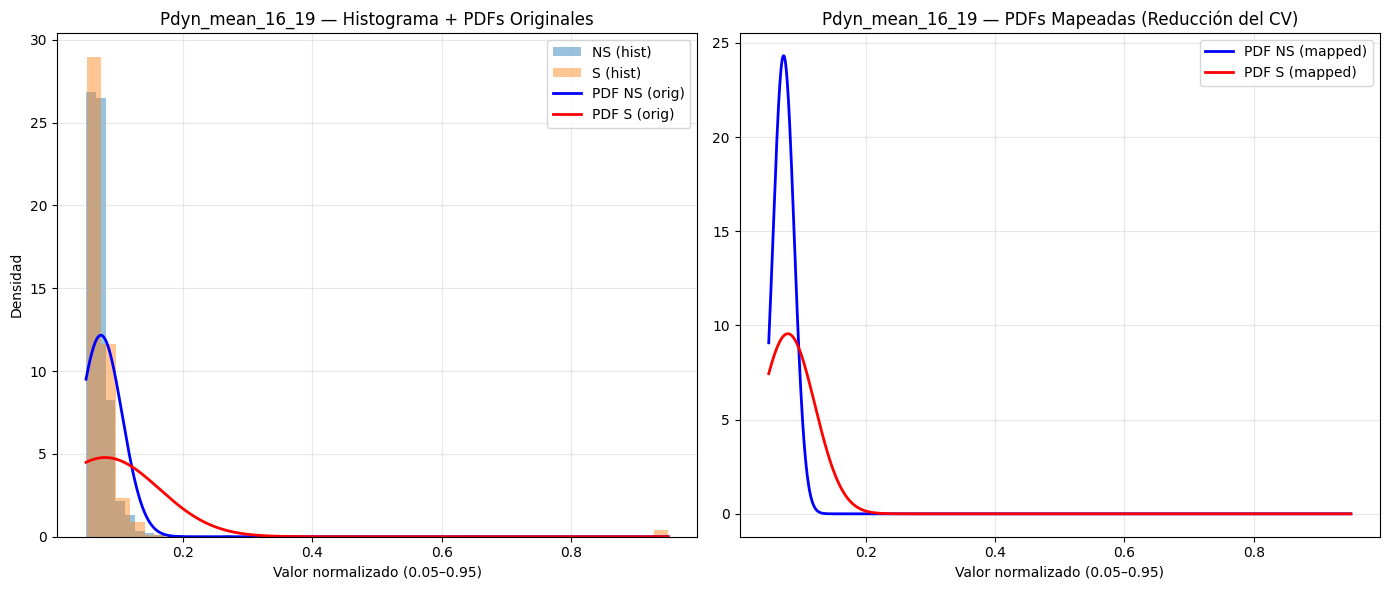

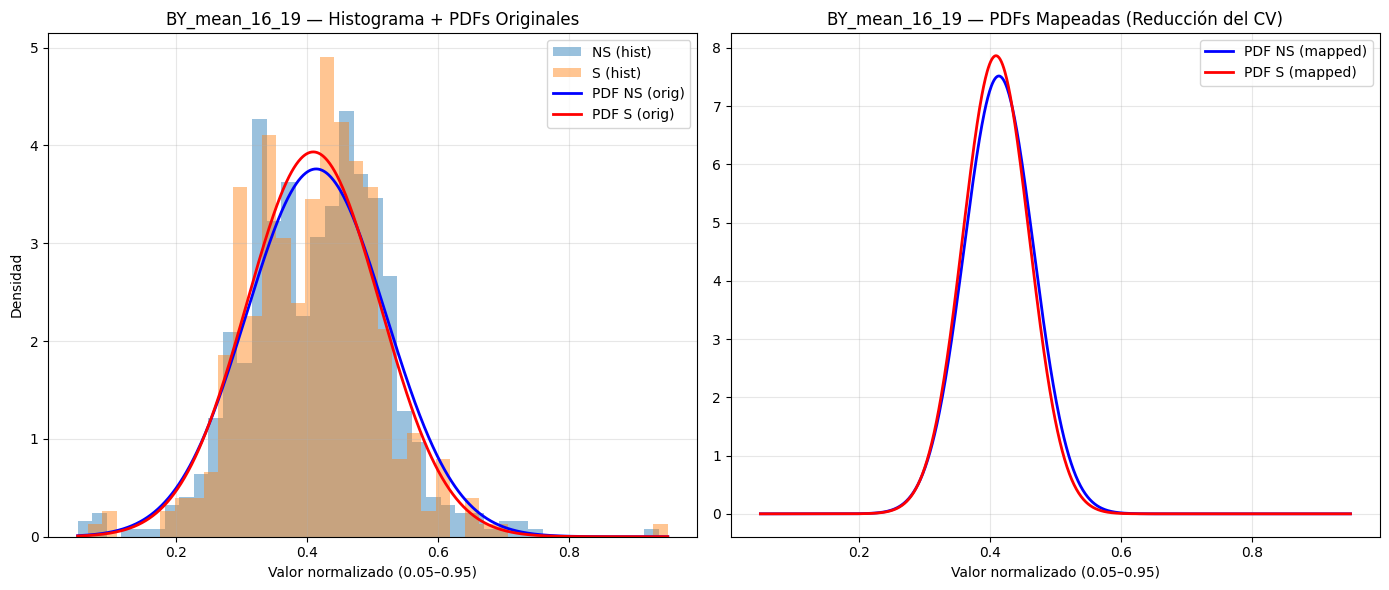

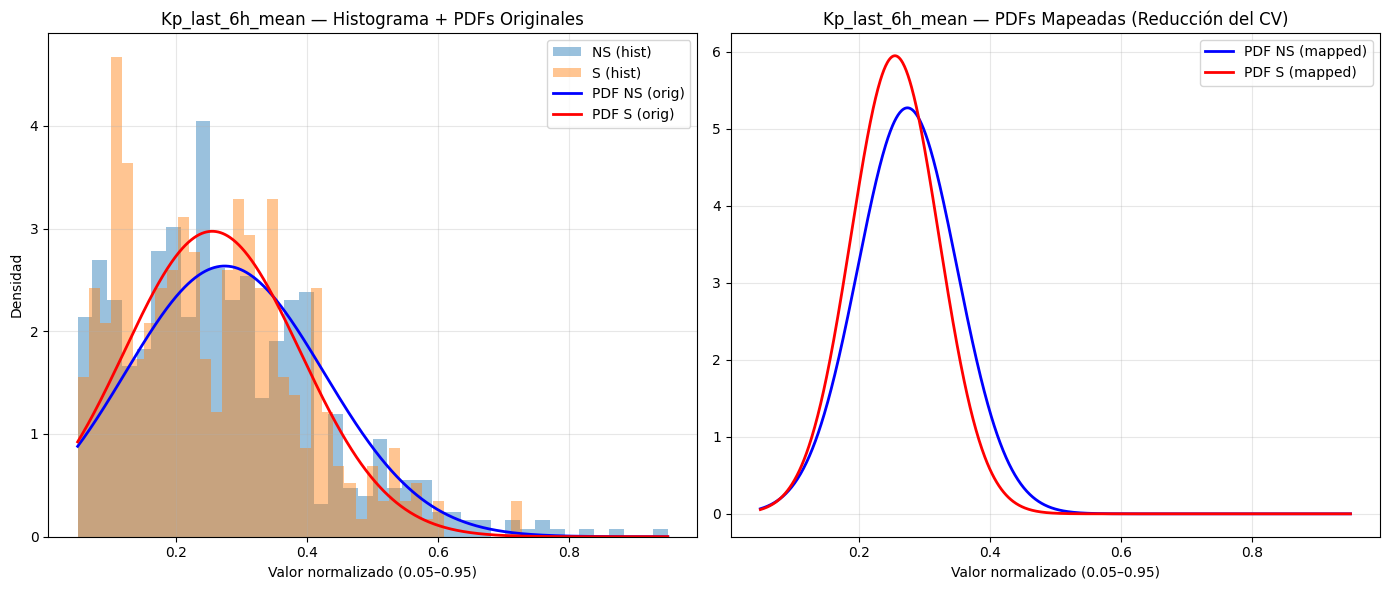

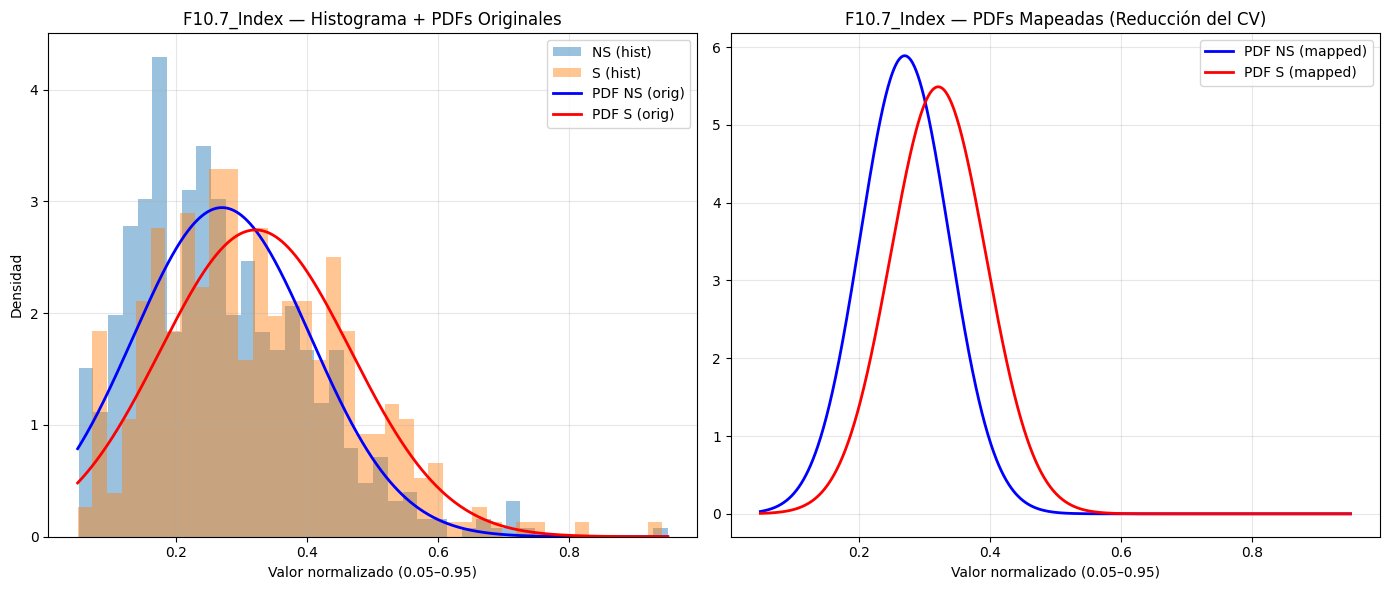

In [ ]:
df_NS = df_ventana1[df_ventana1["TARGET"] == 0].copy()
df_S  = df_ventana1[df_ventana1["TARGET"] == 1].copy()

predictive_attributes = [col for col in df_ventana1.columns if col not in ["TARGET"]]

original_ranges = {
    attr: (df_ventana1[attr].min(), df_ventana1[attr].max())
    for attr in predictive_attributes
}

for attr in predictive_attributes:
    plot_histograma_con_pdfs(attr, df_NS, df_S, original_ranges, info["preprocessor"])


## Modelo MLP

In [ ]:
import numpy as np
import pandas as pd
from typing import List, Tuple, Dict
from collections import defaultdict
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Keras imports (sintaxis clásica)
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Concatenate
from keras.callbacks import LearningRateScheduler
from keras import initializers
from keras import optimizers
import keras.backend as K
import tensorflow as tf

In [ ]:
class DualMLPNeuralNetwork:
    """
    Arquitectura Dual MLP con Keras/TensorFlow (Figura 6 del paper).

    Arquitectura:
    - Subred 1: n_inputs (NS-like) → n_inputs neurons HL1 (sigmoid) → 1 neuron HL2 (sigmoid)
    - Subred 2: n_inputs (S-like) → n_inputs neurons HL1 (sigmoid) → 1 neuron HL2 (sigmoid)
    - Output: Linear combination de ambos HL2 → 1 output (linear, rango [-1, 1])

    Clasificación:
    - output < 0 → clase NS
    - output >= 0 → clase S
    """

    def __init__(self, n_inputs: int = 15, learning_rate_initial: float = 0.01,
                 learning_rate_decay: float = 0.99, max_epochs: int = 2000,
                 random_seed: int = 42):
        """
        Args:
            n_inputs: Número de entradas por subred (default: 15 para tus datos)
            learning_rate_initial: Learning rate inicial
            learning_rate_decay: Factor de decaimiento exponencial del learning rate
            max_epochs: Número máximo de épocas (default: 2000)
            random_seed: Semilla aleatoria
        """
        tf.random.set_seed(random_seed)
        np.random.seed(random_seed)

        self.n_inputs = n_inputs
        self.learning_rate_initial = learning_rate_initial
        self.learning_rate_decay = learning_rate_decay
        self.max_epochs = max_epochs

        # Construir el modelo
        self.model = self._build_model()

        # Historia de entrenamiento
        self.history = None

    def _build_model(self):
        """
        Construye la arquitectura dual usando Keras Functional API.
        """
        # Input para subred NS (NS-like)
        input_ns = Input(shape=(self.n_inputs,), name='input_ns')

        # Subred 1: NS-like
        # HL1: n_inputs → n_inputs neurons (sigmoid)
        hl1_ns = Dense(
            self.n_inputs,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL1_NS'
        )(input_ns)

        # HL2: n_inputs neurons → 1 neuron (sigmoid)
        hl2_ns = Dense(
            1,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL2_NS'
        )(hl1_ns)

        # Input para subred S (S-like)
        input_s = Input(shape=(self.n_inputs,), name='input_s')

        # Subred 2: S-like
        hl1_s = Dense(
            self.n_inputs,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL1_S'
        )(input_s)

        hl2_s = Dense(
            1,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL2_S'
        )(hl1_s)

        # Concatenar outputs
        combined = Concatenate(name='Combine_HL2')([hl2_ns, hl2_s])

        # Output final
        output = Dense(
            1,
            activation='linear',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            use_bias=False,
            name='Output'
        )(combined)

        # Crear modelo final
        model = Model(
            inputs=[input_ns, input_s],
            outputs=output,
            name='Dual_MLP'
        )

        return model

    def _lr_schedule(self, epoch, lr):
        """
        Calcula el learning rate con decaimiento exponencial.

        Args:
            epoch: Época actual
            lr: Learning rate actual (no usado, calculamos desde inicial)

        Returns:
            Nuevo learning rate
        """
        return self.learning_rate_initial * (self.learning_rate_decay ** epoch)

    def train(self, X_ns_train: np.ndarray, X_s_train: np.ndarray, y_train: np.ndarray,
             verbose: int = 1):
        """
        Entrena la red neuronal dual.

        Args:
            X_ns_train: Features NS-like (shape: [n_samples, n_inputs])
            X_s_train: Features S-like (shape: [n_samples, n_inputs])
            y_train: Labels (0 para NS, 1 para S)
            verbose: Nivel de verbosidad (0=silencioso, 1=barra de progreso, 2=una línea por época)
        """
        # Convertir labels: 0 → -1 (NS), 1 → +1 (S)
        y_train_converted = np.where(y_train == 0, -1, 1).astype(np.float32)

        # Compilar modelo
        # MSE como función de pérdida (como en el paper)
        self.model.compile(
            optimizer=optimizers.SGD(learning_rate=self.learning_rate_initial),
            loss='mse',
            metrics=['mse']
        )

        # Callback para decaimiento exponencial del learning rate
        lr_scheduler = LearningRateScheduler(self._lr_schedule, verbose=0)

        print(f"\n{'='*70}")
        print("ENTRENANDO RED NEURONAL DUAL (Keras)")
        print(f"{'='*70}")
        print(f"Muestras de entrenamiento: {len(y_train)}")
        print(f"Épocas máximas: {self.max_epochs}")
        print(f"Learning rate inicial: {self.learning_rate_initial}")
        print(f"Decay: {self.learning_rate_decay}")
        print(f"\nArquitectura del modelo:")
        self.model.summary()

        # Entrenar
        # batch_size=1 para replicar backpropagation después de cada tupla
        self.history = self.model.fit(
            [X_ns_train, X_s_train],
            y_train_converted,
            epochs=self.max_epochs,
            batch_size=1,  # IMPORTANTE: backprop después de cada tupla
            callbacks=[lr_scheduler],
            verbose=verbose,
            shuffle=True
        )

        print(f"\n✓ Entrenamiento completado")
        print(f"  MSE final: {self.history.history['loss'][-1]:.6f}")

    def predict(self, X_ns: np.ndarray, X_s: np.ndarray) -> np.ndarray:
        """
        Predice clases para nuevos datos.

        Output < 0 → NS (clase 0)
        Output >= 0 → S (clase 1)

        Args:
            X_ns: Features NS-like (shape: [n_samples, n_inputs])
            X_s: Features S-like (shape: [n_samples, n_inputs])

        Returns:
            Array con predicciones (0 o 1)
        """
        # Obtener outputs del modelo
        outputs = self.model.predict([X_ns, X_s], verbose=0)

        # Convertir a clases: output < 0 → 0 (NS), output >= 0 → 1 (S)
        predictions = np.where(outputs.flatten() < 0, 0, 1)

        return predictions

    def evaluate(self, X_ns: np.ndarray, X_s: np.ndarray, y_true: np.ndarray) -> dict:
        """
        Evalúa el modelo y retorna métricas de clasificación.

        Args:
            X_ns: Features NS-like
            X_s: Features S-like
            y_true: Labels verdaderos

        Returns:
            Diccionario con métricas
        """
        y_pred = self.predict(X_ns, X_s)

        # Calcular confusion matrix
        tn = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
        fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
        fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
        tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives

        # Métricas
        accuracy = (tp + tn) / len(y_true) if len(y_true) > 0 else 0

        # Calcular MSE para el conjunto
        y_true_converted = np.where(y_true == 0, -1, 1).astype(np.float32)
        mse = self.model.evaluate([X_ns, X_s], y_true_converted, verbose=0)[0]

        metrics = {
            'confusion_matrix': np.array([[tn, fp], [fn, tp]]),
            'accuracy': accuracy,
            'mse': mse,
            'true_negatives': tn,
            'false_positives': fp,
            'false_negatives': fn,
            'true_positives': tp
        }

        return metrics

    def plot_learning_curve(self):
        """
        Grafica la curva de aprendizaje (MSE vs Época) como en Figura 7 del paper.
        """
        if self.history is None:
            print("Error: El modelo no ha sido entrenado aún.")
            return

        import matplotlib.pyplot as plt

        plt.figure(figsize=(10, 6))
        plt.plot(self.history.history['loss'], 'b-', linewidth=2)
        plt.xlabel('Época', fontsize=12)
        plt.ylabel('Mean Squared Error', fontsize=12)
        plt.title('Curva de Aprendizaje (Figura 7 del paper)', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


def print_confusion_matrix(cm: np.ndarray, phase: str = ""):
    """
    Imprime la confusion matrix en formato de tabla (Tabla 2 del paper).

    Args:
        cm: Confusion matrix (2x2)
        phase: Nombre de la fase (Train/Test)
    """
    print(f"\n{phase} Confusion Matrix:")
    print(f"{'':>15} | {'Actual NS':>12} | {'Actual S':>12}")
    print(f"{'-'*15}-+-{'-'*12}-+-{'-'*12}")
    print(f"{'Predicted NS':>15} | {cm[0,0]:>12.1f} | {cm[0,1]:>12.1f}")
    print(f"{'Predicted S':>15} | {cm[1,0]:>12.1f} | {cm[1,1]:>12.1f}")


def tenfold_cross_validation(df_ventana1: pd.DataFrame,
                             n_subbands: int = 16,
                             reduction_factor: float = 0.5,
                             max_epochs: int = 2000,
                             learning_rate: float = 0.01,
                             learning_rate_decay: float = 0.99,
                             random_seed: int = 42,
                             verbose: int = 0) -> dict:
    """
    Implementa el método de 10-fold cross-validation descrito en el paper.

    Como describe el paper en la Sección 4:
    - El resampling se aplica SOLO a los datos de entrenamiento en cada fold
    - El conjunto de test NO tiene resampling
    - Se promedian los resultados de los 10 folds

    Args:
        df_ventana1: DataFrame original
        n_subbands: Número de subbandas
        reduction_factor: Factor de reducción del CV
        max_epochs: Épocas máximas de entrenamiento
        learning_rate: Learning rate inicial
        learning_rate_decay: Decay del learning rate
        random_seed: Semilla aleatoria
        verbose: Nivel de verbosidad del entrenamiento (0=silencioso, 1=barra, 2=detallado)

    Returns:
        Diccionario con resultados promediados
    """
    np.random.seed(random_seed)

    predictive_attributes = [
        'Mh_PRECURSOR', 'Mv_PRECURSOR', 'F_DENSITY', 'Delta_foF2_1',
        'foF2_drop_SW', 'Bz_mean_16_19', 'Bz_slope_16_19', 'SW_speed_mean_16_19',
        'SW_speed_std_16_19', 'SW_speed_slope_16_19', 'Dst_min_16_19',
        'Pdyn_mean_16_19', 'BY_mean_16_19', 'Kp_last_6h_mean', 'F10.7_Index'
    ]

    print("="*70)
    print("10-FOLD CROSS-VALIDATION CON KERAS")
    print("="*70)

    # Separar clases
    df_ns = df_ventana1[df_ventana1['TARGET'] == 0].copy()
    df_s = df_ventana1[df_ventana1['TARGET'] == 1].copy()

    print(f"\nDataset original:")
    print(f"  - NS: {len(df_ns)} tuplas")
    print(f"  - S: {len(df_s)} tuplas")

    # K-Fold
    kf = KFold(n_splits=10, shuffle=True, random_state=random_seed)

    # Almacenar resultados de cada fold
    fold_results = {
        'train_cm': [],
        'test_cm': [],
        'train_acc': [],
        'test_acc': []
    }

    fold_num = 1
    for (train_idx_ns, test_idx_ns), (train_idx_s, test_idx_s) in zip(
        kf.split(df_ns), kf.split(df_s)
    ):
        print(f"\n{'='*70}")
        print(f"FOLD {fold_num}/10")
        print(f"{'='*70}")

        # Dividir datos
        train_ns = df_ns.iloc[train_idx_ns]
        test_ns = df_ns.iloc[test_idx_ns]
        train_s = df_s.iloc[train_idx_s]
        test_s = df_s.iloc[test_idx_s]

        print(f"Train: NS={len(train_ns)}, S={len(train_s)}")
        print(f"Test: NS={len(test_ns)}, S={len(test_s)}")

        # RESAMPLING solo en train
        resampler = ScintillationResampler(n_subbands=n_subbands)
        train_s_resampled = resampler.resample_class_s(
            train_ns, train_s, predictive_attributes, 'TARGET'
        )

        # Crear conjunto balanceado
        train_balanced = pd.concat([train_ns, train_s_resampled], ignore_index=True)
        train_balanced = train_balanced.sample(frac=1, random_state=random_seed).reset_index(drop=True)

        # PREPROCESSING
        preprocessor = PreprocessingTransformer(normalization_range=(0.05, 0.95))
        preprocessor.fit_normal_pdfs(train_ns, train_s, predictive_attributes)

        train_transformed = preprocessor.transform(train_balanced, predictive_attributes, reduction_factor)
        test_balanced = pd.concat([test_ns, test_s], ignore_index=True)
        test_transformed = preprocessor.transform(test_balanced, predictive_attributes, reduction_factor)

        # Extraer features
        dual_attrs_ns = [f'{attr}_NS' for attr in predictive_attributes]
        dual_attrs_s = [f'{attr}_S' for attr in predictive_attributes]

        X_train_ns = train_transformed[dual_attrs_ns].values
        X_train_s = train_transformed[dual_attrs_s].values
        y_train = train_transformed['TARGET'].values

        X_test_ns = test_transformed[dual_attrs_ns].values
        X_test_s = test_transformed[dual_attrs_s].values
        y_test = test_transformed['TARGET'].values

        # ENTRENAR RED NEURONAL
        model = DualMLPNeuralNetwork(
            n_inputs=len(predictive_attributes),
            learning_rate_initial=learning_rate,
            learning_rate_decay=learning_rate_decay,
            max_epochs=max_epochs,
            random_seed=random_seed + fold_num
        )

        model.train(X_train_ns, X_train_s, y_train, verbose=verbose)

        # EVALUAR
        train_metrics = model.evaluate(X_train_ns, X_train_s, y_train)
        test_metrics = model.evaluate(X_test_ns, X_test_s, y_test)

        print_confusion_matrix(train_metrics['confusion_matrix'], "TRAIN")
        print(f"  Accuracy: {train_metrics['accuracy']:.4f}")

        print_confusion_matrix(test_metrics['confusion_matrix'], "TEST")
        print(f"  Accuracy: {test_metrics['accuracy']:.4f}")

        # Guardar resultados
        fold_results['train_cm'].append(train_metrics['confusion_matrix'])
        fold_results['test_cm'].append(test_metrics['confusion_matrix'])
        fold_results['train_acc'].append(train_metrics['accuracy'])
        fold_results['test_acc'].append(test_metrics['accuracy'])

        fold_num += 1

    # PROMEDIAR RESULTADOS
    avg_train_cm = np.mean(fold_results['train_cm'], axis=0)
    avg_test_cm = np.mean(fold_results['test_cm'], axis=0)
    avg_train_acc = np.mean(fold_results['train_acc'])
    avg_test_acc = np.mean(fold_results['test_acc'])

    print(f"\n{'='*70}")
    print("RESULTADOS PROMEDIADOS (10 FOLDS) - Tabla 2 del paper")
    print(f"{'='*70}")

    print_confusion_matrix(avg_train_cm, "TRAIN (Promedio)")
    print(f"  Accuracy: {avg_train_acc:.4f}")

    print_confusion_matrix(avg_test_cm, "TEST (Promedio)")
    print(f"  Accuracy: {avg_test_acc:.4f}")

    print(f"\n{'='*70}")
    print("COMPARACIÓN CON RESULTADOS DEL PAPER")
    print(f"{'='*70}")
    print(f"Paper - Train Accuracy: 1.00 (100%)")
    print(f"Actual - Train Accuracy: {avg_train_acc:.4f} ({avg_train_acc*100:.2f}%)")
    print(f"\nPaper - Test Accuracy: 0.97 (97%)")
    print(f"Actual - Test Accuracy: {avg_test_acc:.4f} ({avg_test_acc*100:.2f}%)")

    results = {
        'avg_train_cm': avg_train_cm,
        'avg_test_cm': avg_test_cm,
        'avg_train_accuracy': avg_train_acc,
        'avg_test_accuracy': avg_test_acc,
        'fold_results': fold_results
    }

    return results

# clude backup

In [ ]:
class DualMLPNeuralNetwork:
    """
    Arquitectura Dual MLP con Keras/TensorFlow (Figura 6 del paper).

    Arquitectura:
    - Subred 1: n_inputs (NS-like) → n_inputs neurons HL1 (sigmoid) → 1 neuron HL2 (sigmoid)
    - Subred 2: n_inputs (S-like) → n_inputs neurons HL1 (sigmoid) → 1 neuron HL2 (sigmoid)
    - Output: Linear combination de ambos HL2 → 1 output (linear, rango [-1, 1])

    Clasificación:
    - output < 0 → clase NS
    - output >= 0 → clase S
    """

    def __init__(self, n_inputs: int = 15, learning_rate_initial: float = 0.01,
                 learning_rate_decay: float = 0.99, max_epochs: int = 2000,
                 random_seed: int = 42):
        """
        Args:
            n_inputs: Número de entradas por subred (default: 15 para tus datos)
            learning_rate_initial: Learning rate inicial
            learning_rate_decay: Factor de decaimiento exponencial del learning rate
            max_epochs: Número máximo de épocas (default: 2000)
            random_seed: Semilla aleatoria
        """
        tf.random.set_seed(random_seed)
        np.random.seed(random_seed)

        self.n_inputs = n_inputs
        self.learning_rate_initial = learning_rate_initial
        self.learning_rate_decay = learning_rate_decay
        self.max_epochs = max_epochs

        # Construir el modelo
        self.model = self._build_model()

        # Historia de entrenamiento
        self.history = None

    def _build_model(self):
        """
        Construye la arquitectura dual usando Keras Functional API.
        """
        # Input para subred NS (NS-like)
        """
        input_ns = layers.Input(shape=(self.n_inputs,), name='input_ns')
        """
        input_ns = Input(shape=(self.n_inputs,), name='input_ns')

        """
        # Subred 1: NS-like
        # hL1: n_inputs → n_inputs neurons (sigmoid)
        hl1_ns = layers.Dense(
            self.n_inputs,
            activation='sigmoid',
            kernel_initializer=keras.initializers.RandomNormal(stddev=0.1),
            bias_initializer=keras.initializers.RandomNormal(stddev=0.1),
            name='HL1_NS'
        )(input_ns)
        """

        # Subred 1: NS-like
        # HL1: n_inputs → n_inputs neurons (sigmoid)
        hl1_ns = Dense(
            self.n_inputs,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL1_NS'
        )(input_ns)

        """
        # HL2: n_inputs neurons → 1 neuron (sigmoid)
        hl2_ns = layers.Dense(
            1,
            activation='sigmoid',
            kernel_initializer=keras.initializers.RandomNormal(stddev=0.1),
            bias_initializer=keras.initializers.RandomNormal(stddev=0.1),
            name='HL2_NS'
        )(hl1_ns)
        """"
        # HL2: n_inputs neurons → 1 neuron (sigmoid)
        hl2_ns = Dense(
            1,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL2_NS'
        )(hl1_ns)

        """
        # Input para subred S (S-like)
        input_s = layers.Input(shape=(self.n_inputs,), name='input_s')
        """
        # Input para subred S (S-like)
        input_s = Input(shape=(self.n_inputs,), name='input_s')

        """
        # Subred 2: S-like
        # HL1: n_inputs → n_inputs neurons (sigmoid)
        hl1_s = layers.Dense(
            self.n_inputs,
            activation='sigmoid',
            kernel_initializer=keras.initializers.RandomNormal(stddev=0.1),
            bias_initializer=keras.initializers.RandomNormal(stddev=0.1),
            name='HL1_S'
        )(input_s)
        """
        # Subred 2: S-like
        hl1_s = Dense(
            self.n_inputs,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL1_S'
        )(input_s)
        """
        # HL2: n_inputs neurons → 1 neuron (sigmoid)
        hl2_s = layers.Dense(
            1,
            activation='sigmoid',
            kernel_initializer=keras.initializers.RandomNormal(stddev=0.1),
            bias_initializer=keras.initializers.RandomNormal(stddev=0.1),
            name='HL2_S'
        )(hl1_s)
        """
        hl2_s = Dense(
            1,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL2_S'
        )(hl1_s)

        """
        # Concatenar ambos outputs de HL2
        combined = layers.Concatenate(name='Combine_HL2')([hl2_ns, hl2_s])
        """
        # Concatenar outputs
        combined = Concatenate(name='Combine_HL2')([hl2_ns, hl2_s])

        """
        # Output layer: Linear combination
        # Rango [-1, 1]: negativo = NS, positivo = S
        output = layers.Dense(
            1,
            activation='linear',
            kernel_initializer=keras.initializers.RandomNormal(stddev=0.1),
            bias_initializer=keras.initializers.RandomNormal(stddev=0.1),
            name='Output'
        )(combined)
        """
        # Output final
        output = Dense(
            1,
            activation='linear',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='Output'
        )(combined)

        # Crear modelo final
        model = Model(
            inputs=[input_ns, input_s],
            outputs=output,
            name='Dual_MLP'
        )

        return model

    def _lr_schedule(self, epoch, lr):
        """
        Calcula el learning rate con decaimiento exponencial.

        Args:
            epoch: Época actual
            lr: Learning rate actual (no usado, calculamos desde inicial)

        Returns:
            Nuevo learning rate
        """
        return self.learning_rate_initial * (self.learning_rate_decay ** epoch)

    def train(self, X_ns_train: np.ndarray, X_s_train: np.ndarray, y_train: np.ndarray,
             verbose: int = 1):
        """
        Entrena la red neuronal dual.

        Args:
            X_ns_train: Features NS-like (shape: [n_samples, n_inputs])
            X_s_train: Features S-like (shape: [n_samples, n_inputs])
            y_train: Labels (0 para NS, 1 para S)
            verbose: Nivel de verbosidad (0=silencioso, 1=barra de progreso, 2=una línea por época)
        """
        # Convertir labels: 0 → -1 (NS), 1 → +1 (S)
        y_train_converted = np.where(y_train == 0, -1, 1).astype(np.float32)

        # Compilar modelo
        # MSE como función de pérdida (como en el paper)
        self.model.compile(
            optimizer=keras.optimizers.SGD(learning_rate=self.learning_rate_initial),
            loss='mse',
            metrics=['mse']
        )

        # Callback para decaimiento exponencial del learning rate
        lr_scheduler = LearningRateScheduler(self._lr_schedule, verbose=0)

        print(f"\n{'='*70}")
        print("ENTRENANDO RED NEURONAL DUAL (Keras)")
        print(f"{'='*70}")
        print(f"Muestras de entrenamiento: {len(y_train)}")
        print(f"Épocas máximas: {self.max_epochs}")
        print(f"Learning rate inicial: {self.learning_rate_initial}")
        print(f"Decay: {self.learning_rate_decay}")
        print(f"\nArquitectura del modelo:")
        self.model.summary()

        # Entrenar
        # batch_size=1 para replicar backpropagation después de cada tupla
        self.history = self.model.fit(
            [X_ns_train, X_s_train],
            y_train_converted,
            epochs=self.max_epochs,
            batch_size=1,  # IMPORTANTE: backprop después de cada tupla
            callbacks=[lr_scheduler],
            verbose=verbose,
            shuffle=True
        )

        print(f"\n✓ Entrenamiento completado")
        print(f"  MSE final: {self.history.history['loss'][-1]:.6f}")

    def predict(self, X_ns: np.ndarray, X_s: np.ndarray) -> np.ndarray:
        """
        Predice clases para nuevos datos.

        Output < 0 → NS (clase 0)
        Output >= 0 → S (clase 1)

        Args:
            X_ns: Features NS-like (shape: [n_samples, n_inputs])
            X_s: Features S-like (shape: [n_samples, n_inputs])

        Returns:
            Array con predicciones (0 o 1)
        """
        # Obtener outputs del modelo
        outputs = self.model.predict([X_ns, X_s], verbose=0)

        # Convertir a clases: output < 0 → 0 (NS), output >= 0 → 1 (S)
        predictions = np.where(outputs.flatten() < 0, 0, 1)

        return predictions

    def evaluate(self, X_ns: np.ndarray, X_s: np.ndarray, y_true: np.ndarray) -> dict:
        """
        Evalúa el modelo y retorna métricas de clasificación.

        Args:
            X_ns: Features NS-like
            X_s: Features S-like
            y_true: Labels verdaderos

        Returns:
            Diccionario con métricas
        """
        y_pred = self.predict(X_ns, X_s)

        # Calcular confusion matrix
        tn = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
        fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
        fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
        tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives

        # Métricas
        accuracy = (tp + tn) / len(y_true) if len(y_true) > 0 else 0

        # Calcular MSE para el conjunto
        y_true_converted = np.where(y_true == 0, -1, 1).astype(np.float32)
        mse = self.model.evaluate([X_ns, X_s], y_true_converted, verbose=0)[0]

        metrics = {
            'confusion_matrix': np.array([[tn, fn], [fp, tp]]),
            'accuracy': accuracy,
            'mse': mse,
            'true_negatives': tn,
            'false_positives': fp,
            'false_negatives': fn,
            'true_positives': tp
        }

        return metrics

    def plot_learning_curve(self):
        """
        Grafica la curva de aprendizaje (MSE vs Época) como en Figura 7 del paper.
        """
        if self.history is None:
            print("Error: El modelo no ha sido entrenado aún.")
            return

        import matplotlib.pyplot as plt

        plt.figure(figsize=(10, 6))
        plt.plot(self.history.history['loss'], 'b-', linewidth=2)
        plt.xlabel('Época', fontsize=12)
        plt.ylabel('Mean Squared Error', fontsize=12)
        plt.title('Curva de Aprendizaje (Figura 7 del paper)', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


def print_confusion_matrix(cm: np.ndarray, phase: str = ""):
    """
    Imprime la confusion matrix en formato de tabla (Tabla 2 del paper).

    Args:
        cm: Confusion matrix (2x2)
        phase: Nombre de la fase (Train/Test)
    """
    print(f"\n{phase} Confusion Matrix:")
    print(f"{'':>15} | {'Actual NS':>12} | {'Actual S':>12}")
    print(f"{'-'*15}-+-{'-'*12}-+-{'-'*12}")
    print(f"{'Predicted NS':>15} | {cm[0,0]:>12.1f} | {cm[0,1]:>12.1f}")
    print(f"{'Predicted S':>15} | {cm[1,0]:>12.1f} | {cm[1,1]:>12.1f}")


def tenfold_cross_validation(df_ventana1: pd.DataFrame,
                             n_subbands: int = 16,
                             reduction_factor: float = 0.5,
                             max_epochs: int = 2000,
                             learning_rate: float = 0.01,
                             learning_rate_decay: float = 0.99,
                             random_seed: int = 42,
                             verbose: int = 0) -> dict:
    """
    Implementa el método de 10-fold cross-validation descrito en el paper.

    Como describe el paper en la Sección 4:
    - El resampling se aplica SOLO a los datos de entrenamiento en cada fold
    - El conjunto de test NO tiene resampling
    - Se promedian los resultados de los 10 folds

    Args:
        df_ventana1: DataFrame original
        n_subbands: Número de subbandas
        reduction_factor: Factor de reducción del CV
        max_epochs: Épocas máximas de entrenamiento
        learning_rate: Learning rate inicial
        learning_rate_decay: Decay del learning rate
        random_seed: Semilla aleatoria
        verbose: Nivel de verbosidad del entrenamiento (0=silencioso, 1=barra, 2=detallado)

    Returns:
        Diccionario con resultados promediados
    """
    np.random.seed(random_seed)

    predictive_attributes = [
        'Mh_PRECURSOR', 'Mv_PRECURSOR', 'F_DENSITY', 'Delta_foF2_1',
        'foF2_drop_SW', 'E_mean_16_19', 'E_slope_16_19', 'SW_speed_mean_16_19',
        'SW_speed_std_16_19', 'SW_speed_slope_16_19', 'Dst_min_16_19',
        'Pdyn_mean_16_19', 'BY_mean_16_19', 'Kp_last_6h_mean', 'F10.7_Index'
    ]

    print("="*70)
    print("10-FOLD CROSS-VALIDATION CON KERAS")
    print("="*70)

    # Separar clases
    df_ns = df_ventana1[df_ventana1['TARGET'] == 0].copy()
    df_s = df_ventana1[df_ventana1['TARGET'] == 1].copy()

    print(f"\nDataset original:")
    print(f"  - NS: {len(df_ns)} tuplas")
    print(f"  - S: {len(df_s)} tuplas")

    # K-Fold
    kf = KFold(n_splits=10, shuffle=True, random_state=random_seed)

    # Almacenar resultados de cada fold
    fold_results = {
        'train_cm': [],
        'test_cm': [],
        'train_acc': [],
        'test_acc': []
    }

    fold_num = 1
    for (train_idx_ns, test_idx_ns), (train_idx_s, test_idx_s) in zip(
        kf.split(df_ns), kf.split(df_s)
    ):
        print(f"\n{'='*70}")
        print(f"FOLD {fold_num}/10")
        print(f"{'='*70}")

        # Dividir datos
        train_ns = df_ns.iloc[train_idx_ns]
        test_ns = df_ns.iloc[test_idx_ns]
        train_s = df_s.iloc[train_idx_s]
        test_s = df_s.iloc[test_idx_s]

        print(f"Train: NS={len(train_ns)}, S={len(train_s)}")
        print(f"Test: NS={len(test_ns)}, S={len(test_s)}")

        # RESAMPLING solo en train
        resampler = ScintillationResampler(n_subbands=n_subbands)
        train_s_resampled = resampler.resample_class_s(
            train_ns, train_s, predictive_attributes, 'TARGET'
        )

        # Crear conjunto balanceado
        train_balanced = pd.concat([train_ns, train_s_resampled], ignore_index=True)
        train_balanced = train_balanced.sample(frac=1, random_state=random_seed).reset_index(drop=True)

        # PREPROCESSING
        preprocessor = PreprocessingTransformer(normalization_range=(0.05, 0.95))
        preprocessor.fit_normal_pdfs(train_ns, train_s, predictive_attributes)

        train_transformed = preprocessor.transform(train_balanced, predictive_attributes, reduction_factor)
        test_balanced = pd.concat([test_ns, test_s], ignore_index=True)
        test_transformed = preprocessor.transform(test_balanced, predictive_attributes, reduction_factor)

        # Extraer features
        dual_attrs_ns = [f'{attr}_NS' for attr in predictive_attributes]
        dual_attrs_s = [f'{attr}_S' for attr in predictive_attributes]

        X_train_ns = train_transformed[dual_attrs_ns].values
        X_train_s = train_transformed[dual_attrs_s].values
        y_train = train_transformed['TARGET'].values

        X_test_ns = test_transformed[dual_attrs_ns].values
        X_test_s = test_transformed[dual_attrs_s].values
        y_test = test_transformed['TARGET'].values

        # ENTRENAR RED NEURONAL
        model = DualMLPNeuralNetwork(
            n_inputs=len(predictive_attributes),
            learning_rate_initial=learning_rate,
            learning_rate_decay=learning_rate_decay,
            max_epochs=max_epochs,
            random_seed=random_seed + fold_num
        )

        model.train(X_train_ns, X_train_s, y_train, verbose=verbose)

        # EVALUAR
        train_metrics = model.evaluate(X_train_ns, X_train_s, y_train)
        test_metrics = model.evaluate(X_test_ns, X_test_s, y_test)

        print_confusion_matrix(train_metrics['confusion_matrix'], "TRAIN")
        print(f"  Accuracy: {train_metrics['accuracy']:.4f}")

        print_confusion_matrix(test_metrics['confusion_matrix'], "TEST")
        print(f"  Accuracy: {test_metrics['accuracy']:.4f}")

        # Guardar resultados
        fold_results['train_cm'].append(train_metrics['confusion_matrix'])
        fold_results['test_cm'].append(test_metrics['confusion_matrix'])
        fold_results['train_acc'].append(train_metrics['accuracy'])
        fold_results['test_acc'].append(test_metrics['accuracy'])

        fold_num += 1

    # PROMEDIAR RESULTADOS
    avg_train_cm = np.mean(fold_results['train_cm'], axis=0)
    avg_test_cm = np.mean(fold_results['test_cm'], axis=0)
    avg_train_acc = np.mean(fold_results['train_acc'])
    avg_test_acc = np.mean(fold_results['test_acc'])

    print(f"\n{'='*70}")
    print("RESULTADOS PROMEDIADOS (10 FOLDS) - Tabla 2 del paper")
    print(f"{'='*70}")

    print_confusion_matrix(avg_train_cm, "TRAIN (Promedio)")
    print(f"  Accuracy: {avg_train_acc:.4f}")

    print_confusion_matrix(avg_test_cm, "TEST (Promedio)")
    print(f"  Accuracy: {avg_test_acc:.4f}")

    print(f"\n{'='*70}")
    print("COMPARACIÓN CON RESULTADOS DEL PAPER")
    print(f"{'='*70}")
    print(f"Paper - Train Accuracy: 1.00 (100%)")
    print(f"Actual - Train Accuracy: {avg_train_acc:.4f} ({avg_train_acc*100:.2f}%)")
    print(f"\nPaper - Test Accuracy: 0.97 (97%)")
    print(f"Actual - Test Accuracy: {avg_test_acc:.4f} ({avg_test_acc*100:.2f}%)")

    results = {
        'avg_train_cm': avg_train_cm,
        'avg_test_cm': avg_test_cm,
        'avg_train_accuracy': avg_train_acc,
        'avg_test_accuracy': avg_test_acc,
        'fold_results': fold_results
    }

    return results

# xdd

In [ ]:
import numpy as np
import pandas as pd
from typing import List, Tuple, Dict
from collections import defaultdict
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Keras imports (sintaxis clásica)
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Concatenate
from keras.callbacks import LearningRateScheduler
from keras import initializers
from keras import optimizers
import keras.backend as K
import tensorflow as tf

class ScintillationResampler:
    """
    Implementación del procedimiento de resampling descrito en:
    Lima et al. (2015) - Prediction of ionospheric scintillation using neural networks

    Adaptado para trabajar con df_ventana1 y TARGET (0=NS, 1=S)
    """

    def __init__(self, n_subbands: int = 16):
        """
        Args:
            n_subbands: Número de subbandas para discretización (default: 16)
        """
        self.n_subbands = n_subbands
        self.subbands = {}  # Almacena las subbandas para cada atributo

    def classify_tuples(self, data: pd.DataFrame, target_column: str = 'TARGET') -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Clasifica tuplas en NS (TARGET=0) y S (TARGET=1).
        """
        data_ns = data[data[target_column] == 0].copy()
        data_s = data[data[target_column] == 1].copy()

        print(f"Clasificación inicial:")
        print(f"  - Tuplas NS (TARGET = 0): {len(data_ns)}")
        print(f"  - Tuplas S (TARGET = 1): {len(data_s)}")
        print(f"  - Ratio NS/S: {len(data_ns)/len(data_s):.2f}:1")

        return data_ns, data_s

    def create_subbands(self, values: np.ndarray, attribute_name: str) -> List[Tuple[float, float]]:
        """
        Paso 1: Crea 16 subbandas usando un esquema de promediado iterativo.
        IMPLEMENTACIÓN EXACTA según Lima and Stephany (2013b).
        """
        sorted_values = np.sort(values)
        n_values = len(sorted_values)

        bounds = [sorted_values[0]]  # Comienza con el mínimo

        for i in range(1, self.n_subbands):
            idx = int((i / self.n_subbands) * n_values)
            idx = min(idx, n_values - 1)

            window_size = max(1, n_values // (self.n_subbands * 2))
            start_idx = max(0, idx - window_size)
            end_idx = min(n_values, idx + window_size + 1)

            bound_value = np.mean(sorted_values[start_idx:end_idx])
            bounds.append(bound_value)

        bounds.append(sorted_values[-1])  # Agrega el máximo

        subbands = []
        for i in range(self.n_subbands):
            lower = bounds[i]
            upper = bounds[i + 1]
            subbands.append((lower, upper))

        self.subbands[attribute_name] = subbands
        return subbands

    def map_to_subband(self, value: float, attribute_name: str) -> int:
        """
        Paso 2: Mapea un valor a su subbanda correspondiente.
        """
        subbands = self.subbands[attribute_name]

        for idx, (lower, upper) in enumerate(subbands):
            if idx == len(subbands) - 1:
                if lower <= value <= upper:
                    return idx
            else:
                if lower <= value < upper:
                    return idx

        return len(subbands) - 1

    def get_subband_statistics(self, data_s: pd.DataFrame, attribute_name: str) -> Dict:
        """
        Calcula estadísticas de cada subbanda.
        """
        values = data_s[attribute_name].values
        subband_data = defaultdict(list)

        for val in values:
            subband_idx = self.map_to_subband(val, attribute_name)
            subband_data[subband_idx].append(val)

        stats = {}
        for subband_idx in range(self.n_subbands):
            if subband_idx in subband_data:
                vals = subband_data[subband_idx]
                stats[subband_idx] = {
                    'values': vals,
                    'count': len(vals),
                    'mean': np.mean(vals),
                    'lower_bound': self.subbands[attribute_name][subband_idx][0],
                    'upper_bound': self.subbands[attribute_name][subband_idx][1]
                }
            else:
                stats[subband_idx] = {
                    'values': [],
                    'count': 0,
                    'mean': None,
                    'lower_bound': self.subbands[attribute_name][subband_idx][0],
                    'upper_bound': self.subbands[attribute_name][subband_idx][1]
                }

        return stats

    def resample_tuple(self, original_tuple: pd.Series, data_s: pd.DataFrame,
                       predictive_attributes: List[str]) -> pd.Series:
        """
        Paso 3: Genera una nueva tupla resampleada a partir de una tupla original de clase S.
        """
        new_tuple = original_tuple.copy()

        for attr in predictive_attributes:
            original_value = original_tuple[attr]
            subband_idx = self.map_to_subband(original_value, attr)

            stats = self.get_subband_statistics(data_s, attr)
            subband_info = stats[subband_idx]

            if subband_info['count'] == 0:
                continue

            lower_bound = subband_info['lower_bound']
            upper_bound = subband_info['upper_bound']
            mid_point = (lower_bound + upper_bound) / 2

            values = np.array(subband_info['values'])
            lower_half = values[values < mid_point]
            upper_half = values[values >= mid_point]

            if len(lower_half) <= len(upper_half):
                less_populated = lower_half if len(lower_half) > 0 else values
            else:
                less_populated = upper_half if len(upper_half) > 0 else values

            new_value = np.mean(less_populated)
            new_tuple[attr] = new_value

        return new_tuple

    def resample_class_s(self, data_ns: pd.DataFrame, data_s: pd.DataFrame,
                         predictive_attributes: List[str], target_column: str = 'TARGET') -> pd.DataFrame:
        """
        Procedimiento completo de resampling.
        """
        target_count = len(data_ns)
        original_count = len(data_s)
        tuples_to_generate = target_count - original_count

        print(f"\n{'='*70}")
        print("INICIANDO RESAMPLING")
        print(f"{'='*70}")
        print(f"  - Tuplas objetivo: {target_count}")
        print(f"  - Tuplas originales de clase S: {original_count}")
        print(f"  - Tuplas a generar: {tuples_to_generate}")

        print(f"\nPaso 1: Creando {self.n_subbands} subbandas por atributo...")
        for attr in predictive_attributes:
            all_values = data_s[attr].values
            self.create_subbands(all_values, attr)
        print(f"  ✓ Subbandas creadas para {len(predictive_attributes)} atributos")

        resampled_data = data_s.copy()
        original_indices = data_s.index.tolist()
        new_tuples = []

        print("\nPasos 2-3: Generando tuplas resampleadas...")
        progress_step = max(tuples_to_generate // 10, 1)

        for iteration in range(1, tuples_to_generate + 1):
            source_idx = np.random.choice(original_indices)
            source_tuple = data_s.loc[source_idx]

            new_tuple = self.resample_tuple(source_tuple, data_s, predictive_attributes)
            new_tuples.append(new_tuple)

            if iteration % progress_step == 0 or iteration == tuples_to_generate:
                current_total = original_count + len(new_tuples)
                progress = (current_total / target_count) * 100
                print(f"  Progreso: {current_total}/{target_count} tuplas ({progress:.1f}%)")

        print(f"\n  Concatenando {len(new_tuples)} nuevas tuplas...")
        if new_tuples:
            new_tuples_df = pd.DataFrame(new_tuples)
            resampled_data = pd.concat([resampled_data, new_tuples_df], ignore_index=True)

        print(f"\n{'='*70}")
        print("✓ RESAMPLING COMPLETADO")
        print(f"{'='*70}")
        print(f"  - Total tuplas clase S: {len(resampled_data)}")
        print(f"  - Tuplas originales: {original_count}")
        print(f"  - Tuplas resampleadas: {len(resampled_data) - original_count}")
        print(f"  - Balance alcanzado: {'SÍ' if len(resampled_data) == target_count else 'NO'}")

        return resampled_data

class PreprocessingTransformer:
    """
    Implementación del preprocesamiento descrito en la Sección 3.2 del paper.

    Genera dos nuevos valores para cada atributo predictivo usando las PDFs
    de las clases NS y S para mejorar la separabilidad.
    """

    def __init__(self, normalization_range: Tuple[float, float] = (0.05, 0.95)):
        """
        Args:
            normalization_range: Rango de normalización (default: [0.05, 0.95])
        """
        self.norm_min, self.norm_max = normalization_range
        self.pdf_params_ns = {}   # Parámetros (mean, std) de PDFs de clase NS
        self.pdf_params_s = {}    # Parámetros (mean, std) de PDFs de clase S
        self.original_ranges = {} # Rangos originales para normalización

    def normalize_to_range(self, values: np.ndarray, attr_name: str) -> np.ndarray:
        """
        Normaliza valores al rango [0.05, 0.95] para evitar saturación.

        Args:
            values: Array con valores a normalizar
            attr_name: Nombre del atributo

        Returns:
            Valores normalizados
        """
        min_val = values.min()
        max_val = values.max()

        # Guardar rangos originales
        self.original_ranges[attr_name] = (min_val, max_val)

        # Normalizar a [0.05, 0.95]
        if max_val - min_val == 0:
            return np.full_like(values, self.norm_min)

        normalized = (
            self.norm_min
            + (values - min_val) * (self.norm_max - self.norm_min) / (max_val - min_val)
        )
        return normalized

    def fit_normal_pdfs(self, df_ns: pd.DataFrame, df_s: pd.DataFrame,
                        predictive_attributes: List[str]):
        """
        Calcula los parámetros (media, std) de las PDFs normales para cada clase.

        Este es el paso clave: aproximar las distribuciones de cada atributo
        mediante PDFs normales para cada clase.

        CORRECCIÓN: Normaliza cada clase por separado para evitar problemas
        con índices desordenados.
        """
        print(f"\n{'='*70}")
        print("FITTING NORMAL PDFs (Figura 3 del paper)")
        print(f"{'='*70}")

        for attr in predictive_attributes:
            # Determinar rango global
            all_values = pd.concat([df_ns[attr], df_s[attr]]).values
            min_val = all_values.min()
            max_val = all_values.max()

            # Guardar rango original
            self.original_ranges[attr] = (min_val, max_val)

            # Normalizar clases con mismo rango global
            ns_values = df_ns[attr].values
            s_values = df_s[attr].values

            if max_val - min_val == 0:
                ns_normalized = np.full_like(ns_values, self.norm_min, dtype=float)
                s_normalized = np.full_like(s_values, self.norm_min, dtype=float)
            else:
                ns_normalized = (
                    self.norm_min
                    + (ns_values - min_val) * (self.norm_max - self.norm_min) / (max_val - min_val)
                )
                s_normalized = (
                    self.norm_min
                    + (s_values - min_val) * (self.norm_max - self.norm_min) / (max_val - min_val)
                )

            # Parámetros NS
            mean_ns = ns_normalized.mean()
            std_ns = ns_normalized.std()

            # Parámetros S
            mean_s = s_normalized.mean()
            std_s = s_normalized.std()

            self.pdf_params_ns[attr] = {'mean': mean_ns, 'std': std_ns}
            self.pdf_params_s[attr] = {'mean': mean_s, 'std': std_s}

            # CVs
            cv_ns = std_ns / mean_ns if mean_ns != 0 else 0
            cv_s  = std_s / mean_s if mean_s != 0 else 0

            print(f"\n{attr}:")
            print(f"  NS - Mean: {mean_ns:.4f}, Std: {std_ns:.4f}, CV: {cv_ns:.4f}")
            print(f"  S  - Mean: {mean_s:.4f}, Std: {std_s:.4f}, CV: {cv_s:.4f}")

    def apply_linear_mapping(self, mean: float, std: float,
                             reduction_factor: float = 0.5) -> Tuple[float, float]:
        """
        Aplica mapeo lineal para reducir el coeficiente de variación.
        """
        new_mean = mean
        new_std = std * reduction_factor
        return new_mean, new_std

    def transform(self, df: pd.DataFrame, predictive_attributes: List[str],
                  reduction_factor: float = 0.5) -> pd.DataFrame:
        """
        Transforma el DataFrame generando dos nuevos valores por atributo (NS y S).
        """
        print(f"\n{'='*70}")
        print("APPLYING LINEAR MAPPING (Figura 4 del paper)")
        print(f"{'='*70}")

        df_transformed = df.copy()

        mapped_params_ns = {}
        mapped_params_s = {}

        for attr in predictive_attributes:
            mean_ns = self.pdf_params_ns[attr]['mean']
            std_ns  = self.pdf_params_ns[attr]['std']
            mean_s  = self.pdf_params_s[attr]['mean']
            std_s   = self.pdf_params_s[attr]['std']

            new_mean_ns, new_std_ns = self.apply_linear_mapping(mean_ns, std_ns, reduction_factor)
            new_mean_s,  new_std_s  = self.apply_linear_mapping(mean_s,  std_s,  reduction_factor)

            mapped_params_ns[attr] = {'mean': new_mean_ns, 'std': new_std_ns}
            mapped_params_s[attr]  = {'mean': new_mean_s,  'std': new_std_s}

        print(f"Reducción del coeficiente de variación: {reduction_factor}")

        print(f"\n{'='*70}")
        print("GENERATING DUAL VALUES (Figura 5 del paper)")
        print(f"{'='*70}")

        for attr in predictive_attributes:
            values = df[attr].values
            min_val, max_val = self.original_ranges[attr]

            if max_val - min_val == 0:
                normalized = np.full_like(values, self.norm_min, dtype=float)
            else:
                normalized = (
                    self.norm_min
                    + (values - min_val) * (self.norm_max - self.norm_min) / (max_val - min_val)
                )

            # Prob NS
            prob_ns = self._calculate_probability(
                normalized,
                mapped_params_ns[attr]['mean'],
                mapped_params_ns[attr]['std']
            )

            # Prob S
            prob_s = self._calculate_probability(
                normalized,
                mapped_params_s[attr]['mean'],
                mapped_params_s[attr]['std']
            )

            df_transformed[f"{attr}_NS"] = prob_ns
            df_transformed[f"{attr}_S"]  = prob_s

        print("\n✓ Transformación completada")
        print(f"  Cada atributo ahora tiene 2 versiones: {attr}_NS y {attr}_S")

        return df_transformed

    def _calculate_probability(self, values: np.ndarray, mean: float, std: float) -> np.ndarray:
        """
        Calcula P(x) usando PDF normal y normaliza a [0,1].
        """
        if std == 0:
            return np.where(np.abs(values - mean) < 1e-10, 1.0, 0.0)

        coefficient = 1.0 / (std * np.sqrt(2 * np.pi))
        exponent = -0.5 * ((values - mean) / std) ** 2
        probabilities = coefficient * np.exp(exponent)

        if probabilities.max() > 0:
            probabilities = probabilities / probabilities.max()

        return probabilities

class DualMLPNeuralNetwork:
    """
    Arquitectura Dual MLP con Keras/TensorFlow (Figura 6 del paper).

    Arquitectura:
    - Subred 1: n_inputs (NS-like) → n_inputs neurons HL1 (sigmoid) → 1 neuron HL2 (sigmoid)
    - Subred 2: n_inputs (S-like) → n_inputs neurons HL1 (sigmoid) → 1 neuron HL2 (sigmoid)
    - Output: Linear combination de ambos HL2 → 1 output (linear, rango [-1, 1])

    Clasificación:
    - output < 0 → clase NS
    - output >= 0 → clase S
    """

    def __init__(self, n_inputs: int = 15, learning_rate_initial: float = 0.01,
                 learning_rate_decay: float = 0.99, max_epochs: int = 2000,
                 random_seed: int = 42):
        """
        Args:
            n_inputs: Número de entradas por subred (default: 15 para tus datos)
            learning_rate_initial: Learning rate inicial
            learning_rate_decay: Factor de decaimiento exponencial del learning rate
            max_epochs: Número máximo de épocas (default: 2000)
            random_seed: Semilla aleatoria
        """
        tf.random.set_seed(random_seed)
        np.random.seed(random_seed)

        self.n_inputs = n_inputs
        self.learning_rate_initial = learning_rate_initial
        self.learning_rate_decay = learning_rate_decay
        self.max_epochs = max_epochs

        # Construir el modelo
        self.model = self._build_model()

        # Historia de entrenamiento
        self.history = None

    def _build_model(self):
        """
        Construye la arquitectura dual usando Keras Functional API.
        """
        # Input para subred NS (NS-like)
        input_ns = Input(shape=(self.n_inputs,), name='input_ns')

        # Subred 1: NS-like
        hl1_ns = Dense(
            self.n_inputs,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL1_NS'
        )(input_ns)

        hl2_ns = Dense(
            1,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL2_NS'
        )(hl1_ns)

        # Input para subred S (S-like)
        input_s = Input(shape=(self.n_inputs,), name='input_s')

        hl1_s = Dense(
            self.n_inputs,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL1_S'
        )(input_s)

        hl2_s = Dense(
            1,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL2_S'
        )(hl1_s)

        # Concatenar outputs
        combined = Concatenate(name='Combine_HL2')([hl2_ns, hl2_s])

        # Output final
        output = Dense(
            1,
            activation='linear',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            use_bias=False,
            name='Output'
        )(combined)

        # Crear modelo final
        model = Model(
            inputs=[input_ns, input_s],
            outputs=output,
            name='Dual_MLP'
        )

        return model

    def _lr_schedule(self, epoch, lr):
        """
        Calcula el learning rate con decaimiento exponencial.
        """
        return self.learning_rate_initial * (self.learning_rate_decay ** epoch)

    def train(self, X_ns_train: np.ndarray, X_s_train: np.ndarray, y_train: np.ndarray,
              X_ns_val: np.ndarray = None, X_s_val: np.ndarray = None, y_val: np.ndarray = None,
              use_early_stopping: bool = True, patience: int = 50,
              batch_size: int = 1, verbose: int = 1):
        """
        Entrena la red neuronal dual.
        """
        from keras.callbacks import EarlyStopping

        # Convertir labels: 0 → -1, 1 → +1
        y_train_converted = np.where(y_train == 0, -1, 1).astype(np.float32)

        # Compilar modelo
        self.model.compile(
            optimizer=optimizers.SGD(learning_rate=self.learning_rate_initial),
            loss='mse',
            metrics=['mse']
        )

        # Callbacks
        callbacks = []
        lr_scheduler = LearningRateScheduler(self._lr_schedule, verbose=0)
        callbacks.append(lr_scheduler)

        if use_early_stopping:
            early_stop = EarlyStopping(
                monitor='val_loss' if y_val is not None else 'loss',
                patience=patience,
                restore_best_weights=True,
                verbose=1
            )
            callbacks.append(early_stop)

        # Validación
        validation_data = None
        if X_ns_val is not None and X_s_val is not None and y_val is not None:
            y_val_converted = np.where(y_val == 0, -1, 1).astype(np.float32)
            validation_data = ([X_ns_val, X_s_val], y_val_converted)

        # Fit
        self.history = self.model.fit(
            [X_ns_train, X_s_train],
            y_train_converted,
            epochs=self.max_epochs,
            batch_size=batch_size,
            validation_data=validation_data,
            callbacks=callbacks,
            verbose=verbose,
            shuffle=True
        )

    def predict(self, X_ns: np.ndarray, X_s: np.ndarray) -> np.ndarray:
        """
        Predice clases: output < 0 → 0, output >= 0 → 1.
        """
        outputs = self.model.predict([X_ns, X_s], verbose=0)
        predictions = np.where(outputs.flatten() < 0, 0, 1)
        return predictions

    def evaluate(self, X_ns: np.ndarray, X_s: np.ndarray, y_true: np.ndarray) -> dict:
        """
        Evalúa el modelo y retorna métricas.
        """
        y_pred = self.predict(X_ns, X_s)

        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tp = np.sum((y_true == 1) & (y_pred == 1))

        accuracy = (tp + tn) / len(y_true) if len(y_true) > 0 else 0

        y_true_converted = np.where(y_true == 0, -1, 1).astype(np.float32)
        mse = self.model.evaluate([X_ns, X_s], y_true_converted, verbose=0)[0]

        metrics = {
            'confusion_matrix': np.array([[tn, fp], [fn, tp]]),
            'accuracy': accuracy,
            'mse': mse,
            'true_negatives': tn,
            'false_positives': fp,
            'false_negatives': fn,
            'true_positives': tp
        }

        return metrics

    def plot_learning_curve(self):
        """
        Grafica la curva de aprendizaje (MSE vs Época) como en Figura 7 del paper.
        """
        if self.history is None:
            print("Error: El modelo no ha sido entrenado aún.")
            return

        import matplotlib.pyplot as plt

        plt.figure(figsize=(10, 6))
        plt.plot(self.history.history['loss'], 'b-', linewidth=2)
        plt.xlabel('Época', fontsize=12)
        plt.ylabel('Mean Squared Error', fontsize=12)
        plt.title('Curva de Aprendizaje (Figura 7 del paper)', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


def print_confusion_matrix(cm: np.ndarray, phase: str = ""):
    """
    Imprime la confusion matrix en formato de tabla (Tabla 2 del paper).

    Args:
        cm: Confusion matrix (2x2)
        phase: Nombre de la fase (Train/Test)
    """
    print(f"\n{phase} Confusion Matrix:")
    print(f"{'':>15} | {'Actual NS':>12} | {'Actual S':>12}")
    print(f"{'-'*15}-+-{'-'*12}-+-{'-'*12}")
    print(f"{'Predicted NS':>15} | {cm[0,0]:>12.1f} | {cm[0,1]:>12.1f}")
    print(f"{'Predicted S':>15} | {cm[1,0]:>12.1f} | {cm[1,1]:>12.1f}")


def tenfold_cross_validation(df_ventana1: pd.DataFrame,
                             n_subbands: int = 16,
                             reduction_factor: float = 0.5,
                             max_epochs: int = 2000,
                             learning_rate: float = 0.01,
                             learning_rate_decay: float = 0.99,
                             use_validation: bool = False,  # NUEVO
                             validation_split: float = 0.2,  # NUEVO
                             use_early_stopping: bool = False,  # NUEVO
                             patience: int = 50,  # NUEVO
                             random_seed: int = 42,
                             verbose: int = 0) -> dict:
    """
    Implementa el método de 10-fold cross-validation descrito en el paper.

    Como describe el paper en la Sección 4:
    - El resampling se aplica SOLO a los datos de entrenamiento en cada fold
    - El conjunto de test NO tiene resampling
    - Se promedian los resultados de los 10 folds

    Args:
        df_ventana1: DataFrame original
        n_subbands: Número de subbandas
        reduction_factor: Factor de reducción del CV
        max_epochs: Épocas máximas de entrenamiento
        learning_rate: Learning rate inicial
        learning_rate_decay: Decay del learning rate
        use_validation: Si usar conjunto de validación para early stopping
        validation_split: Proporción del train set para validación (default: 0.2)
        use_early_stopping: Si activar early stopping (requiere use_validation=True)
        patience: Épocas sin mejora antes de parar
        random_seed: Semilla aleatoria
        verbose: Nivel de verbosidad del entrenamiento (0=silencioso, 1=barra, 2=detallado)

    Returns:
        Diccionario con resultados promediados
    """
    np.random.seed(random_seed)

    predictive_attributes = [
        'Mh_PRECURSOR', 'Mv_PRECURSOR', 'F_DENSITY', 'Delta_foF2_1',
        'foF2_drop_SW', 'Bz_mean_16_19', 'Bz_slope_16_19', 'SW_speed_mean_16_19',
        'SW_speed_std_16_19', 'SW_speed_slope_16_19', 'Dst_min_16_19',
        'Pdyn_mean_16_19', 'BY_mean_16_19', 'Kp_last_6h_mean', 'F10.7_Index'
    ]

    print("="*70)
    print("10-FOLD CROSS-VALIDATION CON KERAS")
    print("="*70)

    if use_early_stopping and not use_validation:
        print("⚠️  ADVERTENCIA: Early stopping requiere use_validation=True")
        print("   Desactivando early stopping...")
        use_early_stopping = False

    # Separar clases
    df_ns = df_ventana1[df_ventana1['TARGET'] == 0].copy()
    df_s = df_ventana1[df_ventana1['TARGET'] == 1].copy()

    print(f"\nDataset original:")
    print(f"  - NS: {len(df_ns)} tuplas")
    print(f"  - S: {len(df_s)} tuplas")

    if use_validation:
        print(f"\n✓ Usando validación:")
        print(f"  - Validation split: {validation_split*100:.0f}%")
        print(f"  - Early stopping: {'SÍ' if use_early_stopping else 'NO'}")
        if use_early_stopping:
            print(f"  - Patience: {patience} épocas")

    # K-Fold
    kf = KFold(n_splits=10, shuffle=True, random_state=random_seed)

    # Almacenar resultados de cada fold
    fold_results = {
        'train_cm': [],
        'test_cm': [],
        'train_acc': [],
        'test_acc': []
    }

    if use_validation:
        fold_results['val_acc'] = []

    fold_num = 1
    for (train_idx_ns, test_idx_ns), (train_idx_s, test_idx_s) in zip(
        kf.split(df_ns), kf.split(df_s)
    ):
        print(f"\n{'='*70}")
        print(f"FOLD {fold_num}/10")
        print(f"{'='*70}")

        # Dividir datos
        train_ns = df_ns.iloc[train_idx_ns].copy()
        test_ns = df_ns.iloc[test_idx_ns].copy()
        train_s = df_s.iloc[train_idx_s].copy()
        test_s = df_s.iloc[test_idx_s].copy()

        # Si usar validación, dividir train en train + validation
        if use_validation:
            from sklearn.model_selection import train_test_split

            # Dividir train_ns en train + val
            train_ns, val_ns = train_test_split(
                train_ns, test_size=validation_split, random_state=random_seed + fold_num
            )

            # Dividir train_s en train + val (ANTES de resampling)
            train_s, val_s = train_test_split(
                train_s, test_size=validation_split, random_state=random_seed + fold_num
            )

            print(f"Train: NS={len(train_ns)}, S={len(train_s)}")
            print(f"Val:   NS={len(val_ns)}, S={len(val_s)}")
            print(f"Test:  NS={len(test_ns)}, S={len(test_s)}")
        else:
            print(f"Train: NS={len(train_ns)}, S={len(train_s)}")
            print(f"Test:  NS={len(test_ns)}, S={len(test_s)}")

        # RESAMPLING solo en train
        resampler = ScintillationResampler(n_subbands=n_subbands)
        train_s_resampled = resampler.resample_class_s(
            train_ns, train_s, predictive_attributes, 'TARGET'
        )

        # Crear conjunto balanceado de entrenamiento
        train_balanced = pd.concat([train_ns, train_s_resampled], ignore_index=True)
        train_balanced = train_balanced.sample(frac=1, random_state=random_seed).reset_index(drop=True)

        # PREPROCESSING
        preprocessor = PreprocessingTransformer(normalization_range=(0.05, 0.95))
        # Fit solo con datos originales de train (no resampled)
        preprocessor.fit_normal_pdfs(train_ns, train_s, predictive_attributes)

        # Transform train
        train_transformed = preprocessor.transform(train_balanced, predictive_attributes, reduction_factor)

        # Transform test
        test_balanced = pd.concat([test_ns, test_s], ignore_index=True)
        test_transformed = preprocessor.transform(test_balanced, predictive_attributes, reduction_factor)

        # Transform validation si existe
        if use_validation:
            val_balanced = pd.concat([val_ns, val_s], ignore_index=True)
            val_transformed = preprocessor.transform(val_balanced, predictive_attributes, reduction_factor)

        # Extraer features
        dual_attrs_ns = [f'{attr}_NS' for attr in predictive_attributes]
        dual_attrs_s = [f'{attr}_S' for attr in predictive_attributes]

        # Train
        X_train_ns = train_transformed[dual_attrs_ns].values
        X_train_s = train_transformed[dual_attrs_s].values
        y_train = train_transformed['TARGET'].values

        # Test
        X_test_ns = test_transformed[dual_attrs_ns].values
        X_test_s = test_transformed[dual_attrs_s].values
        y_test = test_transformed['TARGET'].values

        # Validation (si existe)
        if use_validation:
            X_val_ns = val_transformed[dual_attrs_ns].values
            X_val_s = val_transformed[dual_attrs_s].values
            y_val = val_transformed['TARGET'].values

        # ENTRENAR RED NEURONAL
        model = DualMLPNeuralNetwork(
            n_inputs=len(predictive_attributes),
            learning_rate_initial=learning_rate,
            learning_rate_decay=learning_rate_decay,
            max_epochs=max_epochs,
            random_seed=random_seed + fold_num
        )

        # Entrenar con o sin validación
        if use_validation:
            model.train(
                X_train_ns, X_train_s, y_train,
                X_ns_val=X_val_ns, X_s_val=X_val_s, y_val=y_val,
                use_early_stopping=use_early_stopping,
                patience=patience,
                verbose=verbose
            )
        else:
            model.train(
                X_train_ns, X_train_s, y_train,
                use_early_stopping=False,  # No puede usar ES sin validación
                verbose=verbose
            )

        # EVALUAR
        train_metrics = model.evaluate(X_train_ns, X_train_s, y_train)
        test_metrics = model.evaluate(X_test_ns, X_test_s, y_test)

        print_confusion_matrix(train_metrics['confusion_matrix'], "TRAIN")
        print(f"  Accuracy: {train_metrics['accuracy']:.4f}")

        if use_validation:
            val_metrics = model.evaluate(X_val_ns, X_val_s, y_val)
            print_confusion_matrix(val_metrics['confusion_matrix'], "VALIDATION")
            print(f"  Accuracy: {val_metrics['accuracy']:.4f}")

        print_confusion_matrix(test_metrics['confusion_matrix'], "TEST")
        print(f"  Accuracy: {test_metrics['accuracy']:.4f}")

        # Guardar resultados
        fold_results['train_cm'].append(train_metrics['confusion_matrix'])
        fold_results['test_cm'].append(test_metrics['confusion_matrix'])
        fold_results['train_acc'].append(train_metrics['accuracy'])
        fold_results['test_acc'].append(test_metrics['accuracy'])

        if use_validation:
            fold_results['val_acc'].append(val_metrics['accuracy'])

        fold_num += 1

    # PROMEDIAR RESULTADOS
    avg_train_cm = np.mean(fold_results['train_cm'], axis=0)
    avg_test_cm = np.mean(fold_results['test_cm'], axis=0)
    avg_train_acc = np.mean(fold_results['train_acc'])
    avg_test_acc = np.mean(fold_results['test_acc'])

    print(f"\n{'='*70}")
    print("RESULTADOS PROMEDIADOS (10 FOLDS) - Tabla 2 del paper")
    print(f"{'='*70}")

    print_confusion_matrix(avg_train_cm, "TRAIN (Promedio)")
    print(f"  Accuracy: {avg_train_acc:.4f}")

    if use_validation:
        avg_val_acc = np.mean(fold_results['val_acc'])
        print(f"\nVALIDATION (Promedio)")
        print(f"  Accuracy: {avg_val_acc:.4f}")

    print_confusion_matrix(avg_test_cm, "TEST (Promedio)")
    print(f"  Accuracy: {avg_test_acc:.4f}")

    print(f"\n{'='*70}")
    print("COMPARACIÓN CON RESULTADOS DEL PAPER")
    print(f"{'='*70}")
    print(f"Paper - Train Accuracy: 1.00 (100%)")
    print(f"Actual - Train Accuracy: {avg_train_acc:.4f} ({avg_train_acc*100:.2f}%)")
    print(f"\nPaper - Test Accuracy: 0.97 (97%)")
    print(f"Actual - Test Accuracy: {avg_test_acc:.4f} ({avg_test_acc*100:.2f}%)")

    results = {
        'avg_train_cm': avg_train_cm,
        'avg_test_cm': avg_test_cm,
        'avg_train_accuracy': avg_train_acc,
        'avg_test_accuracy': avg_test_acc,
        'fold_results': fold_results
    }

    if use_validation:
        results['avg_val_accuracy'] = avg_val_acc

    return results

In [ ]:
# Divide train en 80% train + 20% validación
# Útil para monitorear overfitting
results = tenfold_cross_validation(
    df_ventana1,
    n_subbands=16,
    max_epochs=2000,
    use_validation=True,
    validation_split=0.2,
    verbose=1
)

10-FOLD CROSS-VALIDATION CON KERAS

Dataset original:
  - NS: 560 tuplas
  - S: 341 tuplas

✓ Usando validación:
  - Validation split: 20%
  - Early stopping: NO

FOLD 1/10
Train: NS=403, S=244
Val:   NS=101, S=62
Test:  NS=56, S=35

INICIANDO RESAMPLING
  - Tuplas objetivo: 403
  - Tuplas originales de clase S: 244
  - Tuplas a generar: 159

Paso 1: Creando 16 subbandas por atributo...
  ✓ Subbandas creadas para 15 atributos

Pasos 2-3: Generando tuplas resampleadas...
  Progreso: 259/403 tuplas (64.3%)
  Progreso: 274/403 tuplas (68.0%)
  Progreso: 289/403 tuplas (71.7%)
  Progreso: 304/403 tuplas (75.4%)
  Progreso: 319/403 tuplas (79.2%)
  Progreso: 334/403 tuplas (82.9%)
  Progreso: 349/403 tuplas (86.6%)
  Progreso: 364/403 tuplas (90.3%)
  Progreso: 379/403 tuplas (94.0%)
  Progreso: 394/403 tuplas (97.8%)
  Progreso: 403/403 tuplas (100.0%)

  Concatenando 159 nuevas tuplas...

✓ RESAMPLING COMPLETADO
  - Total tuplas clase S: 403
  - Tuplas originales: 244
  - Tuplas resamplea

KeyboardInterrupt: 

In [ ]:
# Para evitar overfitting automáticamente
results = tenfold_cross_validation(
    df_ventana1,
    n_subbands=16,
    max_epochs=2000,
    use_validation=True,
    validation_split=0.2,
    use_early_stopping=True,
    patience=50,
    verbose=1
)

In [ ]:
import numpy as np
import pandas as pd
from typing import List, Tuple, Dict
from collections import defaultdict
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Keras imports (sintaxis clásica)
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Concatenate
from keras.callbacks import LearningRateScheduler
from keras import initializers
from keras import optimizers
import keras.backend as K
import tensorflow as tf

class ScintillationResampler:
    """
    Implementación del procedimiento de resampling descrito en:
    Lima et al. (2015) - Prediction of ionospheric scintillation using neural networks

    Adaptado para trabajar con df_ventana1 y TARGET (0=NS, 1=S)
    """

    def __init__(self, n_subbands: int = 16):
        """
        Args:
            n_subbands: Número de subbandas para discretización (default: 16)
        """
        self.n_subbands = n_subbands
        self.subbands = {}  # Almacena las subbandas para cada atributo

    def classify_tuples(self, data: pd.DataFrame, target_column: str = 'TARGET') -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Clasifica tuplas en NS (TARGET=0) y S (TARGET=1).
        """
        data_ns = data[data[target_column] == 0].copy()
        data_s = data[data[target_column] == 1].copy()

        print(f"Clasificación inicial:")
        print(f"  - Tuplas NS (TARGET = 0): {len(data_ns)}")
        print(f"  - Tuplas S (TARGET = 1): {len(data_s)}")
        print(f"  - Ratio NS/S: {len(data_ns)/len(data_s):.2f}:1")

        return data_ns, data_s

    def create_subbands(self, values: np.ndarray, attribute_name: str) -> List[Tuple[float, float]]:
        """
        Paso 1: Crea 16 subbandas usando un esquema de promediado iterativo.
        IMPLEMENTACIÓN EXACTA según Lima and Stephany (2013b).
        """
        sorted_values = np.sort(values)
        n_values = len(sorted_values)

        bounds = [sorted_values[0]]  # Comienza con el mínimo

        for i in range(1, self.n_subbands):
            idx = int((i / self.n_subbands) * n_values)
            idx = min(idx, n_values - 1)

            window_size = max(1, n_values // (self.n_subbands * 2))
            start_idx = max(0, idx - window_size)
            end_idx = min(n_values, idx + window_size + 1)

            bound_value = np.mean(sorted_values[start_idx:end_idx])
            bounds.append(bound_value)

        bounds.append(sorted_values[-1])  # Agrega el máximo

        subbands = []
        for i in range(self.n_subbands):
            lower = bounds[i]
            upper = bounds[i + 1]
            subbands.append((lower, upper))

        self.subbands[attribute_name] = subbands
        return subbands

    def map_to_subband(self, value: float, attribute_name: str) -> int:
        """
        Paso 2: Mapea un valor a su subbanda correspondiente.
        """
        subbands = self.subbands[attribute_name]

        for idx, (lower, upper) in enumerate(subbands):
            if idx == len(subbands) - 1:
                if lower <= value <= upper:
                    return idx
            else:
                if lower <= value < upper:
                    return idx

        return len(subbands) - 1

    def get_subband_statistics(self, data_s: pd.DataFrame, attribute_name: str) -> Dict:
        """
        Calcula estadísticas de cada subbanda.
        """
        values = data_s[attribute_name].values
        subband_data = defaultdict(list)

        for val in values:
            subband_idx = self.map_to_subband(val, attribute_name)
            subband_data[subband_idx].append(val)

        stats = {}
        for subband_idx in range(self.n_subbands):
            if subband_idx in subband_data:
                vals = subband_data[subband_idx]
                stats[subband_idx] = {
                    'values': vals,
                    'count': len(vals),
                    'mean': np.mean(vals),
                    'lower_bound': self.subbands[attribute_name][subband_idx][0],
                    'upper_bound': self.subbands[attribute_name][subband_idx][1]
                }
            else:
                stats[subband_idx] = {
                    'values': [],
                    'count': 0,
                    'mean': None,
                    'lower_bound': self.subbands[attribute_name][subband_idx][0],
                    'upper_bound': self.subbands[attribute_name][subband_idx][1]
                }

        return stats

    def resample_tuple(self, original_tuple: pd.Series, data_s: pd.DataFrame,
                       predictive_attributes: List[str]) -> pd.Series:
        """
        Paso 3: Genera una nueva tupla resampleada a partir de una tupla original de clase S.
        """
        new_tuple = original_tuple.copy()

        for attr in predictive_attributes:
            original_value = original_tuple[attr]
            subband_idx = self.map_to_subband(original_value, attr)

            stats = self.get_subband_statistics(data_s, attr)
            subband_info = stats[subband_idx]

            if subband_info['count'] == 0:
                continue

            lower_bound = subband_info['lower_bound']
            upper_bound = subband_info['upper_bound']
            mid_point = (lower_bound + upper_bound) / 2

            values = np.array(subband_info['values'])
            lower_half = values[values < mid_point]
            upper_half = values[values >= mid_point]

            if len(lower_half) <= len(upper_half):
                less_populated = lower_half if len(lower_half) > 0 else values
            else:
                less_populated = upper_half if len(upper_half) > 0 else values

            new_value = np.mean(less_populated)
            new_tuple[attr] = new_value

        return new_tuple

    def resample_class_s(self, data_ns: pd.DataFrame, data_s: pd.DataFrame,
                         predictive_attributes: List[str], target_column: str = 'TARGET') -> pd.DataFrame:
        """
        Procedimiento completo de resampling.
        """
        target_count = len(data_ns)
        original_count = len(data_s)
        tuples_to_generate = target_count - original_count

        print(f"\n{'='*70}")
        print("INICIANDO RESAMPLING")
        print(f"{'='*70}")
        print(f"  - Tuplas objetivo: {target_count}")
        print(f"  - Tuplas originales de clase S: {original_count}")
        print(f"  - Tuplas a generar: {tuples_to_generate}")

        print(f"\nPaso 1: Creando {self.n_subbands} subbandas por atributo...")
        for attr in predictive_attributes:
            all_values = data_s[attr].values
            self.create_subbands(all_values, attr)
        print(f"  ✓ Subbandas creadas para {len(predictive_attributes)} atributos")

        resampled_data = data_s.copy()
        original_indices = data_s.index.tolist()
        new_tuples = []

        print("\nPasos 2-3: Generando tuplas resampleadas...")
        progress_step = max(tuples_to_generate // 10, 1)

        for iteration in range(1, tuples_to_generate + 1):
            source_idx = np.random.choice(original_indices)
            source_tuple = data_s.loc[source_idx]

            new_tuple = self.resample_tuple(source_tuple, resampled_data, predictive_attributes)
            new_tuples.append(new_tuple)

            if iteration % progress_step == 0 or iteration == tuples_to_generate:
                current_total = original_count + len(new_tuples)
                progress = (current_total / target_count) * 100
                print(f"  Progreso: {current_total}/{target_count} tuplas ({progress:.1f}%)")

        print(f"\n  Concatenando {len(new_tuples)} nuevas tuplas...")
        if new_tuples:
            new_tuples_df = pd.DataFrame(new_tuples)
            resampled_data = pd.concat([resampled_data, new_tuples_df], ignore_index=True)

        print(f"\n{'='*70}")
        print("✓ RESAMPLING COMPLETADO")
        print(f"{'='*70}")
        print(f"  - Total tuplas clase S: {len(resampled_data)}")
        print(f"  - Tuplas originales: {original_count}")
        print(f"  - Tuplas resampleadas: {len(resampled_data) - original_count}")
        print(f"  - Balance alcanzado: {'SÍ' if len(resampled_data) == target_count else 'NO'}")

        return resampled_data

In [ ]:
class PreprocessingTransformer:
    """
    Implementación del preprocesamiento descrito en la Sección 3.2 del paper.

    Genera dos nuevos valores para cada atributo predictivo usando las PDFs
    de las clases NS y S para mejorar la separabilidad.
    """

    def __init__(self, normalization_range: Tuple[float, float] = (0.05, 0.95)):
        """
        Args:
            normalization_range: Rango de normalización (default: [0.05, 0.95])
        """
        self.norm_min, self.norm_max = normalization_range
        self.pdf_params_ns = {}   # Parámetros (mean, std) de PDFs de clase NS
        self.pdf_params_s = {}    # Parámetros (mean, std) de PDFs de clase S
        self.original_ranges = {} # Rangos originales para normalización

    def normalize_to_range(self, values: np.ndarray, attr_name: str) -> np.ndarray:
        """
        Normaliza valores al rango [0.05, 0.95] para evitar saturación.

        Args:
            values: Array con valores a normalizar
            attr_name: Nombre del atributo

        Returns:
            Valores normalizados
        """
        min_val = values.min()
        max_val = values.max()

        # Guardar rangos originales
        self.original_ranges[attr_name] = (min_val, max_val)

        # Normalizar a [0.05, 0.95]
        if max_val - min_val == 0:
            return np.full_like(values, self.norm_min)

        normalized = (
            self.norm_min
            + (values - min_val) * (self.norm_max - self.norm_min) / (max_val - min_val)
        )
        return normalized

    def fit_normal_pdfs(self, df_ns: pd.DataFrame, df_s: pd.DataFrame,
                        predictive_attributes: List[str]):
        """
        Calcula los parámetros (media, std) de las PDFs normales para cada clase.
        CORREGIDO: Ahora guarda los máximos de probabilidad para normalización consistente.
        """
        print(f"\n{'='*70}")
        print("FITTING NORMAL PDFs (Figura 3 del paper)")
        print(f"{'='*70}")

        # Agregar diccionarios para guardar máximos
        self.max_prob_ns = {}
        self.max_prob_s = {}

        for attr in predictive_attributes:
            # Determinar rango global
            all_values = pd.concat([df_ns[attr], df_s[attr]]).values
            min_val = all_values.min()
            max_val = all_values.max()

            # Guardar rango original
            self.original_ranges[attr] = (min_val, max_val)

            # Normalizar clases con mismo rango global
            ns_values = df_ns[attr].values
            s_values = df_s[attr].values

            if max_val - min_val == 0:
                ns_normalized = np.full_like(ns_values, self.norm_min, dtype=float)
                s_normalized = np.full_like(s_values, self.norm_min, dtype=float)
            else:
                ns_normalized = (
                    self.norm_min
                    + (ns_values - min_val) * (self.norm_max - self.norm_min) / (max_val - min_val)
                )
                s_normalized = (
                    self.norm_min
                    + (s_values - min_val) * (self.norm_max - self.norm_min) / (max_val - min_val)
                )

            # Parámetros NS
            mean_ns = ns_normalized.mean()
            std_ns = ns_normalized.std()

            # Parámetros S
            mean_s = s_normalized.mean()
            std_s = s_normalized.std()

            self.pdf_params_ns[attr] = {'mean': mean_ns, 'std': std_ns}
            self.pdf_params_s[attr] = {'mean': mean_s, 'std': std_s}

            # ✅ NUEVO: Calcular máximos de probabilidad para normalización consistente
            # Estos se usan en transform() para normalizar todas las probabilidades
            if std_ns > 0:
                coefficient_ns = 1.0 / (std_ns * np.sqrt(2 * np.pi))
                exponent_ns = -0.5 * ((ns_normalized - mean_ns) / std_ns) ** 2
                prob_ns = coefficient_ns * np.exp(exponent_ns)
                self.max_prob_ns[attr] = prob_ns.max()
            else:
                self.max_prob_ns[attr] = 1.0

            if std_s > 0:
                coefficient_s = 1.0 / (std_s * np.sqrt(2 * np.pi))
                exponent_s = -0.5 * ((s_normalized - mean_s) / std_s) ** 2
                prob_s = coefficient_s * np.exp(exponent_s)
                self.max_prob_s[attr] = prob_s.max()
            else:
                self.max_prob_s[attr] = 1.0

            # CVs
            cv_ns = std_ns / mean_ns if mean_ns != 0 else 0
            cv_s  = std_s / mean_s if mean_s != 0 else 0

            print(f"\n{attr}:")
            print(f"  NS - Mean: {mean_ns:.4f}, Std: {std_ns:.4f}, CV: {cv_ns:.4f}, MaxProb: {self.max_prob_ns[attr]:.4f}")
            print(f"  S  - Mean: {mean_s:.4f}, Std: {std_s:.4f}, CV: {cv_s:.4f}, MaxProb: {self.max_prob_s[attr]:.4f}")


    def apply_linear_mapping(self, mean: float, std: float,
                             reduction_factor: float = 0.5) -> Tuple[float, float]:
        """
        Aplica mapeo lineal para reducir el coeficiente de variación.
        """
        new_mean = mean
        new_std = std * reduction_factor
        return new_mean, new_std

    def transform(self, df: pd.DataFrame, predictive_attributes: List[str],
                  reduction_factor: float = 0.5) -> pd.DataFrame:
        """
        Transforma el DataFrame generando dos nuevos valores por atributo (NS y S).
        CORREGIDO: Usa los máximos guardados en fit para normalización consistente.
        """
        print(f"\n{'='*70}")
        print("APPLYING LINEAR MAPPING (Figura 4 del paper)")
        print(f"{'='*70}")

        df_transformed = df.copy()

        mapped_params_ns = {}
        mapped_params_s = {}

        for attr in predictive_attributes:
            mean_ns = self.pdf_params_ns[attr]['mean']
            std_ns  = self.pdf_params_ns[attr]['std']
            mean_s  = self.pdf_params_s[attr]['mean']
            std_s   = self.pdf_params_s[attr]['std']

            new_mean_ns, new_std_ns = self.apply_linear_mapping(mean_ns, std_ns, reduction_factor)
            new_mean_s,  new_std_s  = self.apply_linear_mapping(mean_s,  std_s,  reduction_factor)

            mapped_params_ns[attr] = {'mean': new_mean_ns, 'std': new_std_ns}
            mapped_params_s[attr]  = {'mean': new_mean_s,  'std': new_std_s}

        print(f"Reducción del coeficiente de variación: {reduction_factor}")

        print(f"\n{'='*70}")
        print("GENERATING DUAL VALUES (Figura 5 del paper)")
        print(f"{'='*70}")

        for attr in predictive_attributes:
            values = df[attr].values
            min_val, max_val = self.original_ranges[attr]

            if max_val - min_val == 0:
                normalized = np.full_like(values, self.norm_min, dtype=float)
            else:
                normalized = (
                    self.norm_min
                    + (values - min_val) * (self.norm_max - self.norm_min) / (max_val - min_val)
                )

            # ✅ CORRECCIÓN: Pasar max_prob para normalización consistente
            prob_ns = self._calculate_probability(
                normalized,
                mapped_params_ns[attr]['mean'],
                mapped_params_ns[attr]['std'],
            )

            prob_s = self._calculate_probability(
                normalized,
                mapped_params_s[attr]['mean'],
                mapped_params_s[attr]['std'],
            )

            df_transformed[f"{attr}_NS"] = prob_ns
            df_transformed[f"{attr}_S"]  = prob_s

        print("\n✓ Transformación completada")
        print(f"  Cada atributo ahora tiene 2 versiones: {[f'{a}_NS/{a}_S' for a in predictive_attributes[:2]]}...")

        return df_transformed

    def _calculate_probability(self, values: np.ndarray, mean: float, std: float) -> np.ndarray:
        """
        Calcula P(x) usando PDF normal SIN normalizar.
        """
        if std == 0:
            return np.where(np.abs(values - mean) < 1e-10, 1.0, 0.0)

        coefficient = 1.0 / (std * np.sqrt(2 * np.pi))
        exponent = -0.5 * ((values - mean) / std) ** 2
        probabilities = coefficient * np.exp(exponent)

        # ✅ NO normalizar, devolver probabilidades raw
        return probabilities

In [ ]:
class DualMLPNeuralNetwork:
    """
    Arquitectura Dual MLP con Keras/TensorFlow (Figura 6 del paper).

    Arquitectura:
    - Subred 1: n_inputs (NS-like) → n_inputs neurons HL1 (sigmoid) → 1 neuron HL2 (sigmoid)
    - Subred 2: n_inputs (S-like) → n_inputs neurons HL1 (sigmoid) → 1 neuron HL2 (sigmoid)
    - Output: Linear combination de ambos HL2 → 1 output (linear, rango [-1, 1])

    Clasificación:
    - output < 0 → clase NS
    - output >= 0 → clase S
    """

    def __init__(self, n_inputs: int = 15, learning_rate_initial: float = 0.01,
                 learning_rate_decay: float = 0.99, max_epochs: int = 2000,
                 random_seed: int = 42):
        """
        Args:
            n_inputs: Número de entradas por subred (default: 15 para tus datos)
            learning_rate_initial: Learning rate inicial
            learning_rate_decay: Factor de decaimiento exponencial del learning rate
            max_epochs: Número máximo de épocas (default: 2000)
            random_seed: Semilla aleatoria
        """
        tf.random.set_seed(random_seed)
        np.random.seed(random_seed)

        self.n_inputs = n_inputs
        self.learning_rate_initial = learning_rate_initial
        self.learning_rate_decay = learning_rate_decay
        self.max_epochs = max_epochs

        # Construir el modelo
        self.model = self._build_model()

        # Historia de entrenamiento
        self.history = None

    def _build_model(self):
        """
        Construye la arquitectura dual usando Keras Functional API.
        """
        # Input para subred NS (NS-like)
        input_ns = Input(shape=(self.n_inputs,), name='input_ns')

        # Subred 1: NS-like
        hl1_ns = Dense(
            self.n_inputs,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL1_NS'
        )(input_ns)

        hl2_ns = Dense(
            1,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL2_NS'
        )(hl1_ns)

        # Input para subred S (S-like)
        input_s = Input(shape=(self.n_inputs,), name='input_s')

        hl1_s = Dense(
            self.n_inputs,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL1_S'
        )(input_s)

        hl2_s = Dense(
            1,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.1),
            name='HL2_S'
        )(hl1_s)

        # Concatenar outputs
        combined = Concatenate(name='Combine_HL2')([hl2_ns, hl2_s])

        # Output final
        output = Dense(
            1,
            activation='sigmoid',
            kernel_initializer=initializers.RandomNormal(stddev=0.1),
            bias_initializer=initializers.RandomNormal(stddev=0.01),
            name='Output'
        )(combined)

        # Crear modelo final
        model = Model(
            inputs=[input_ns, input_s],
            outputs=output,
            name='Dual_MLP'
        )

        return model

    def _lr_schedule(self, epoch, lr):
        """
        Calcula el learning rate con decaimiento exponencial.
        """
        return self.learning_rate_initial * (self.learning_rate_decay ** epoch)

    def train(self, X_ns_train: np.ndarray, X_s_train: np.ndarray, y_train: np.ndarray,
              X_ns_val: np.ndarray = None, X_s_val: np.ndarray = None, y_val: np.ndarray = None,
              use_early_stopping: bool = True, patience: int = 50,
              batch_size: int = 1, verbose: int = 1):
        """
        Entrena la red neuronal dual.
        """
        from keras.callbacks import EarlyStopping

        # Convertir labels: 0 → -1, 1 → +1
        y_train_converted = y_train.astype(np.float32)

        # Compilar modelo
        self.model.compile(
            optimizer=optimizers.SGD(learning_rate=self.learning_rate_initial),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        # Callbacks
        callbacks = []
        lr_scheduler = LearningRateScheduler(self._lr_schedule, verbose=0)
        callbacks.append(lr_scheduler)

        if use_early_stopping:
            early_stop = EarlyStopping(
                monitor='val_loss' if y_val is not None else 'loss',
                patience=patience,
                restore_best_weights=True,
                verbose=1
            )
            callbacks.append(early_stop)

        # Validación
        validation_data = None
        if X_ns_val is not None and X_s_val is not None and y_val is not None:
            y_val_converted = np.where(y_val == 0, -1, 1).astype(np.float32)
            validation_data = ([X_ns_val, X_s_val], y_val_converted)

        # Fit
        self.history = self.model.fit(
            [X_ns_train, X_s_train],
            y_train_converted,
            epochs=self.max_epochs,
            batch_size=batch_size,
            validation_data=validation_data,
            callbacks=callbacks,
            verbose=verbose,
            shuffle=True
        )

    def predict(self, X_ns: np.ndarray, X_s: np.ndarray) -> np.ndarray:
        """
        Predice clases: output < 0 → 0, output >= 0 → 1.
        """
        outputs = self.model.predict([X_ns, X_s], verbose=0)
        predictions = np.where(outputs.flatten() < 0.5, 0, 1)
        return predictions

    def evaluate(self, X_ns: np.ndarray, X_s: np.ndarray, y_true: np.ndarray) -> dict:
        """
        Evalúa el modelo y retorna métricas.
        """
        y_pred = self.predict(X_ns, X_s)

        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tp = np.sum((y_true == 1) & (y_pred == 1))

        accuracy = (tp + tn) / len(y_true) if len(y_true) > 0 else 0

        y_true_converted = y_true.astype(np.float32)
        mse = self.model.evaluate([X_ns, X_s], y_true_converted, verbose=0)[0]

        metrics = {
            'confusion_matrix': np.array([[tn, fp], [fn, tp]]),
            'accuracy': accuracy,
            'mse': mse,
            'true_negatives': tn,
            'false_positives': fp,
            'false_negatives': fn,
            'true_positives': tp
        }

        return metrics

    def _calculate_log_probability(self, values: np.ndarray, mean: float, std: float) -> np.ndarray:
        """
        Calcula log(P(x)) para estabilidad numérica y mejor separación.
        """
        if std == 0:
            log_prob = np.where(np.abs(values - mean) < 1e-10, 0.0, -np.inf)
            return log_prob

        # Log-probability es más estable
        log_prob = -0.5 * np.log(2 * np.pi * std**2) - 0.5 * ((values - mean) / std) ** 2

        return log_prob

In [ ]:
def print_confusion_matrix(cm: np.ndarray, phase: str = ""):
    """
    Imprime la confusion matrix en formato de tabla (Tabla 2 del paper).

    Args:
        cm: Confusion matrix (2x2)
        phase: Nombre de la fase (Train/Test)
    """
    print(f"\n{phase} Confusion Matrix:")
    print(f"{'':>15} | {'Actual NS':>12} | {'Actual S':>12}")
    print(f"{'-'*15}-+-{'-'*12}-+-{'-'*12}")
    print(f"{'Predicted NS':>15} | {cm[0,0]:>12.1f} | {cm[0,1]:>12.1f}")
    print(f"{'Predicted S':>15} | {cm[1,0]:>12.1f} | {cm[1,1]:>12.1f}")


def tenfold_cross_validation(df_ventana1: pd.DataFrame,
                             n_subbands: int = 16,
                             reduction_factor: float = 0.5,
                             max_epochs: int = 2000,
                             learning_rate: float = 0.01,
                             learning_rate_decay: float = 0.99,
                             use_validation: bool = False,
                             validation_split: float = 0.2,
                             use_early_stopping: bool = False,
                             patience: int = 50,
                             random_seed: int = 42,
                             verbose: int = 0) -> dict:
    """
    Implementa el método de 10-fold cross-validation descrito en el paper.

    Como describe el paper en la Sección 4:
    - El resampling se aplica SOLO a los datos de entrenamiento en cada fold
    - El conjunto de test NO tiene resampling
    - Se promedian los resultados de los 10 folds

    Args:
        df_ventana1: DataFrame original
        n_subbands: Número de subbandas
        reduction_factor: Factor de reducción del CV
        max_epochs: Épocas máximas de entrenamiento
        learning_rate: Learning rate inicial
        learning_rate_decay: Decay del learning rate
        use_validation: Si usar conjunto de validación para early stopping
        validation_split: Proporción del train set para validación (default: 0.2)
        use_early_stopping: Si activar early stopping (requiere use_validation=True)
        patience: Épocas sin mejora antes de parar
        random_seed: Semilla aleatoria
        verbose: Nivel de verbosidad del entrenamiento (0=silencioso, 1=barra, 2=detallado)

    Returns:
        Diccionario con resultados promediados
    """
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split

    np.random.seed(random_seed)

    predictive_attributes = [
        'Mh_PRECURSOR', 'Mv_PRECURSOR', 'F_DENSITY', 'Delta_foF2_1',
        'foF2_drop_SW', 'Bz_mean_16_19', 'Bz_slope_16_19', 'SW_speed_mean_16_19',
        'SW_speed_std_16_19', 'SW_speed_slope_16_19', 'Dst_min_16_19',
        'Pdyn_mean_16_19', 'BY_mean_16_19', 'Kp_last_6h_mean', 'F10.7_Index'
    ]

    print("="*70)
    print("10-FOLD CROSS-VALIDATION SIN PREPROCESSING TRANSFORMER")
    print("="*70)

    if use_early_stopping and not use_validation:
        print("⚠️  ADVERTENCIA: Early stopping requiere use_validation=True")
        print("   Desactivando early stopping...")
        use_early_stopping = False

    # Separar clases
    df_ns = df_ventana1[df_ventana1['TARGET'] == 0].copy()
    df_s = df_ventana1[df_ventana1['TARGET'] == 1].copy()

    print(f"\nDataset original:")
    print(f"  - NS: {len(df_ns)} tuplas")
    print(f"  - S: {len(df_s)} tuplas")

    if use_validation:
        print(f"\n✓ Usando validación:")
        print(f"  - Validation split: {validation_split*100:.0f}%")
        print(f"  - Early stopping: {'SÍ' if use_early_stopping else 'NO'}")
        if use_early_stopping:
            print(f"  - Patience: {patience} épocas")

    # K-Fold
    kf = KFold(n_splits=10, shuffle=True, random_state=random_seed)

    # Almacenar resultados de cada fold
    fold_results = {
        'train_cm': [],
        'test_cm': [],
        'train_acc': [],
        'test_acc': []
    }

    if use_validation:
        fold_results['val_acc'] = []

    fold_num = 1
    for (train_idx_ns, test_idx_ns), (train_idx_s, test_idx_s) in zip(
        kf.split(df_ns), kf.split(df_s)
    ):
        print(f"\n{'='*70}")
        print(f"FOLD {fold_num}/10")
        print(f"{'='*70}")

        # Dividir datos
        train_ns = df_ns.iloc[train_idx_ns].copy()
        test_ns = df_ns.iloc[test_idx_ns].copy()
        train_s = df_s.iloc[train_idx_s].copy()
        test_s = df_s.iloc[test_idx_s].copy()

        # Si usar validación, dividir train en train + validation
        if use_validation:
            # Dividir train_ns en train + val
            train_ns, val_ns = train_test_split(
                train_ns, test_size=validation_split, random_state=random_seed + fold_num
            )

            # Dividir train_s en train + val (ANTES de resampling)
            train_s, val_s = train_test_split(
                train_s, test_size=validation_split, random_state=random_seed + fold_num
            )

            print(f"Train: NS={len(train_ns)}, S={len(train_s)}")
            print(f"Val:   NS={len(val_ns)}, S={len(val_s)}")
            print(f"Test:  NS={len(test_ns)}, S={len(test_s)}")
        else:
            print(f"Train: NS={len(train_ns)}, S={len(train_s)}")
            print(f"Test:  NS={len(test_ns)}, S={len(test_s)}")

        # RESAMPLING solo en train
        resampler = ScintillationResampler(n_subbands=n_subbands)
        train_s_resampled = resampler.resample_class_s(
            train_ns, train_s, predictive_attributes, 'TARGET'
        )

        # Crear conjunto balanceado de entrenamiento
        train_balanced = pd.concat([train_ns, train_s_resampled], ignore_index=True)
        train_balanced = train_balanced.sample(frac=1, random_state=random_seed).reset_index(drop=True)

        # ✅ NUEVO: Usar MinMaxScaler en lugar de PreprocessingTransformer
        print("\n✓ Aplicando normalización MinMax [0.05, 0.95]...")
        scaler = MinMaxScaler(feature_range=(0.05, 0.95))

        # Fit y transform en train
        X_train = scaler.fit_transform(train_balanced[predictive_attributes])
        y_train = train_balanced['TARGET'].values

        # Transform en test
        test_balanced = pd.concat([test_ns, test_s], ignore_index=True)
        X_test = scaler.transform(test_balanced[predictive_attributes])
        y_test = test_balanced['TARGET'].values

        # Transform en validation si existe
        if use_validation:
            val_balanced = pd.concat([val_ns, val_s], ignore_index=True)
            X_val = scaler.transform(val_balanced[predictive_attributes])
            y_val = val_balanced['TARGET'].values

            print("\n--- TARGETS Y ESTADÍSTICAS ---")
            print("y_train únicos:", np.unique(y_train), "counts:", np.bincount(y_train.astype(int)))
            print("y_test únicos: ", np.unique(y_test), "counts:", np.bincount(y_test.astype(int)))
            print("y_val únicos:  ", np.unique(y_val), "counts:", np.bincount(y_val.astype(int)))
            print("-----------------------------------\n")
        else:
            print("\n--- TARGETS Y ESTADÍSTICAS ---")
            print("y_train únicos:", np.unique(y_train), "counts:", np.bincount(y_train.astype(int)))
            print("y_test únicos: ", np.unique(y_test), "counts:", np.bincount(y_test.astype(int)))
            print("-----------------------------------\n")

        # ✅ Para arquitectura dual: duplicar las features (mismas en ambas subredes)
        X_train_ns = X_train  # Subred NS recibe las mismas features
        X_train_s = X_train   # Subred S recibe las mismas features

        X_test_ns = X_test
        X_test_s = X_test

        if use_validation:
            X_val_ns = X_val
            X_val_s = X_val

        # ENTRENAR RED NEURONAL
        model = DualMLPNeuralNetwork(
            n_inputs=len(predictive_attributes),
            learning_rate_initial=learning_rate,
            learning_rate_decay=learning_rate_decay,
            max_epochs=max_epochs,
            random_seed=random_seed + fold_num
        )

        # Entrenar con o sin validación
        if use_validation:
            model.train(
                X_train_ns, X_train_s, y_train,
                X_ns_val=X_val_ns, X_s_val=X_val_s, y_val=y_val,
                use_early_stopping=use_early_stopping,
                patience=patience,
                verbose=verbose
            )
        else:
            model.train(
                X_train_ns, X_train_s, y_train,
                use_early_stopping=False,
                verbose=verbose
            )

        # EVALUAR
        train_metrics = model.evaluate(X_train_ns, X_train_s, y_train)
        test_metrics = model.evaluate(X_test_ns, X_test_s, y_test)

        print_confusion_matrix(train_metrics['confusion_matrix'], "TRAIN")
        print(f"  Accuracy: {train_metrics['accuracy']:.4f}")

        if use_validation:
            val_metrics = model.evaluate(X_val_ns, X_val_s, y_val)
            print_confusion_matrix(val_metrics['confusion_matrix'], "VALIDATION")
            print(f"  Accuracy: {val_metrics['accuracy']:.4f}")

        print_confusion_matrix(test_metrics['confusion_matrix'], "TEST")
        print(f"  Accuracy: {test_metrics['accuracy']:.4f}")

        # Guardar resultados
        fold_results['train_cm'].append(train_metrics['confusion_matrix'])
        fold_results['test_cm'].append(test_metrics['confusion_matrix'])
        fold_results['train_acc'].append(train_metrics['accuracy'])
        fold_results['test_acc'].append(test_metrics['accuracy'])

        if use_validation:
            fold_results['val_acc'].append(val_metrics['accuracy'])

        fold_num += 1

    # PROMEDIAR RESULTADOS
    avg_train_cm = np.mean(fold_results['train_cm'], axis=0)
    avg_test_cm = np.mean(fold_results['test_cm'], axis=0)
    avg_train_acc = np.mean(fold_results['train_acc'])
    avg_test_acc = np.mean(fold_results['test_acc'])

    print(f"\n{'='*70}")
    print("RESULTADOS PROMEDIADOS (10 FOLDS) - Tabla 2 del paper")
    print(f"{'='*70}")

    print_confusion_matrix(avg_train_cm, "TRAIN (Promedio)")
    print(f"  Accuracy: {avg_train_acc:.4f}")

    if use_validation:
        avg_val_acc = np.mean(fold_results['val_acc'])
        print(f"\nVALIDATION (Promedio)")
        print(f"  Accuracy: {avg_val_acc:.4f}")

    print_confusion_matrix(avg_test_cm, "TEST (Promedio)")
    print(f"  Accuracy: {avg_test_acc:.4f}")

    print(f"\n{'='*70}")
    print("COMPARACIÓN CON RESULTADOS DEL PAPER")
    print(f"{'='*70}")
    print(f"Paper - Train Accuracy: 1.00 (100%)")
    print(f"Actual - Train Accuracy: {avg_train_acc:.4f} ({avg_train_acc*100:.2f}%)")
    print(f"\nPaper - Test Accuracy: 0.97 (97%)")
    print(f"Actual - Test Accuracy: {avg_test_acc:.4f} ({avg_test_acc*100:.2f}%)")

    results = {
        'avg_train_cm': avg_train_cm,
        'avg_test_cm': avg_test_cm,
        'avg_train_accuracy': avg_train_acc,
        'avg_test_accuracy': avg_test_acc,
        'fold_results': fold_results
    }

    if use_validation:
        results['avg_val_accuracy'] = avg_val_acc

    return results

In [ ]:
# Con validación y early stopping
results = tenfold_cross_validation(
    df_ventana1,
    max_epochs=2000,
    learning_rate=0.01,
    use_validation=True,
    validation_split=0.2,
    use_early_stopping=True,
    patience=50,
    verbose=1
)

10-FOLD CROSS-VALIDATION SIN PREPROCESSING TRANSFORMER

Dataset original:
  - NS: 560 tuplas
  - S: 341 tuplas

✓ Usando validación:
  - Validation split: 20%
  - Early stopping: SÍ
  - Patience: 50 épocas

FOLD 1/10
Train: NS=403, S=244
Val:   NS=101, S=62
Test:  NS=56, S=35

INICIANDO RESAMPLING
  - Tuplas objetivo: 403
  - Tuplas originales de clase S: 244
  - Tuplas a generar: 159

Paso 1: Creando 16 subbandas por atributo...
  ✓ Subbandas creadas para 15 atributos

Pasos 2-3: Generando tuplas resampleadas...
  Progreso: 259/403 tuplas (64.3%)
  Progreso: 274/403 tuplas (68.0%)
  Progreso: 289/403 tuplas (71.7%)
  Progreso: 304/403 tuplas (75.4%)
  Progreso: 319/403 tuplas (79.2%)
  Progreso: 334/403 tuplas (82.9%)
  Progreso: 349/403 tuplas (86.6%)
  Progreso: 364/403 tuplas (90.3%)
  Progreso: 379/403 tuplas (94.0%)
  Progreso: 394/403 tuplas (97.8%)
  Progreso: 403/403 tuplas (100.0%)

  Concatenando 159 nuevas tuplas...

✓ RESAMPLING COMPLETADO
  - Total tuplas clase S: 403
  -

KeyboardInterrupt: 

In [ ]:
class SimpleMLPNeuralNetwork:
    """
    Arquitectura MLP con regularización para evitar overfitting.
    """

    def __init__(self, n_inputs: int = 15, learning_rate_initial: float = 0.01,
                 learning_rate_decay: float = 0.99, max_epochs: int = 2000,
                 random_seed: int = 42):
        tf.random.set_seed(random_seed)
        np.random.seed(random_seed)

        self.n_inputs = n_inputs
        self.learning_rate_initial = learning_rate_initial
        self.learning_rate_decay = learning_rate_decay
        self.max_epochs = max_epochs

        self.model = self._build_model()
        self.history = None

    def _build_model(self):
        """
        Construye arquitectura MLP con Dropout y L2 regularization.
        """
        from keras.layers import Dropout
        from keras import regularizers

        model = Sequential([
            Dense(
                64,
                activation='relu',
                kernel_initializer='he_normal',
                bias_initializer='zeros',
                kernel_regularizer=regularizers.l2(0.001),
                input_shape=(self.n_inputs,),
                name='Hidden_Layer_1'
            ),
            Dropout(0.4),
            Dense(
                32,
                activation='relu',
                kernel_initializer='he_normal',
                bias_initializer='zeros',
                kernel_regularizer=regularizers.l2(0.001),
                name='Hidden_Layer_2'
            ),
            Dropout(0.4),
            Dense(
                16,
                activation='relu',
                kernel_initializer='he_normal',
                bias_initializer='zeros',
                kernel_regularizer=regularizers.l2(0.001),
                name='Hidden_Layer_3'
            ),
            Dropout(0.3),
            Dense(
                1,
                activation='sigmoid',
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros',
                name='Output'
            )
        ], name='Simple_MLP_Regularized')

        return model

    def _lr_schedule(self, epoch, lr):
        """
        Calcula el learning rate con decaimiento exponencial.
        """
        return self.learning_rate_initial * (self.learning_rate_decay ** epoch)

    def train(self, X_train: np.ndarray, y_train: np.ndarray,
              X_val: np.ndarray = None, y_val: np.ndarray = None,
              use_early_stopping: bool = True, patience: int = 100,  # ✅ patience=100
              batch_size: int = 32, verbose: int = 1):
        """
        Entrena la red neuronal.
        """
        from keras.callbacks import EarlyStopping

        y_train = y_train.astype(np.float32)

        self.model.compile(
            optimizer=optimizers.Adam(learning_rate=self.learning_rate_initial),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        callbacks = []

        def scheduler(epoch, lr):
            if epoch < 10:
                return self.learning_rate_initial
            else:
                return self.learning_rate_initial * (0.95 ** (epoch - 10))

        lr_scheduler = LearningRateScheduler(scheduler, verbose=0)
        callbacks.append(lr_scheduler)

        if use_early_stopping and X_val is not None:
            early_stop = EarlyStopping(
                monitor='val_accuracy',  # ✅ Monitorear accuracy
                patience=patience,
                restore_best_weights=True,
                mode='max',  # ✅ Maximizar accuracy
                verbose=1
            )
            callbacks.append(early_stop)

        validation_data = None
        if X_val is not None and y_val is not None:
            y_val = y_val.astype(np.float32)
            validation_data = (X_val, y_val)

        self.history = self.model.fit(
            X_train,
            y_train,
            epochs=self.max_epochs,
            batch_size=batch_size,
            validation_data=validation_data,
            callbacks=callbacks,
            verbose=verbose,
            shuffle=True
        )

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predice clases: output < 0.5 → 0, output >= 0.5 → 1.
        """
        outputs = self.model.predict(X, verbose=0)
        predictions = np.where(outputs.flatten() < 0.5, 0, 1)
        return predictions

    def evaluate(self, X: np.ndarray, y_true: np.ndarray) -> dict:
        """
        Evalúa el modelo y retorna métricas.
        """
        y_pred = self.predict(X)

        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tp = np.sum((y_true == 1) & (y_pred == 1))

        accuracy = (tp + tn) / len(y_true) if len(y_true) > 0 else 0

        y_true_float = y_true.astype(np.float32)
        loss = self.model.evaluate(X, y_true_float, verbose=0)[0]

        metrics = {
            'confusion_matrix': np.array([[tn, fp], [fn, tp]]),
            'accuracy': accuracy,
            'loss': loss,
            'true_negatives': tn,
            'false_positives': fp,
            'false_negatives': fn,
            'true_positives': tp
        }

        return metrics

    def plot_learning_curve(self):
        """
        Grafica la curva de aprendizaje.
        """
        if self.history is None:
            print("Error: El modelo no ha sido entrenado aún.")
            return

        plt.figure(figsize=(12, 4))

        # Loss
        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['loss'], 'b-', linewidth=2, label='Train')
        if 'val_loss' in self.history.history:
            plt.plot(self.history.history['val_loss'], 'r-', linewidth=2, label='Validation')
        plt.xlabel('Época', fontsize=12)
        plt.ylabel('Loss', fontsize=12)
        plt.title('Curva de Aprendizaje - Loss', fontsize=14)
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['accuracy'], 'b-', linewidth=2, label='Train')
        if 'val_accuracy' in self.history.history:
            plt.plot(self.history.history['val_accuracy'], 'r-', linewidth=2, label='Validation')
        plt.xlabel('Época', fontsize=12)
        plt.ylabel('Accuracy', fontsize=12)
        plt.title('Curva de Aprendizaje - Accuracy', fontsize=14)
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

In [ ]:
def tenfold_cross_validation(df_ventana1: pd.DataFrame,
                             n_subbands: int = 16,
                             reduction_factor: float = 0.5,
                             max_epochs: int = 2000,
                             learning_rate: float = 0.01,
                             learning_rate_decay: float = 0.99,
                             use_validation: bool = False,
                             validation_split: float = 0.2,
                             use_early_stopping: bool = False,
                             patience: int = 50,
                             batch_size: int = 32,  # ✅ NUEVO parámetro
                             random_seed: int = 42,
                             verbose: int = 0) -> dict:
    """
    Implementa el método de 10-fold cross-validation descrito en el paper.

    Como describe el paper en la Sección 4:
    - El resampling se aplica SOLO a los datos de entrenamiento en cada fold
    - El conjunto de test NO tiene resampling
    - Se promedian los resultados de los 10 folds

    Args:
        df_ventana1: DataFrame original
        n_subbands: Número de subbandas
        reduction_factor: Factor de reducción del CV (no usado sin preprocessing)
        max_epochs: Épocas máximas de entrenamiento
        learning_rate: Learning rate inicial
        learning_rate_decay: Decay del learning rate
        use_validation: Si usar conjunto de validación para early stopping
        validation_split: Proporción del train set para validación (default: 0.2)
        use_early_stopping: Si activar early stopping (requiere use_validation=True)
        patience: Épocas sin mejora antes de parar
        batch_size: Tamaño del batch para entrenamiento (default: 32)
        random_seed: Semilla aleatoria
        verbose: Nivel de verbosidad del entrenamiento (0=silencioso, 1=barra, 2=detallado)

    Returns:
        Diccionario con resultados promediados
    """
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split

    np.random.seed(random_seed)

    predictive_attributes = ['Mh_PRECURSOR', 'Mv_PRECURSOR', 'F_DENSITY', 'Delta_foF2_1', 'foF2_drop_SW', 'Bz_mean_16_19', 'F10.7_Index']

    print("="*70)
    print("10-FOLD CROSS-VALIDATION - ARQUITECTURA SIMPLE MLP")
    print("="*70)

    if use_early_stopping and not use_validation:
        print("⚠️  ADVERTENCIA: Early stopping requiere use_validation=True")
        print("   Desactivando early stopping...")
        use_early_stopping = False

    # Separar clases
    df_ns = df_ventana1[df_ventana1['TARGET'] == 0].copy()
    df_s = df_ventana1[df_ventana1['TARGET'] == 1].copy()

    print(f"\nDataset original:")
    print(f"  - NS: {len(df_ns)} tuplas")
    print(f"  - S: {len(df_s)} tuplas")
    print(f"  - Ratio NS/S: {len(df_ns)/len(df_s):.2f}:1")

    if use_validation:
        print(f"\n✓ Configuración de validación:")
        print(f"  - Validation split: {validation_split*100:.0f}%")
        print(f"  - Early stopping: {'SÍ' if use_early_stopping else 'NO'}")
        if use_early_stopping:
            print(f"  - Patience: {patience} épocas")

    print(f"\n✓ Configuración de entrenamiento:")
    print(f"  - Batch size: {batch_size}")
    print(f"  - Learning rate inicial: {learning_rate}")
    print(f"  - Learning rate decay: {learning_rate_decay}")

    # K-Fold
    kf = KFold(n_splits=10, shuffle=True, random_state=random_seed)

    # Almacenar resultados de cada fold
    fold_results = {
        'train_cm': [],
        'test_cm': [],
        'train_acc': [],
        'test_acc': []
    }

    if use_validation:
        fold_results['val_acc'] = []

    fold_num = 1
    for (train_idx_ns, test_idx_ns), (train_idx_s, test_idx_s) in zip(
        kf.split(df_ns), kf.split(df_s)
    ):
        print(f"\n{'='*70}")
        print(f"FOLD {fold_num}/10")
        print(f"{'='*70}")

        # Dividir datos
        train_ns = df_ns.iloc[train_idx_ns].copy()
        test_ns = df_ns.iloc[test_idx_ns].copy()
        train_s = df_s.iloc[train_idx_s].copy()
        test_s = df_s.iloc[test_idx_s].copy()

        # Si usar validación, dividir train en train + validation
        if use_validation:
            # Dividir train_ns en train + val
            train_ns, val_ns = train_test_split(
                train_ns, test_size=validation_split, random_state=random_seed + fold_num
            )

            # Dividir train_s en train + val (ANTES de resampling)
            train_s, val_s = train_test_split(
                train_s, test_size=validation_split, random_state=random_seed + fold_num
            )

            print(f"Train: NS={len(train_ns)}, S={len(train_s)}")
            print(f"Val:   NS={len(val_ns)}, S={len(val_s)}")
            print(f"Test:  NS={len(test_ns)}, S={len(test_s)}")
        else:
            print(f"Train: NS={len(train_ns)}, S={len(train_s)}")
            print(f"Test:  NS={len(test_ns)}, S={len(test_s)}")

        # RESAMPLING solo en train
        resampler = ScintillationResampler(n_subbands=n_subbands)
        train_s_resampled = resampler.resample_class_s(
            train_ns, train_s, predictive_attributes, 'TARGET'
        )

        # Crear conjunto balanceado de entrenamiento
        train_balanced = pd.concat([train_ns, train_s_resampled], ignore_index=True)
        train_balanced = train_balanced.sample(frac=1, random_state=random_seed).reset_index(drop=True)

        # ✅ Normalización MinMax
        print("\n✓ Aplicando normalización MinMax [0.05, 0.95]...")
        scaler = MinMaxScaler(feature_range=(0.05, 0.95))

        # Fit y transform en train
        X_train = scaler.fit_transform(train_balanced[predictive_attributes])
        y_train = train_balanced['TARGET'].values

        # Transform en test
        test_balanced = pd.concat([test_ns, test_s], ignore_index=True)
        X_test = scaler.transform(test_balanced[predictive_attributes])
        y_test = test_balanced['TARGET'].values

        # Transform en validation si existe
        if use_validation:
            val_balanced = pd.concat([val_ns, val_s], ignore_index=True)
            X_val = scaler.transform(val_balanced[predictive_attributes])
            y_val = val_balanced['TARGET'].values

            print("\n--- ESTADÍSTICAS DE DATOS ---")
            print("y_train únicos:", np.unique(y_train), "counts:", np.bincount(y_train.astype(int)))
            print("y_val únicos:  ", np.unique(y_val), "counts:", np.bincount(y_val.astype(int)))
            print("y_test únicos: ", np.unique(y_test), "counts:", np.bincount(y_test.astype(int)))
            print("------------------------------\n")
        else:
            print("\n--- ESTADÍSTICAS DE DATOS ---")
            print("y_train únicos:", np.unique(y_train), "counts:", np.bincount(y_train.astype(int)))
            print("y_test únicos: ", np.unique(y_test), "counts:", np.bincount(y_test.astype(int)))
            print("------------------------------\n")

        # ✅ ENTRENAR RED NEURONAL SIMPLE
        model = SimpleMLPNeuralNetwork(
            n_inputs=len(predictive_attributes),
            learning_rate_initial=learning_rate,
            learning_rate_decay=learning_rate_decay,
            max_epochs=max_epochs,
            random_seed=random_seed + fold_num
        )

        # Entrenar con o sin validación
        if use_validation:
            model.train(
                X_train, y_train,
                X_val=X_val, y_val=y_val,
                use_early_stopping=use_early_stopping,
                patience=patience,
                batch_size=batch_size,
                verbose=verbose
            )
        else:
            model.train(
                X_train, y_train,
                use_early_stopping=False,
                batch_size=batch_size,
                verbose=verbose
            )

        # ✅ EVALUAR
        train_metrics = model.evaluate(X_train, y_train)
        test_metrics = model.evaluate(X_test, y_test)

        print_confusion_matrix(train_metrics['confusion_matrix'], "TRAIN")
        print(f"  Accuracy: {train_metrics['accuracy']:.4f}")

        if use_validation:
            val_metrics = model.evaluate(X_val, y_val)
            print_confusion_matrix(val_metrics['confusion_matrix'], "VALIDATION")
            print(f"  Accuracy: {val_metrics['accuracy']:.4f}")

        print_confusion_matrix(test_metrics['confusion_matrix'], "TEST")
        print(f"  Accuracy: {test_metrics['accuracy']:.4f}")

        # Guardar resultados
        fold_results['train_cm'].append(train_metrics['confusion_matrix'])
        fold_results['test_cm'].append(test_metrics['confusion_matrix'])
        fold_results['train_acc'].append(train_metrics['accuracy'])
        fold_results['test_acc'].append(test_metrics['accuracy'])

        if use_validation:
            fold_results['val_acc'].append(val_metrics['accuracy'])

        fold_num += 1

    # PROMEDIAR RESULTADOS
    avg_train_cm = np.mean(fold_results['train_cm'], axis=0)
    avg_test_cm = np.mean(fold_results['test_cm'], axis=0)
    avg_train_acc = np.mean(fold_results['train_acc'])
    avg_test_acc = np.mean(fold_results['test_acc'])

    print(f"\n{'='*70}")
    print("RESULTADOS PROMEDIADOS (10 FOLDS)")
    print(f"{'='*70}")

    print_confusion_matrix(avg_train_cm, "TRAIN (Promedio)")
    print(f"  Accuracy: {avg_train_acc:.4f} ({avg_train_acc*100:.2f}%)")

    if use_validation:
        avg_val_acc = np.mean(fold_results['val_acc'])
        print(f"\nVALIDATION (Promedio)")
        print(f"  Accuracy: {avg_val_acc:.4f} ({avg_val_acc*100:.2f}%)")

    print_confusion_matrix(avg_test_cm, "TEST (Promedio)")
    print(f"  Accuracy: {avg_test_acc:.4f} ({avg_test_acc*100:.2f}%)")

    print(f"\n{'='*70}")
    print("COMPARACIÓN CON RESULTADOS DEL PAPER")
    print(f"{'='*70}")
    print(f"Paper - Train Accuracy: 1.00 (100%)")
    print(f"Actual - Train Accuracy: {avg_train_acc:.4f} ({avg_train_acc*100:.2f}%)")
    print(f"\nPaper - Test Accuracy: 0.97 (97%)")
    print(f"Actual - Test Accuracy: {avg_test_acc:.4f} ({avg_test_acc*100:.2f}%)")

    results = {
        'avg_train_cm': avg_train_cm,
        'avg_test_cm': avg_test_cm,
        'avg_train_accuracy': avg_train_acc,
        'avg_test_accuracy': avg_test_acc,
        'fold_results': fold_results
    }

    if use_validation:
        results['avg_val_accuracy'] = avg_val_acc

    return results

In [ ]:
results = tenfold_cross_validation(
    df_ventana1,
    max_epochs=300,  # ✅ Suficiente con regularización
    learning_rate=0.01,
    batch_size=32,
    use_validation=True,
    use_early_stopping=True,
    patience=100,  # ✅ Más paciencia
    verbose=1
)

10-FOLD CROSS-VALIDATION - ARQUITECTURA SIMPLE MLP

Dataset original:
  - NS: 562 tuplas
  - S: 346 tuplas
  - Ratio NS/S: 1.62:1

✓ Configuración de validación:
  - Validation split: 20%
  - Early stopping: SÍ
  - Patience: 100 épocas

✓ Configuración de entrenamiento:
  - Batch size: 32
  - Learning rate inicial: 0.01
  - Learning rate decay: 0.99

FOLD 1/10
Train: NS=404, S=248
Val:   NS=101, S=63
Test:  NS=57, S=35

INICIANDO RESAMPLING
  - Tuplas objetivo: 404
  - Tuplas originales de clase S: 248
  - Tuplas a generar: 156

Paso 1: Creando 16 subbandas por atributo...
  ✓ Subbandas creadas para 7 atributos

Pasos 2-3: Generando tuplas resampleadas...
  Progreso: 263/404 tuplas (65.1%)
  Progreso: 278/404 tuplas (68.8%)
  Progreso: 293/404 tuplas (72.5%)
  Progreso: 308/404 tuplas (76.2%)
  Progreso: 323/404 tuplas (80.0%)
  Progreso: 338/404 tuplas (83.7%)
  Progreso: 353/404 tuplas (87.4%)
  Progreso: 368/404 tuplas (91.1%)
  Progreso: 383/404 tuplas (94.8%)
  Progreso: 398/404 t

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.5390 - loss: 0.9126 - val_accuracy: 0.6402 - val_loss: 0.8139 - learning_rate: 0.0100
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6479 - loss: 0.7743 - val_accuracy: 0.7317 - val_loss: 0.7054 - learning_rate: 0.0100
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6842 - loss: 0.7264 - val_accuracy: 0.7195 - val_loss: 0.6809 - learning_rate: 0.0100
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7050 - loss: 0.6850 - val_accuracy: 0.7256 - val_loss: 0.6768 - learning_rate: 0.0100
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6902 - loss: 0.6876 - val_accuracy: 0.7500 - val_loss: 0.6426 - learning_rate: 0.0100
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7167 - loss: 0.6514 - val_accuracy: 0.7500 - val_loss: 0.6216 - learning_rate: 0.0100
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7183 - loss: 0.6368 - val_a

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.5249 - loss: 0.8812 - val_accuracy: 0.7378 - val_loss: 0.7952 - learning_rate: 0.0100
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6380 - loss: 0.7779 - val_accuracy: 0.7317 - val_loss: 0.6937 - learning_rate: 0.0100
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6376 - loss: 0.7372 - val_accuracy: 0.7744 - val_loss: 0.6706 - learning_rate: 0.0100
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6934 - loss: 0.6914 - val_accuracy: 0.7683 - val_loss: 0.6243 - learning_rate: 0.0100
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6915 - loss: 0.6952 - val_accuracy: 0.7500 - val_loss: 0.6014 - learning_rate: 0.0100
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7082 - loss: 0.6604 - val_accuracy: 0.7622 - val_loss: 0.6309 - learning_rate: 0.0100
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7246 - loss: 0.6554 - val_accuracy: 0.7

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.5068 - loss: 0.9698 - val_accuracy: 0.6182 - val_loss: 0.8317 - learning_rate: 0.0100
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5417 - loss: 0.8287 - val_accuracy: 0.6485 - val_loss: 0.7971 - learning_rate: 0.0100
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5936 - loss: 0.7706 - val_accuracy: 0.7333 - val_loss: 0.6787 - learning_rate: 0.0100
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6018 - loss: 0.7592 - val_accuracy: 0.7273 - val_loss: 0.7189 - learning_rate: 0.0100
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6564 - loss: 0.7161 - val_accuracy: 0.7212 - val_loss: 0.6716 - learning_rate: 0.0100
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6587 - loss: 0.7229 - val_accuracy: 0.7455 - val_loss: 0.6736 - learning_rate: 0.0100
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6420 - loss: 0.7034 - val_accuracy: 0.7

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.5146 - loss: 0.9438 - val_accuracy: 0.6848 - val_loss: 0.8196 - learning_rate: 0.0100
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6070 - loss: 0.7909 - val_accuracy: 0.7636 - val_loss: 0.6898 - learning_rate: 0.0100
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6491 - loss: 0.7513 - val_accuracy: 0.7697 - val_loss: 0.6821 - learning_rate: 0.0100
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6712 - loss: 0.7110 - val_accuracy: 0.7758 - val_loss: 0.6521 - learning_rate: 0.0100
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6643 - loss: 0.7155 - val_accuracy: 0.7697 - val_loss: 0.6401 - learning_rate: 0.0100
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7201 - loss: 0.6678 - val_accuracy: 0.7636 - val_loss: 0.6217 - learning_rate: 0.0100
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7070 - loss: 0.6629 - val_accuracy: 0.7

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.4949 - loss: 0.9445 - val_accuracy: 0.6788 - val_loss: 0.8140 - learning_rate: 0.0100
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6162 - loss: 0.8102 - val_accuracy: 0.6909 - val_loss: 0.7593 - learning_rate: 0.0100
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6760 - loss: 0.7286 - val_accuracy: 0.7152 - val_loss: 0.7030 - learning_rate: 0.0100
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6979 - loss: 0.6948 - val_accuracy: 0.6909 - val_loss: 0.6871 - learning_rate: 0.0100
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7007 - loss: 0.6870 - val_accuracy: 0.7091 - val_loss: 0.6845 - learning_rate: 0.0100
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6991 - loss: 0.6569 - val_accuracy: 0.6909 - val_loss: 0.6825 - learning_rate: 0.0100
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7180 - loss: 0.6544 - val_accuracy: 0.6

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.5431 - loss: 0.9339 - val_accuracy: 0.6727 - val_loss: 0.7708 - learning_rate: 0.0100
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6462 - loss: 0.7434 - val_accuracy: 0.7091 - val_loss: 0.6783 - learning_rate: 0.0100
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6911 - loss: 0.6823 - val_accuracy: 0.6909 - val_loss: 0.6665 - learning_rate: 0.0100
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6971 - loss: 0.6747 - val_accuracy: 0.6970 - val_loss: 0.6444 - learning_rate: 0.0100
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7138 - loss: 0.6409 - val_accuracy: 0.7152 - val_loss: 0.6280 - learning_rate: 0.0100
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7242 - loss: 0.6377 - val_accuracy: 0.6970 - val_loss: 0.6254 - learning_rate: 0.0100
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7491 - loss: 0.6125 - val_accuracy: 0.6

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.4937 - loss: 0.9444 - val_accuracy: 0.7030 - val_loss: 0.8012 - learning_rate: 0.0100
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5469 - loss: 0.8136 - val_accuracy: 0.7030 - val_loss: 0.7007 - learning_rate: 0.0100
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6289 - loss: 0.7515 - val_accuracy: 0.7212 - val_loss: 0.6778 - learning_rate: 0.0100
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6604 - loss: 0.7409 - val_accuracy: 0.7152 - val_loss: 0.6449 - learning_rate: 0.0100
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6658 - loss: 0.7264 - val_accuracy: 0.7212 - val_loss: 0.6573 - learning_rate: 0.0100
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6730 - loss: 0.6906 - val_accuracy: 0.7333 - val_loss: 0.6277 - learning_rate: 0.0100
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6787 - loss: 0.6909 - val_accuracy: 0.7

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - accuracy: 0.5305 - loss: 0.9711 - val_accuracy: 0.4182 - val_loss: 0.8666 - learning_rate: 0.0100
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6180 - loss: 0.8089 - val_accuracy: 0.6424 - val_loss: 0.7687 - learning_rate: 0.0100
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6448 - loss: 0.7423 - val_accuracy: 0.6545 - val_loss: 0.7405 - learning_rate: 0.0100
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7062 - loss: 0.6960 - val_accuracy: 0.6606 - val_loss: 0.7050 - learning_rate: 0.0100
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.6850 - val_accuracy: 0.6606 - val_loss: 0.7167 - learning_rate: 0.0100
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7339 - loss: 0.6523 - val_accuracy: 0.6485 - val_loss: 0.6930 - learning_rate: 0.0100
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7519 - loss: 0.6504 - val_accuracy: 0.6

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - accuracy: 0.5319 - loss: 0.9539 - val_accuracy: 0.6242 - val_loss: 0.8145 - learning_rate: 0.0100
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5958 - loss: 0.8009 - val_accuracy: 0.7455 - val_loss: 0.6852 - learning_rate: 0.0100
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6290 - loss: 0.7403 - val_accuracy: 0.7030 - val_loss: 0.6748 - learning_rate: 0.0100
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6847 - loss: 0.7093 - val_accuracy: 0.7394 - val_loss: 0.6321 - learning_rate: 0.0100
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7203 - loss: 0.6779 - val_accuracy: 0.6970 - val_loss: 0.6456 - learning_rate: 0.0100
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7142 - loss: 0.6840 - val_accuracy: 0.6788 - val_loss: 0.6582 - learning_rate: 0.0100
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7059 - loss: 0.6780 - val_accuracy: 0.6

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.5705 - loss: 0.8873 - val_accuracy: 0.6606 - val_loss: 0.8240 - learning_rate: 0.0100
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5620 - loss: 0.8243 - val_accuracy: 0.6848 - val_loss: 0.7684 - learning_rate: 0.0100
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5864 - loss: 0.7732 - val_accuracy: 0.6606 - val_loss: 0.7431 - learning_rate: 0.0100
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6502 - loss: 0.7351 - val_accuracy: 0.7212 - val_loss: 0.7022 - learning_rate: 0.0100
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6616 - loss: 0.7113 - val_accuracy: 0.6788 - val_loss: 0.7022 - learning_rate: 0.0100
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6859 - loss: 0.6920 - val_accuracy: 0.6364 - val_loss: 0.7031 - learning_rate: 0.0100
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6921 - loss: 0.6818 - val_accuracy: 0.7

In [ ]:
def create_additional_features(df):
    """
    Crea features derivadas que pueden mejorar la predicción.
    """
    df = df.copy()

    # Ratios e interacciones
    df['Mh_Mv_ratio'] = df['Mh_PRECURSOR'] / (df['Mv_PRECURSOR'] + 1e-10)
    df['F_density_x_Delta'] = df['F_DENSITY'] * df['Delta_foF2_1']
    df['Bz_x_SW_speed'] = df['Bz_mean_16_19'] * df['SW_speed_mean_16_19']

    # Variabilidad relativa
    df['SW_speed_cv'] = df['SW_speed_std_16_19'] / (df['SW_speed_mean_16_19'] + 1e-10)

    # Combinaciones de índices geomagnéticos
    df['Kp_x_Dst'] = df['Kp_last_6h_mean'] * abs(df['Dst_min_16_19'])
    df['F10.7_x_Pdyn'] = df['F10.7_Index'] * df['Pdyn_mean_16_19']

    # Magnitud del campo magnético
    df['B_magnitude'] = np.sqrt(df['Bz_mean_16_19']**2 + df['BY_mean_16_19']**2)

    # Diferencias absolutas
    df['foF2_drop_abs'] = abs(df['foF2_drop_SW'])

    return df

In [ ]:
import numpy as np
import pandas as pd
from typing import List, Tuple, Dict
from collections import defaultdict
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Keras imports (sintaxis clásica)
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Concatenate
from keras.callbacks import LearningRateScheduler
from keras import initializers
from keras import optimizers
import keras.backend as K
import tensorflow as tf

In [ ]:
class ScintillationResampler:
    """
    Implementación del procedimiento de resampling descrito en:
    Lima et al. (2015) - Prediction of ionospheric scintillation using neural networks

    Adaptado para trabajar con df_ventana1 y TARGET (0=NS, 1=S)
    """

    def __init__(self, n_subbands: int = 16):
        """
        Args:
            n_subbands: Número de subbandas para discretización (default: 16)
        """
        self.n_subbands = n_subbands
        self.subbands = {}  # Almacena las subbandas para cada atributo

    def classify_tuples(self, data: pd.DataFrame, target_column: str = 'TARGET') -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Clasifica tuplas en NS (TARGET=0) y S (TARGET=1).
        """
        data_ns = data[data[target_column] == 0].copy()
        data_s = data[data[target_column] == 1].copy()

        print(f"Clasificación inicial:")
        print(f"  - Tuplas NS (TARGET = 0): {len(data_ns)}")
        print(f"  - Tuplas S (TARGET = 1): {len(data_s)}")
        print(f"  - Ratio NS/S: {len(data_ns)/len(data_s):.2f}:1")

        return data_ns, data_s

    def create_subbands(self, values: np.ndarray, attribute_name: str) -> List[Tuple[float, float]]:
        """
        Paso 1: Crea 16 subbandas usando un esquema de promediado iterativo.
        IMPLEMENTACIÓN EXACTA según Lima and Stephany (2013b).
        """
        sorted_values = np.sort(values)
        n_values = len(sorted_values)

        bounds = [sorted_values[0]]  # Comienza con el mínimo

        for i in range(1, self.n_subbands):
            idx = int((i / self.n_subbands) * n_values)
            idx = min(idx, n_values - 1)

            window_size = max(1, n_values // (self.n_subbands * 2))
            start_idx = max(0, idx - window_size)
            end_idx = min(n_values, idx + window_size + 1)

            bound_value = np.mean(sorted_values[start_idx:end_idx])
            bounds.append(bound_value)

        bounds.append(sorted_values[-1])  # Agrega el máximo

        subbands = []
        for i in range(self.n_subbands):
            lower = bounds[i]
            upper = bounds[i + 1]
            subbands.append((lower, upper))

        self.subbands[attribute_name] = subbands
        return subbands

    def map_to_subband(self, value: float, attribute_name: str) -> int:
        """
        Paso 2: Mapea un valor a su subbanda correspondiente.
        """
        subbands = self.subbands[attribute_name]

        for idx, (lower, upper) in enumerate(subbands):
            if idx == len(subbands) - 1:
                if lower <= value <= upper:
                    return idx
            else:
                if lower <= value < upper:
                    return idx

        return len(subbands) - 1

    def get_subband_statistics(self, data_s: pd.DataFrame, attribute_name: str) -> Dict:
        """
        Calcula estadísticas de cada subbanda.
        """
        values = data_s[attribute_name].values
        subband_data = defaultdict(list)

        for val in values:
            subband_idx = self.map_to_subband(val, attribute_name)
            subband_data[subband_idx].append(val)

        stats = {}
        for subband_idx in range(self.n_subbands):
            if subband_idx in subband_data:
                vals = subband_data[subband_idx]
                stats[subband_idx] = {
                    'values': vals,
                    'count': len(vals),
                    'mean': np.mean(vals),
                    'lower_bound': self.subbands[attribute_name][subband_idx][0],
                    'upper_bound': self.subbands[attribute_name][subband_idx][1]
                }
            else:
                stats[subband_idx] = {
                    'values': [],
                    'count': 0,
                    'mean': None,
                    'lower_bound': self.subbands[attribute_name][subband_idx][0],
                    'upper_bound': self.subbands[attribute_name][subband_idx][1]
                }

        return stats

    def resample_tuple(self, original_tuple: pd.Series, data_s: pd.DataFrame,
                       predictive_attributes: List[str]) -> pd.Series:
        """
        Paso 3: Genera una nueva tupla resampleada a partir de una tupla original de clase S.
        """
        new_tuple = original_tuple.copy()

        for attr in predictive_attributes:
            original_value = original_tuple[attr]
            subband_idx = self.map_to_subband(original_value, attr)

            stats = self.get_subband_statistics(data_s, attr)
            subband_info = stats[subband_idx]

            if subband_info['count'] == 0:
                continue

            lower_bound = subband_info['lower_bound']
            upper_bound = subband_info['upper_bound']
            mid_point = (lower_bound + upper_bound) / 2

            values = np.array(subband_info['values'])
            lower_half = values[values < mid_point]
            upper_half = values[values >= mid_point]

            if len(lower_half) <= len(upper_half):
                less_populated = lower_half if len(lower_half) > 0 else values
            else:
                less_populated = upper_half if len(upper_half) > 0 else values

            new_value = np.mean(less_populated)
            new_tuple[attr] = new_value

        return new_tuple

    def resample_class_s(self, data_ns: pd.DataFrame, data_s: pd.DataFrame,
                         predictive_attributes: List[str], target_column: str = 'TARGET') -> pd.DataFrame:
        """
        Procedimiento completo de resampling.
        """
        target_count = len(data_ns)
        original_count = len(data_s)
        tuples_to_generate = target_count - original_count

        print(f"\n{'='*70}")
        print("INICIANDO RESAMPLING")
        print(f"{'='*70}")
        print(f"  - Tuplas objetivo: {target_count}")
        print(f"  - Tuplas originales de clase S: {original_count}")
        print(f"  - Tuplas a generar: {tuples_to_generate}")

        print(f"\nPaso 1: Creando {self.n_subbands} subbandas por atributo...")
        for attr in predictive_attributes:
            all_values = data_s[attr].values
            self.create_subbands(all_values, attr)
        print(f"  ✓ Subbandas creadas para {len(predictive_attributes)} atributos")

        resampled_data = data_s.copy()
        original_indices = data_s.index.tolist()
        new_tuples = []

        print("\nPasos 2-3: Generando tuplas resampleadas...")
        progress_step = max(tuples_to_generate // 10, 1)

        for iteration in range(1, tuples_to_generate + 1):
            source_idx = np.random.choice(original_indices)
            source_tuple = data_s.loc[source_idx]

            new_tuple = self.resample_tuple(source_tuple, data_s, predictive_attributes)
            new_tuples.append(new_tuple)

            if iteration % progress_step == 0 or iteration == tuples_to_generate:
                current_total = original_count + len(new_tuples)
                progress = (current_total / target_count) * 100
                print(f"  Progreso: {current_total}/{target_count} tuplas ({progress:.1f}%)")

        print(f"\n  Concatenando {len(new_tuples)} nuevas tuplas...")
        if new_tuples:
            new_tuples_df = pd.DataFrame(new_tuples)
            resampled_data = pd.concat([resampled_data, new_tuples_df], ignore_index=True)

        print(f"\n{'='*70}")
        print("✓ RESAMPLING COMPLETADO")
        print(f"{'='*70}")
        print(f"  - Total tuplas clase S: {len(resampled_data)}")
        print(f"  - Tuplas originales: {original_count}")
        print(f"  - Tuplas resampleadas: {len(resampled_data) - original_count}")
        print(f"  - Balance alcanzado: {'SÍ' if len(resampled_data) == target_count else 'NO'}")

        return resampled_data
def print_confusion_matrix(cm: np.ndarray, phase: str = ""):
    """
    Imprime la confusion matrix en formato de tabla (Tabla 2 del paper).

    Args:
        cm: Confusion matrix (2x2)
        phase: Nombre de la fase (Train/Test)
    """
    print(f"\n{phase} Confusion Matrix:")
    print(f"{'':>15} | {'Actual NS':>12} | {'Actual S':>12}")
    print(f"{'-'*15}-+-{'-'*12}-+-{'-'*12}")
    print(f"{'Predicted NS':>15} | {cm[0,0]:>12.1f} | {cm[0,1]:>12.1f}")
    print(f"{'Predicted S':>15} | {cm[1,0]:>12.1f} | {cm[1,1]:>12.1f}")